# Машинное обучение, ФКН ВШЭ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 06.12.2021

Мягкий дедлайн: 18.12.2021 23:59 MSK

Жёсткий дедлайн: 19.12.2021 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [28]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

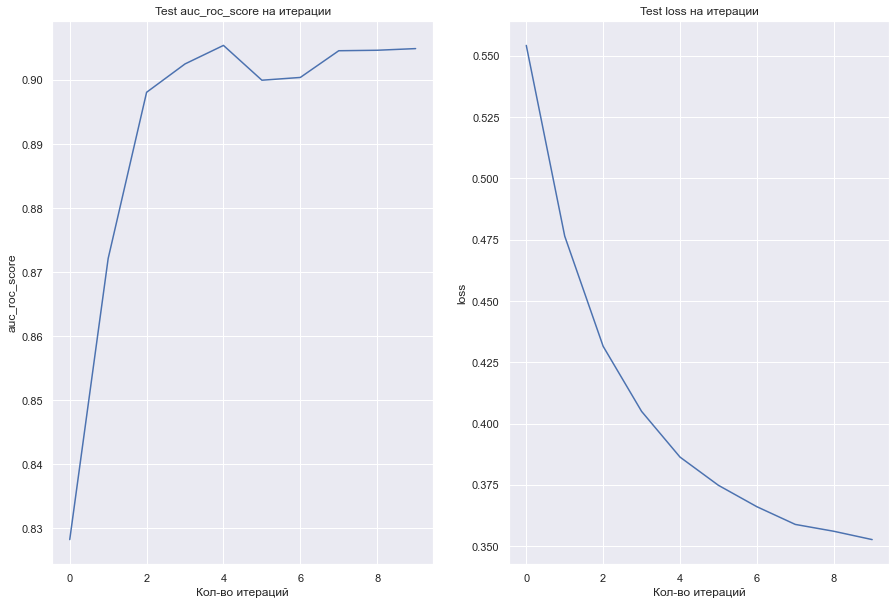

CPU times: user 1.99 s, sys: 64.4 ms, total: 2.06 s
Wall time: 1.98 s
Train ROC-AUC 0.9901
Valid ROC-AUC 0.9049
Test ROC-AUC 0.9071


In [95]:
boosting = Boosting(plot=True)  # чтобы графики строились

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')
# CPU times: user 924 ms, sys: 0 ns, total: 924 ms
# Wall time: 924 ms
# Train ROC-AUC 0.9921
# Valid ROC-AUC 0.9172
# Test ROC-AUC 0.9110
# CPU times: user 6.44 s, sys: 48.7 ms, total: 6.48 s
# Wall time: 6.53 s
# Train ROC-AUC 0.9926
# Valid ROC-AUC 0.9284
# Test ROC-AUC 0.9311
# CPU times: user 1.42 s, sys: 27.8 ms, total: 1.45 s
# Wall time: 1.49 s
# Train ROC-AUC 0.9880
# Valid ROC-AUC 0.9156
# Test ROC-AUC 0.9139

## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

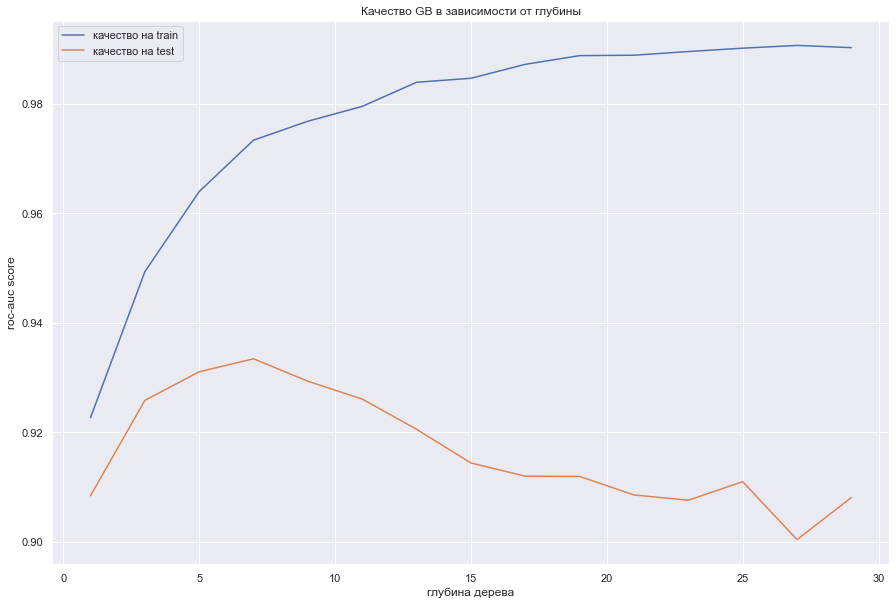

In [109]:
## https://habr.com/ru/company/ods/blog/324402/ тута оч много инфы
results = []
depths = range(1, 30, 2)
history = {'train': [], 'test': []}
# YOUR CODE:

for depth in depths:
    boosting = Boosting(base_model_params={'max_depth': depth})
    boosting.fit(x_train, y_train, x_valid, y_valid)
    history['train'].append(boosting.score(x_train, y_train))
    history['test'].append(boosting.score(x_test, y_test))
    
plt.figure(figsize=(15, 10))
plt.plot(depths, roc_auc_per_depth['train'], label='качество на train')
plt.plot(depths, roc_auc_per_depth['test'], label='качество на test')
plt.title('Качество GB в зависимости от глубины')
plt.xlabel('глубина дерева')
plt.ylabel('roc-auc score')

plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

`### ваше решение тут ###`
Для тестовой выборки лучшее качество как видно, на глубине около 7, потом начинает ухудшаться, из-за того, что деревья подвержены переобучению и чувствительны к выборке, из-за этого происходят скачки в райное 25-30

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [227]:
# Тут иногда лаги(фича), что при повторном запуске plot_score_param размеры выборки меняются
# картинки друг на друга накладываются, 
# поэтому я заново запускаю эту ячейку перед последующим запуском функций ниже 
roc_auc_per_param = {'train': [], 'valid': []}
# name = [
#     'learning_rate','early_stopping_rounds',
#     'subsample','n_estimators'
# ]
# span = [
#     np.linspace(0.1, 1, 3),np.logspace(-2, 0, 3),
#     np.arange(1, 10, 3),np.arange(2, 8, 2),np.arange(1, 70, 5)
# ]
def plot_score_param(name, dimension):
    for param in dimension:
        boosting = Boosting()
        boosting.fit(x_train, y_train, x_valid, y_valid)
        roc_auc_per_param['train'].append(boosting.score(x_train, y_train))
        roc_auc_per_param['valid'].append(boosting.score(x_valid, y_valid))
        
    plt.figure(figsize=(7, 7))
    plt.plot(dimension, roc_auc_per_param['train'], label='train')
    plt.plot(dimension, roc_auc_per_param['valid'], label='valid')
    plt.title(f'Качество GB')
    plt.xlabel(name)
    plt.ylabel('roc-auc_score')
    plt.legend()
    plt.show()
    best_param = dimension[np.argmax(roc_auc_per_param["valid"])]
    print(f'Наилучшее {name}=', best_param)

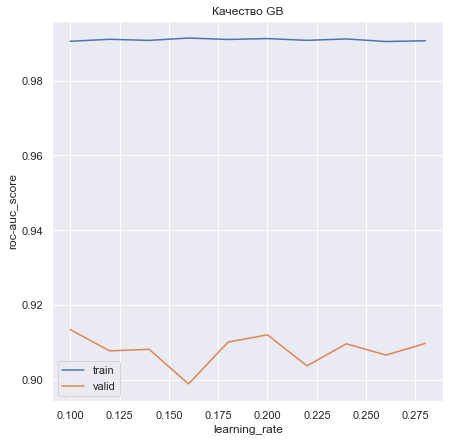

Наилучшее learning_rate= 0.1


In [228]:
plot_score_param('learning_rate', np.arange(0.1, 0.3, 0.02))

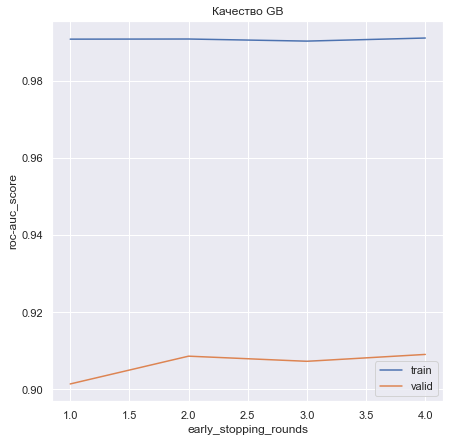

Наилучшее early_stopping_rounds=


4

In [193]:
plot_score_param('early_stopping_rounds', np.arange(1, 5, 1))

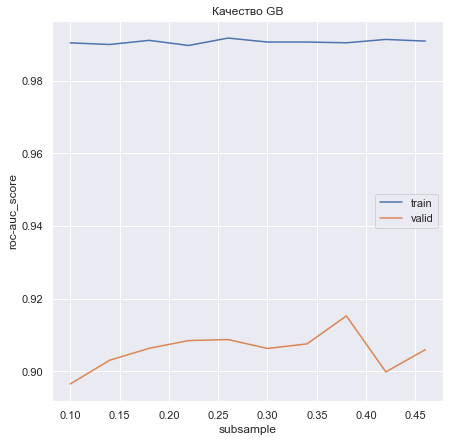

Наилучшее subsample=


0.38

In [195]:
plot_score_param('subsample', np.arange(0.1, 0.5, 0.04))

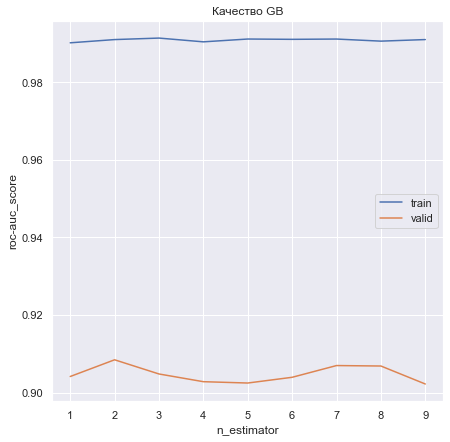

Наилучшее n_estimator=


2

In [197]:
plot_score_param('n_estimator', np.arange(1, 10, 1))

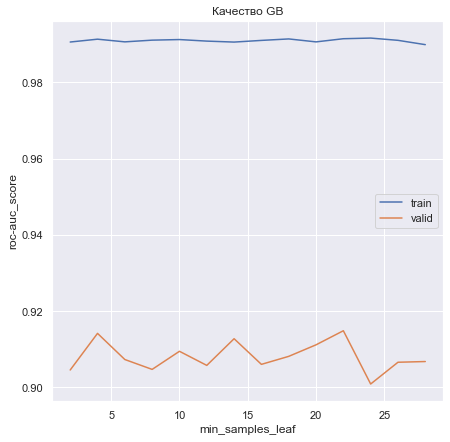

Наилучшее min_samples_leaf=


22

In [200]:
plot_score_param('min_samples_leaf', np.arange(2, 30, 2))

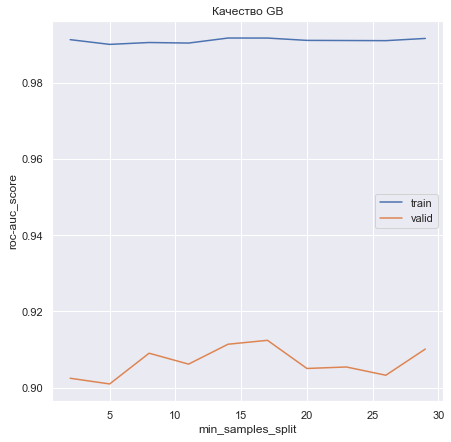

Наилучшее min_samples_split=


17

In [202]:
plot_score_param('min_samples_split', np.arange(2, 30, 3))

## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [234]:
# YOUR CODE:
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score

def score_catboost(boosting, x, y):
    return roc_auc_score(y == 1, boosting.predict(x, prediction_type='Probability')[:, 1])

def plot_catboost(name, span):
    roc_auc_per_param = {'train': [], 'test': []}
    
    for param in span:
        boosting = CatBoostRegressor(**{name: param})
        boosting.fit(x_train, y_train)

        roc_auc_per_param['train'].append(score_catboost(boosting, x_train, y_train))
        roc_auc_per_param['test'].append(score_catboost(boosting, x_test, y_test))

    plt.figure(figsize=(7, 7))
    plt.plot(span, roc_auc_per_param['train'], label='train')
    plt.plot(span, roc_auc_per_param['test'], label='test')

    plt.title(f'Качество catboost')
    plt.xlabel(name)
    plt.ylabel('roc_auc_score')

    plt.legend()
    plt.show()
    best_param = span[np.argmax(roc_auc_per_param["test"])]
    print(f'Наилучшее {name}={best_param}')

0:	learn: 0.9012841	total: 4.5ms	remaining: 4.49s
1:	learn: 0.8556299	total: 9.33ms	remaining: 4.66s
2:	learn: 0.8161761	total: 13.9ms	remaining: 4.63s
3:	learn: 0.7814647	total: 17.6ms	remaining: 4.37s
4:	learn: 0.7518299	total: 21ms	remaining: 4.17s
5:	learn: 0.7263173	total: 24.7ms	remaining: 4.09s
6:	learn: 0.7036894	total: 31.1ms	remaining: 4.41s
7:	learn: 0.6838021	total: 40ms	remaining: 4.96s
8:	learn: 0.6660582	total: 44.9ms	remaining: 4.95s
9:	learn: 0.6521682	total: 48.5ms	remaining: 4.8s
10:	learn: 0.6400648	total: 51.8ms	remaining: 4.66s
11:	learn: 0.6285161	total: 54.4ms	remaining: 4.48s
12:	learn: 0.6195347	total: 57.6ms	remaining: 4.37s
13:	learn: 0.6110505	total: 63.8ms	remaining: 4.5s
14:	learn: 0.6032838	total: 69.3ms	remaining: 4.55s
15:	learn: 0.5964791	total: 72.9ms	remaining: 4.49s
16:	learn: 0.5908364	total: 75.1ms	remaining: 4.34s
17:	learn: 0.5856663	total: 77.5ms	remaining: 4.23s
18:	learn: 0.5810449	total: 79.8ms	remaining: 4.12s
19:	learn: 0.5772309	total: 8

162:	learn: 0.4946949	total: 375ms	remaining: 1.93s
163:	learn: 0.4945445	total: 378ms	remaining: 1.93s
164:	learn: 0.4943542	total: 381ms	remaining: 1.93s
165:	learn: 0.4940541	total: 383ms	remaining: 1.93s
166:	learn: 0.4938591	total: 386ms	remaining: 1.92s
167:	learn: 0.4936242	total: 389ms	remaining: 1.93s
168:	learn: 0.4933797	total: 392ms	remaining: 1.93s
169:	learn: 0.4932039	total: 396ms	remaining: 1.93s
170:	learn: 0.4929758	total: 399ms	remaining: 1.94s
171:	learn: 0.4927779	total: 402ms	remaining: 1.93s
172:	learn: 0.4925130	total: 404ms	remaining: 1.93s
173:	learn: 0.4923201	total: 407ms	remaining: 1.93s
174:	learn: 0.4921645	total: 410ms	remaining: 1.93s
175:	learn: 0.4919321	total: 417ms	remaining: 1.95s
176:	learn: 0.4918150	total: 425ms	remaining: 1.97s
177:	learn: 0.4916771	total: 428ms	remaining: 1.98s
178:	learn: 0.4915264	total: 432ms	remaining: 1.98s
179:	learn: 0.4912317	total: 434ms	remaining: 1.98s
180:	learn: 0.4910988	total: 436ms	remaining: 1.97s
181:	learn: 

332:	learn: 0.4693856	total: 748ms	remaining: 1.5s
333:	learn: 0.4692875	total: 751ms	remaining: 1.5s
334:	learn: 0.4691197	total: 754ms	remaining: 1.5s
335:	learn: 0.4690480	total: 758ms	remaining: 1.5s
336:	learn: 0.4688614	total: 761ms	remaining: 1.5s
337:	learn: 0.4687370	total: 766ms	remaining: 1.5s
338:	learn: 0.4687202	total: 772ms	remaining: 1.5s
339:	learn: 0.4685185	total: 774ms	remaining: 1.5s
340:	learn: 0.4684287	total: 778ms	remaining: 1.5s
341:	learn: 0.4683629	total: 781ms	remaining: 1.5s
342:	learn: 0.4682040	total: 784ms	remaining: 1.5s
343:	learn: 0.4681300	total: 789ms	remaining: 1.5s
344:	learn: 0.4679587	total: 792ms	remaining: 1.5s
345:	learn: 0.4678948	total: 794ms	remaining: 1.5s
346:	learn: 0.4678242	total: 796ms	remaining: 1.5s
347:	learn: 0.4677583	total: 798ms	remaining: 1.49s
348:	learn: 0.4676814	total: 801ms	remaining: 1.49s
349:	learn: 0.4675063	total: 803ms	remaining: 1.49s
350:	learn: 0.4674085	total: 805ms	remaining: 1.49s
351:	learn: 0.4673282	total

496:	learn: 0.4536984	total: 1.12s	remaining: 1.13s
497:	learn: 0.4536140	total: 1.12s	remaining: 1.13s
498:	learn: 0.4534872	total: 1.13s	remaining: 1.13s
499:	learn: 0.4533767	total: 1.13s	remaining: 1.13s
500:	learn: 0.4532819	total: 1.13s	remaining: 1.13s
501:	learn: 0.4532330	total: 1.14s	remaining: 1.13s
502:	learn: 0.4530778	total: 1.14s	remaining: 1.13s
503:	learn: 0.4530284	total: 1.14s	remaining: 1.13s
504:	learn: 0.4529122	total: 1.15s	remaining: 1.12s
505:	learn: 0.4528115	total: 1.15s	remaining: 1.13s
506:	learn: 0.4527486	total: 1.16s	remaining: 1.12s
507:	learn: 0.4526907	total: 1.16s	remaining: 1.12s
508:	learn: 0.4526329	total: 1.16s	remaining: 1.12s
509:	learn: 0.4525470	total: 1.16s	remaining: 1.12s
510:	learn: 0.4525194	total: 1.16s	remaining: 1.11s
511:	learn: 0.4524081	total: 1.17s	remaining: 1.11s
512:	learn: 0.4523002	total: 1.17s	remaining: 1.11s
513:	learn: 0.4521826	total: 1.17s	remaining: 1.11s
514:	learn: 0.4521318	total: 1.17s	remaining: 1.1s
515:	learn: 0

674:	learn: 0.4404547	total: 1.49s	remaining: 719ms
675:	learn: 0.4403948	total: 1.5s	remaining: 717ms
676:	learn: 0.4403170	total: 1.5s	remaining: 715ms
677:	learn: 0.4401940	total: 1.5s	remaining: 713ms
678:	learn: 0.4401215	total: 1.5s	remaining: 711ms
679:	learn: 0.4400651	total: 1.51s	remaining: 709ms
680:	learn: 0.4400216	total: 1.51s	remaining: 708ms
681:	learn: 0.4398750	total: 1.51s	remaining: 706ms
682:	learn: 0.4398387	total: 1.52s	remaining: 704ms
683:	learn: 0.4397139	total: 1.52s	remaining: 702ms
684:	learn: 0.4396792	total: 1.52s	remaining: 700ms
685:	learn: 0.4396196	total: 1.52s	remaining: 697ms
686:	learn: 0.4395902	total: 1.52s	remaining: 695ms
687:	learn: 0.4395182	total: 1.53s	remaining: 693ms
688:	learn: 0.4395024	total: 1.53s	remaining: 690ms
689:	learn: 0.4394597	total: 1.53s	remaining: 688ms
690:	learn: 0.4393998	total: 1.53s	remaining: 685ms
691:	learn: 0.4393279	total: 1.53s	remaining: 683ms
692:	learn: 0.4392469	total: 1.54s	remaining: 681ms
693:	learn: 0.43

854:	learn: 0.4300144	total: 1.86s	remaining: 316ms
855:	learn: 0.4299729	total: 1.87s	remaining: 314ms
856:	learn: 0.4299119	total: 1.87s	remaining: 312ms
857:	learn: 0.4298889	total: 1.87s	remaining: 310ms
858:	learn: 0.4298325	total: 1.88s	remaining: 308ms
859:	learn: 0.4298086	total: 1.88s	remaining: 306ms
860:	learn: 0.4297499	total: 1.88s	remaining: 304ms
861:	learn: 0.4297191	total: 1.89s	remaining: 302ms
862:	learn: 0.4296900	total: 1.89s	remaining: 300ms
863:	learn: 0.4296660	total: 1.89s	remaining: 298ms
864:	learn: 0.4296063	total: 1.9s	remaining: 296ms
865:	learn: 0.4295373	total: 1.9s	remaining: 294ms
866:	learn: 0.4294604	total: 1.91s	remaining: 292ms
867:	learn: 0.4293618	total: 1.91s	remaining: 290ms
868:	learn: 0.4292571	total: 1.91s	remaining: 288ms
869:	learn: 0.4292014	total: 1.91s	remaining: 286ms
870:	learn: 0.4291547	total: 1.91s	remaining: 284ms
871:	learn: 0.4291264	total: 1.92s	remaining: 281ms
872:	learn: 0.4290780	total: 1.92s	remaining: 279ms
873:	learn: 0.

72:	learn: 0.5181154	total: 193ms	remaining: 2.46s
73:	learn: 0.5177336	total: 205ms	remaining: 2.56s
74:	learn: 0.5172550	total: 207ms	remaining: 2.56s
75:	learn: 0.5165164	total: 211ms	remaining: 2.57s
76:	learn: 0.5161711	total: 219ms	remaining: 2.62s
77:	learn: 0.5157856	total: 222ms	remaining: 2.62s
78:	learn: 0.5154461	total: 227ms	remaining: 2.65s
79:	learn: 0.5151453	total: 231ms	remaining: 2.65s
80:	learn: 0.5146049	total: 236ms	remaining: 2.68s
81:	learn: 0.5142963	total: 242ms	remaining: 2.71s
82:	learn: 0.5137500	total: 247ms	remaining: 2.73s
83:	learn: 0.5132482	total: 252ms	remaining: 2.75s
84:	learn: 0.5126288	total: 259ms	remaining: 2.79s
85:	learn: 0.5121382	total: 268ms	remaining: 2.85s
86:	learn: 0.5117979	total: 272ms	remaining: 2.86s
87:	learn: 0.5111964	total: 282ms	remaining: 2.92s
88:	learn: 0.5108166	total: 287ms	remaining: 2.94s
89:	learn: 0.5105381	total: 296ms	remaining: 2.99s
90:	learn: 0.5100834	total: 300ms	remaining: 3s
91:	learn: 0.5096949	total: 308ms	

268:	learn: 0.4701886	total: 749ms	remaining: 2.04s
269:	learn: 0.4700119	total: 754ms	remaining: 2.04s
270:	learn: 0.4698556	total: 757ms	remaining: 2.04s
271:	learn: 0.4696774	total: 761ms	remaining: 2.04s
272:	learn: 0.4695674	total: 763ms	remaining: 2.03s
273:	learn: 0.4694027	total: 767ms	remaining: 2.03s
274:	learn: 0.4692139	total: 770ms	remaining: 2.03s
275:	learn: 0.4690871	total: 775ms	remaining: 2.03s
276:	learn: 0.4688890	total: 778ms	remaining: 2.03s
277:	learn: 0.4687654	total: 781ms	remaining: 2.03s
278:	learn: 0.4687009	total: 785ms	remaining: 2.03s
279:	learn: 0.4685621	total: 787ms	remaining: 2.02s
280:	learn: 0.4684628	total: 789ms	remaining: 2.02s
281:	learn: 0.4683316	total: 792ms	remaining: 2.02s
282:	learn: 0.4681322	total: 794ms	remaining: 2.01s
283:	learn: 0.4679588	total: 796ms	remaining: 2.01s
284:	learn: 0.4679033	total: 799ms	remaining: 2s
285:	learn: 0.4677410	total: 801ms	remaining: 2s
286:	learn: 0.4676488	total: 802ms	remaining: 1.99s
287:	learn: 0.4675

447:	learn: 0.4496580	total: 1.24s	remaining: 1.52s
448:	learn: 0.4495847	total: 1.24s	remaining: 1.52s
449:	learn: 0.4495358	total: 1.24s	remaining: 1.52s
450:	learn: 0.4494613	total: 1.25s	remaining: 1.52s
451:	learn: 0.4493055	total: 1.25s	remaining: 1.51s
452:	learn: 0.4492228	total: 1.25s	remaining: 1.51s
453:	learn: 0.4491395	total: 1.26s	remaining: 1.51s
454:	learn: 0.4490034	total: 1.26s	remaining: 1.51s
455:	learn: 0.4489359	total: 1.27s	remaining: 1.51s
456:	learn: 0.4489093	total: 1.27s	remaining: 1.51s
457:	learn: 0.4487217	total: 1.28s	remaining: 1.51s
458:	learn: 0.4485983	total: 1.28s	remaining: 1.51s
459:	learn: 0.4485160	total: 1.28s	remaining: 1.5s
460:	learn: 0.4484204	total: 1.29s	remaining: 1.5s
461:	learn: 0.4483624	total: 1.29s	remaining: 1.5s
462:	learn: 0.4482678	total: 1.29s	remaining: 1.5s
463:	learn: 0.4482247	total: 1.29s	remaining: 1.49s
464:	learn: 0.4481722	total: 1.29s	remaining: 1.49s
465:	learn: 0.4481295	total: 1.3s	remaining: 1.49s
466:	learn: 0.448

669:	learn: 0.4320657	total: 1.78s	remaining: 877ms
670:	learn: 0.4319779	total: 1.78s	remaining: 875ms
671:	learn: 0.4319306	total: 1.79s	remaining: 872ms
672:	learn: 0.4318154	total: 1.79s	remaining: 870ms
673:	learn: 0.4317562	total: 1.79s	remaining: 867ms
674:	learn: 0.4317288	total: 1.79s	remaining: 864ms
675:	learn: 0.4316652	total: 1.8s	remaining: 862ms
676:	learn: 0.4315647	total: 1.8s	remaining: 860ms
677:	learn: 0.4315019	total: 1.8s	remaining: 857ms
678:	learn: 0.4314205	total: 1.81s	remaining: 854ms
679:	learn: 0.4313385	total: 1.81s	remaining: 851ms
680:	learn: 0.4313117	total: 1.81s	remaining: 848ms
681:	learn: 0.4312742	total: 1.81s	remaining: 845ms
682:	learn: 0.4312167	total: 1.81s	remaining: 842ms
683:	learn: 0.4311506	total: 1.82s	remaining: 839ms
684:	learn: 0.4310634	total: 1.82s	remaining: 836ms
685:	learn: 0.4310363	total: 1.82s	remaining: 834ms
686:	learn: 0.4309998	total: 1.82s	remaining: 831ms
687:	learn: 0.4309291	total: 1.82s	remaining: 828ms
688:	learn: 0.4

833:	learn: 0.4227731	total: 2.16s	remaining: 429ms
834:	learn: 0.4227551	total: 2.16s	remaining: 427ms
835:	learn: 0.4227442	total: 2.17s	remaining: 425ms
836:	learn: 0.4227265	total: 2.17s	remaining: 422ms
837:	learn: 0.4226576	total: 2.17s	remaining: 420ms
838:	learn: 0.4225885	total: 2.17s	remaining: 417ms
839:	learn: 0.4225553	total: 2.18s	remaining: 415ms
840:	learn: 0.4225064	total: 2.18s	remaining: 413ms
841:	learn: 0.4224408	total: 2.19s	remaining: 411ms
842:	learn: 0.4223253	total: 2.19s	remaining: 408ms
843:	learn: 0.4222384	total: 2.19s	remaining: 406ms
844:	learn: 0.4222196	total: 2.2s	remaining: 403ms
845:	learn: 0.4221868	total: 2.2s	remaining: 400ms
846:	learn: 0.4220461	total: 2.2s	remaining: 398ms
847:	learn: 0.4220201	total: 2.2s	remaining: 395ms
848:	learn: 0.4219965	total: 2.21s	remaining: 392ms
849:	learn: 0.4219331	total: 2.21s	remaining: 390ms
850:	learn: 0.4218750	total: 2.21s	remaining: 387ms
851:	learn: 0.4218114	total: 2.21s	remaining: 384ms
852:	learn: 0.42

0:	learn: 0.8810579	total: 2.04ms	remaining: 2.04s
1:	learn: 0.8216508	total: 4.22ms	remaining: 2.11s
2:	learn: 0.7734417	total: 6.2ms	remaining: 2.06s
3:	learn: 0.7327396	total: 8.23ms	remaining: 2.05s
4:	learn: 0.6995284	total: 10.3ms	remaining: 2.04s
5:	learn: 0.6741774	total: 12.2ms	remaining: 2.02s
6:	learn: 0.6526735	total: 14.2ms	remaining: 2.02s
7:	learn: 0.6347758	total: 16.4ms	remaining: 2.03s
8:	learn: 0.6200150	total: 18.5ms	remaining: 2.04s
9:	learn: 0.6087467	total: 20.4ms	remaining: 2.02s
10:	learn: 0.5997661	total: 22.5ms	remaining: 2.02s
11:	learn: 0.5920893	total: 24.5ms	remaining: 2.02s
12:	learn: 0.5846197	total: 26.5ms	remaining: 2.01s
13:	learn: 0.5793694	total: 28.4ms	remaining: 2s
14:	learn: 0.5748731	total: 30.5ms	remaining: 2s
15:	learn: 0.5704947	total: 32.6ms	remaining: 2s
16:	learn: 0.5667253	total: 34.4ms	remaining: 1.99s
17:	learn: 0.5632090	total: 36.3ms	remaining: 1.98s
18:	learn: 0.5604830	total: 38.5ms	remaining: 1.99s
19:	learn: 0.5582669	total: 40.6

179:	learn: 0.4796311	total: 378ms	remaining: 1.72s
180:	learn: 0.4792352	total: 381ms	remaining: 1.72s
181:	learn: 0.4789863	total: 384ms	remaining: 1.73s
182:	learn: 0.4787048	total: 387ms	remaining: 1.73s
183:	learn: 0.4785284	total: 390ms	remaining: 1.73s
184:	learn: 0.4782370	total: 393ms	remaining: 1.73s
185:	learn: 0.4780135	total: 397ms	remaining: 1.74s
186:	learn: 0.4778555	total: 400ms	remaining: 1.74s
187:	learn: 0.4776260	total: 402ms	remaining: 1.73s
188:	learn: 0.4774357	total: 403ms	remaining: 1.73s
189:	learn: 0.4772523	total: 406ms	remaining: 1.73s
190:	learn: 0.4770132	total: 408ms	remaining: 1.73s
191:	learn: 0.4768143	total: 412ms	remaining: 1.73s
192:	learn: 0.4766670	total: 419ms	remaining: 1.75s
193:	learn: 0.4764574	total: 423ms	remaining: 1.75s
194:	learn: 0.4761197	total: 426ms	remaining: 1.76s
195:	learn: 0.4759656	total: 430ms	remaining: 1.76s
196:	learn: 0.4758171	total: 433ms	remaining: 1.76s
197:	learn: 0.4756606	total: 435ms	remaining: 1.76s
198:	learn: 

357:	learn: 0.4529503	total: 755ms	remaining: 1.35s
358:	learn: 0.4527838	total: 758ms	remaining: 1.35s
359:	learn: 0.4526524	total: 761ms	remaining: 1.35s
360:	learn: 0.4524622	total: 763ms	remaining: 1.35s
361:	learn: 0.4523643	total: 766ms	remaining: 1.35s
362:	learn: 0.4522172	total: 770ms	remaining: 1.35s
363:	learn: 0.4521278	total: 772ms	remaining: 1.35s
364:	learn: 0.4520218	total: 777ms	remaining: 1.35s
365:	learn: 0.4519916	total: 779ms	remaining: 1.35s
366:	learn: 0.4518985	total: 783ms	remaining: 1.35s
367:	learn: 0.4518181	total: 786ms	remaining: 1.35s
368:	learn: 0.4517602	total: 789ms	remaining: 1.35s
369:	learn: 0.4516644	total: 792ms	remaining: 1.35s
370:	learn: 0.4516256	total: 795ms	remaining: 1.35s
371:	learn: 0.4514728	total: 797ms	remaining: 1.34s
372:	learn: 0.4513964	total: 800ms	remaining: 1.34s
373:	learn: 0.4511960	total: 802ms	remaining: 1.34s
374:	learn: 0.4511432	total: 804ms	remaining: 1.34s
375:	learn: 0.4510831	total: 808ms	remaining: 1.34s
376:	learn: 

521:	learn: 0.4363052	total: 1.13s	remaining: 1.04s
522:	learn: 0.4362581	total: 1.13s	remaining: 1.03s
523:	learn: 0.4360899	total: 1.14s	remaining: 1.03s
524:	learn: 0.4360393	total: 1.14s	remaining: 1.03s
525:	learn: 0.4358466	total: 1.14s	remaining: 1.03s
526:	learn: 0.4357901	total: 1.15s	remaining: 1.03s
527:	learn: 0.4357587	total: 1.15s	remaining: 1.03s
528:	learn: 0.4357161	total: 1.15s	remaining: 1.02s
529:	learn: 0.4355730	total: 1.15s	remaining: 1.02s
530:	learn: 0.4354771	total: 1.16s	remaining: 1.02s
531:	learn: 0.4353524	total: 1.16s	remaining: 1.02s
532:	learn: 0.4352407	total: 1.16s	remaining: 1.01s
533:	learn: 0.4351141	total: 1.16s	remaining: 1.01s
534:	learn: 0.4350746	total: 1.16s	remaining: 1.01s
535:	learn: 0.4349692	total: 1.17s	remaining: 1.01s
536:	learn: 0.4349266	total: 1.17s	remaining: 1.01s
537:	learn: 0.4348731	total: 1.17s	remaining: 1s
538:	learn: 0.4347727	total: 1.17s	remaining: 1s
539:	learn: 0.4347189	total: 1.17s	remaining: 1s
540:	learn: 0.4346856

681:	learn: 0.4244988	total: 1.51s	remaining: 704ms
682:	learn: 0.4244363	total: 1.51s	remaining: 703ms
683:	learn: 0.4244123	total: 1.52s	remaining: 701ms
684:	learn: 0.4242972	total: 1.52s	remaining: 699ms
685:	learn: 0.4242377	total: 1.52s	remaining: 698ms
686:	learn: 0.4241596	total: 1.53s	remaining: 697ms
687:	learn: 0.4239702	total: 1.53s	remaining: 696ms
688:	learn: 0.4238687	total: 1.54s	remaining: 695ms
689:	learn: 0.4238316	total: 1.54s	remaining: 693ms
690:	learn: 0.4237717	total: 1.54s	remaining: 691ms
691:	learn: 0.4236996	total: 1.55s	remaining: 691ms
692:	learn: 0.4236157	total: 1.55s	remaining: 689ms
693:	learn: 0.4234918	total: 1.56s	remaining: 687ms
694:	learn: 0.4234640	total: 1.56s	remaining: 686ms
695:	learn: 0.4234300	total: 1.56s	remaining: 684ms
696:	learn: 0.4234116	total: 1.57s	remaining: 682ms
697:	learn: 0.4233598	total: 1.57s	remaining: 680ms
698:	learn: 0.4233303	total: 1.57s	remaining: 678ms
699:	learn: 0.4233028	total: 1.58s	remaining: 676ms
700:	learn: 

846:	learn: 0.4134358	total: 2.07s	remaining: 374ms
847:	learn: 0.4134197	total: 2.08s	remaining: 373ms
848:	learn: 0.4133792	total: 2.08s	remaining: 371ms
849:	learn: 0.4133668	total: 2.09s	remaining: 369ms
850:	learn: 0.4132440	total: 2.1s	remaining: 367ms
851:	learn: 0.4132039	total: 2.1s	remaining: 365ms
852:	learn: 0.4131467	total: 2.11s	remaining: 363ms
853:	learn: 0.4131075	total: 2.11s	remaining: 361ms
854:	learn: 0.4130333	total: 2.12s	remaining: 359ms
855:	learn: 0.4129787	total: 2.12s	remaining: 357ms
856:	learn: 0.4129376	total: 2.12s	remaining: 354ms
857:	learn: 0.4128576	total: 2.13s	remaining: 352ms
858:	learn: 0.4127762	total: 2.13s	remaining: 349ms
859:	learn: 0.4127555	total: 2.13s	remaining: 347ms
860:	learn: 0.4127287	total: 2.13s	remaining: 345ms
861:	learn: 0.4127056	total: 2.14s	remaining: 342ms
862:	learn: 0.4126370	total: 2.14s	remaining: 340ms
863:	learn: 0.4125809	total: 2.15s	remaining: 338ms
864:	learn: 0.4123839	total: 2.15s	remaining: 335ms
865:	learn: 0.

8:	learn: 0.6063008	total: 37.5ms	remaining: 4.13s
9:	learn: 0.5960633	total: 45.1ms	remaining: 4.47s
10:	learn: 0.5875741	total: 54.3ms	remaining: 4.88s
11:	learn: 0.5818243	total: 67.5ms	remaining: 5.55s
12:	learn: 0.5742744	total: 73.9ms	remaining: 5.61s
13:	learn: 0.5693433	total: 76.7ms	remaining: 5.4s
14:	learn: 0.5646777	total: 81.2ms	remaining: 5.33s
15:	learn: 0.5615072	total: 88.7ms	remaining: 5.46s
16:	learn: 0.5587486	total: 92.1ms	remaining: 5.32s
17:	learn: 0.5557306	total: 95.1ms	remaining: 5.19s
18:	learn: 0.5530168	total: 100ms	remaining: 5.19s
19:	learn: 0.5510426	total: 107ms	remaining: 5.23s
20:	learn: 0.5496535	total: 111ms	remaining: 5.17s
21:	learn: 0.5481525	total: 114ms	remaining: 5.09s
22:	learn: 0.5467802	total: 120ms	remaining: 5.11s
23:	learn: 0.5455665	total: 124ms	remaining: 5.03s
24:	learn: 0.5442324	total: 130ms	remaining: 5.05s
25:	learn: 0.5426642	total: 142ms	remaining: 5.3s
26:	learn: 0.5416771	total: 146ms	remaining: 5.27s
27:	learn: 0.5405047	tota

207:	learn: 0.4688139	total: 992ms	remaining: 3.78s
208:	learn: 0.4687141	total: 995ms	remaining: 3.77s
209:	learn: 0.4685918	total: 998ms	remaining: 3.75s
210:	learn: 0.4684098	total: 1s	remaining: 3.75s
211:	learn: 0.4683182	total: 1.01s	remaining: 3.74s
212:	learn: 0.4681473	total: 1.01s	remaining: 3.73s
213:	learn: 0.4680083	total: 1.01s	remaining: 3.72s
214:	learn: 0.4677901	total: 1.02s	remaining: 3.73s
215:	learn: 0.4676270	total: 1.02s	remaining: 3.72s
216:	learn: 0.4675050	total: 1.03s	remaining: 3.71s
217:	learn: 0.4672946	total: 1.03s	remaining: 3.69s
218:	learn: 0.4670704	total: 1.03s	remaining: 3.68s
219:	learn: 0.4669297	total: 1.03s	remaining: 3.67s
220:	learn: 0.4667531	total: 1.04s	remaining: 3.67s
221:	learn: 0.4666984	total: 1.04s	remaining: 3.66s
222:	learn: 0.4664155	total: 1.05s	remaining: 3.65s
223:	learn: 0.4663198	total: 1.05s	remaining: 3.65s
224:	learn: 0.4661385	total: 1.05s	remaining: 3.63s
225:	learn: 0.4658787	total: 1.06s	remaining: 3.62s
226:	learn: 0.4

387:	learn: 0.4439756	total: 1.55s	remaining: 2.45s
388:	learn: 0.4438114	total: 1.56s	remaining: 2.45s
389:	learn: 0.4437306	total: 1.56s	remaining: 2.44s
390:	learn: 0.4435984	total: 1.56s	remaining: 2.44s
391:	learn: 0.4435550	total: 1.57s	remaining: 2.43s
392:	learn: 0.4434381	total: 1.57s	remaining: 2.43s
393:	learn: 0.4433816	total: 1.57s	remaining: 2.42s
394:	learn: 0.4432650	total: 1.58s	remaining: 2.42s
395:	learn: 0.4430604	total: 1.58s	remaining: 2.42s
396:	learn: 0.4429793	total: 1.59s	remaining: 2.41s
397:	learn: 0.4429099	total: 1.59s	remaining: 2.41s
398:	learn: 0.4428689	total: 1.6s	remaining: 2.41s
399:	learn: 0.4426378	total: 1.6s	remaining: 2.4s
400:	learn: 0.4424918	total: 1.6s	remaining: 2.4s
401:	learn: 0.4422962	total: 1.61s	remaining: 2.39s
402:	learn: 0.4420804	total: 1.61s	remaining: 2.39s
403:	learn: 0.4419723	total: 1.62s	remaining: 2.39s
404:	learn: 0.4418696	total: 1.62s	remaining: 2.38s
405:	learn: 0.4416303	total: 1.63s	remaining: 2.38s
406:	learn: 0.441

560:	learn: 0.4272806	total: 2.11s	remaining: 1.65s
561:	learn: 0.4271956	total: 2.11s	remaining: 1.65s
562:	learn: 0.4271680	total: 2.12s	remaining: 1.64s
563:	learn: 0.4270633	total: 2.12s	remaining: 1.64s
564:	learn: 0.4270474	total: 2.12s	remaining: 1.63s
565:	learn: 0.4270216	total: 2.13s	remaining: 1.63s
566:	learn: 0.4269167	total: 2.13s	remaining: 1.63s
567:	learn: 0.4268390	total: 2.13s	remaining: 1.62s
568:	learn: 0.4267805	total: 2.13s	remaining: 1.62s
569:	learn: 0.4267530	total: 2.14s	remaining: 1.61s
570:	learn: 0.4266993	total: 2.14s	remaining: 1.61s
571:	learn: 0.4266042	total: 2.14s	remaining: 1.6s
572:	learn: 0.4265761	total: 2.15s	remaining: 1.6s
573:	learn: 0.4264633	total: 2.15s	remaining: 1.6s
574:	learn: 0.4263862	total: 2.15s	remaining: 1.59s
575:	learn: 0.4263004	total: 2.16s	remaining: 1.59s
576:	learn: 0.4261809	total: 2.16s	remaining: 1.58s
577:	learn: 0.4261058	total: 2.16s	remaining: 1.58s
578:	learn: 0.4260748	total: 2.17s	remaining: 1.57s
579:	learn: 0.4

751:	learn: 0.4133892	total: 2.67s	remaining: 880ms
752:	learn: 0.4132335	total: 2.67s	remaining: 877ms
753:	learn: 0.4131843	total: 2.67s	remaining: 873ms
754:	learn: 0.4131220	total: 2.68s	remaining: 869ms
755:	learn: 0.4129533	total: 2.68s	remaining: 866ms
756:	learn: 0.4129038	total: 2.69s	remaining: 862ms
757:	learn: 0.4128558	total: 2.69s	remaining: 859ms
758:	learn: 0.4127970	total: 2.69s	remaining: 855ms
759:	learn: 0.4127258	total: 2.7s	remaining: 853ms
760:	learn: 0.4126471	total: 2.7s	remaining: 849ms
761:	learn: 0.4124494	total: 2.71s	remaining: 845ms
762:	learn: 0.4123670	total: 2.71s	remaining: 842ms
763:	learn: 0.4123055	total: 2.71s	remaining: 838ms
764:	learn: 0.4121134	total: 2.71s	remaining: 834ms
765:	learn: 0.4120744	total: 2.72s	remaining: 830ms
766:	learn: 0.4119765	total: 2.72s	remaining: 826ms
767:	learn: 0.4118501	total: 2.72s	remaining: 823ms
768:	learn: 0.4117682	total: 2.73s	remaining: 819ms
769:	learn: 0.4116214	total: 2.73s	remaining: 815ms
770:	learn: 0.

947:	learn: 0.4002793	total: 3.22s	remaining: 177ms
948:	learn: 0.4002212	total: 3.23s	remaining: 173ms
949:	learn: 0.4001472	total: 3.23s	remaining: 170ms
950:	learn: 0.4001240	total: 3.23s	remaining: 167ms
951:	learn: 0.4000456	total: 3.23s	remaining: 163ms
952:	learn: 0.4000023	total: 3.24s	remaining: 160ms
953:	learn: 0.3999680	total: 3.24s	remaining: 156ms
954:	learn: 0.3999372	total: 3.24s	remaining: 153ms
955:	learn: 0.3998696	total: 3.25s	remaining: 150ms
956:	learn: 0.3997769	total: 3.25s	remaining: 146ms
957:	learn: 0.3996991	total: 3.26s	remaining: 143ms
958:	learn: 0.3996811	total: 3.26s	remaining: 139ms
959:	learn: 0.3996653	total: 3.27s	remaining: 136ms
960:	learn: 0.3995676	total: 3.27s	remaining: 133ms
961:	learn: 0.3995312	total: 3.27s	remaining: 129ms
962:	learn: 0.3994755	total: 3.27s	remaining: 126ms
963:	learn: 0.3994265	total: 3.28s	remaining: 122ms
964:	learn: 0.3994065	total: 3.28s	remaining: 119ms
965:	learn: 0.3993081	total: 3.28s	remaining: 116ms
966:	learn: 

138:	learn: 0.4807934	total: 374ms	remaining: 2.31s
139:	learn: 0.4805259	total: 379ms	remaining: 2.33s
140:	learn: 0.4802194	total: 382ms	remaining: 2.33s
141:	learn: 0.4799250	total: 385ms	remaining: 2.33s
142:	learn: 0.4796945	total: 389ms	remaining: 2.33s
143:	learn: 0.4794608	total: 393ms	remaining: 2.33s
144:	learn: 0.4793129	total: 396ms	remaining: 2.33s
145:	learn: 0.4791550	total: 398ms	remaining: 2.33s
146:	learn: 0.4789774	total: 402ms	remaining: 2.33s
147:	learn: 0.4788128	total: 406ms	remaining: 2.34s
148:	learn: 0.4786425	total: 408ms	remaining: 2.33s
149:	learn: 0.4784930	total: 411ms	remaining: 2.33s
150:	learn: 0.4782677	total: 415ms	remaining: 2.33s
151:	learn: 0.4780294	total: 418ms	remaining: 2.33s
152:	learn: 0.4778288	total: 422ms	remaining: 2.33s
153:	learn: 0.4775603	total: 424ms	remaining: 2.33s
154:	learn: 0.4774466	total: 427ms	remaining: 2.33s
155:	learn: 0.4772829	total: 430ms	remaining: 2.32s
156:	learn: 0.4770463	total: 432ms	remaining: 2.32s
157:	learn: 

339:	learn: 0.4456540	total: 934ms	remaining: 1.81s
340:	learn: 0.4454592	total: 937ms	remaining: 1.81s
341:	learn: 0.4453215	total: 941ms	remaining: 1.81s
342:	learn: 0.4451486	total: 944ms	remaining: 1.81s
343:	learn: 0.4450411	total: 948ms	remaining: 1.81s
344:	learn: 0.4448762	total: 951ms	remaining: 1.81s
345:	learn: 0.4448259	total: 958ms	remaining: 1.81s
346:	learn: 0.4447521	total: 960ms	remaining: 1.81s
347:	learn: 0.4446656	total: 963ms	remaining: 1.8s
348:	learn: 0.4445828	total: 966ms	remaining: 1.8s
349:	learn: 0.4443926	total: 969ms	remaining: 1.8s
350:	learn: 0.4442769	total: 971ms	remaining: 1.79s
351:	learn: 0.4441723	total: 973ms	remaining: 1.79s
352:	learn: 0.4439613	total: 976ms	remaining: 1.79s
353:	learn: 0.4437639	total: 981ms	remaining: 1.79s
354:	learn: 0.4436123	total: 984ms	remaining: 1.79s
355:	learn: 0.4435844	total: 987ms	remaining: 1.78s
356:	learn: 0.4434846	total: 989ms	remaining: 1.78s
357:	learn: 0.4434584	total: 992ms	remaining: 1.78s
358:	learn: 0.4

529:	learn: 0.4254895	total: 1.49s	remaining: 1.32s
530:	learn: 0.4254127	total: 1.5s	remaining: 1.32s
531:	learn: 0.4252979	total: 1.5s	remaining: 1.32s
532:	learn: 0.4252479	total: 1.5s	remaining: 1.32s
533:	learn: 0.4251598	total: 1.51s	remaining: 1.31s
534:	learn: 0.4251010	total: 1.51s	remaining: 1.31s
535:	learn: 0.4250641	total: 1.51s	remaining: 1.31s
536:	learn: 0.4249510	total: 1.52s	remaining: 1.31s
537:	learn: 0.4248257	total: 1.52s	remaining: 1.31s
538:	learn: 0.4247045	total: 1.53s	remaining: 1.31s
539:	learn: 0.4244973	total: 1.53s	remaining: 1.3s
540:	learn: 0.4244512	total: 1.53s	remaining: 1.3s
541:	learn: 0.4243901	total: 1.54s	remaining: 1.3s
542:	learn: 0.4242722	total: 1.54s	remaining: 1.3s
543:	learn: 0.4241951	total: 1.54s	remaining: 1.29s
544:	learn: 0.4241758	total: 1.55s	remaining: 1.29s
545:	learn: 0.4240740	total: 1.55s	remaining: 1.29s
546:	learn: 0.4240005	total: 1.56s	remaining: 1.29s
547:	learn: 0.4238913	total: 1.56s	remaining: 1.29s
548:	learn: 0.42386

691:	learn: 0.4127308	total: 2.11s	remaining: 938ms
692:	learn: 0.4126245	total: 2.11s	remaining: 935ms
693:	learn: 0.4125304	total: 2.11s	remaining: 932ms
694:	learn: 0.4124690	total: 2.12s	remaining: 930ms
695:	learn: 0.4123231	total: 2.12s	remaining: 927ms
696:	learn: 0.4121827	total: 2.12s	remaining: 924ms
697:	learn: 0.4121249	total: 2.13s	remaining: 921ms
698:	learn: 0.4120195	total: 2.13s	remaining: 919ms
699:	learn: 0.4118901	total: 2.14s	remaining: 916ms
700:	learn: 0.4117918	total: 2.14s	remaining: 912ms
701:	learn: 0.4117500	total: 2.14s	remaining: 909ms
702:	learn: 0.4117150	total: 2.15s	remaining: 907ms
703:	learn: 0.4116565	total: 2.15s	remaining: 903ms
704:	learn: 0.4115923	total: 2.15s	remaining: 900ms
705:	learn: 0.4115317	total: 2.15s	remaining: 896ms
706:	learn: 0.4114871	total: 2.15s	remaining: 893ms
707:	learn: 0.4113736	total: 2.16s	remaining: 890ms
708:	learn: 0.4113269	total: 2.16s	remaining: 887ms
709:	learn: 0.4112541	total: 2.16s	remaining: 884ms
710:	learn: 

880:	learn: 0.3984080	total: 2.65s	remaining: 359ms
881:	learn: 0.3983192	total: 2.66s	remaining: 356ms
882:	learn: 0.3982606	total: 2.66s	remaining: 353ms
883:	learn: 0.3981234	total: 2.67s	remaining: 350ms
884:	learn: 0.3980630	total: 2.68s	remaining: 348ms
885:	learn: 0.3979539	total: 2.68s	remaining: 345ms
886:	learn: 0.3979042	total: 2.69s	remaining: 342ms
887:	learn: 0.3978898	total: 2.69s	remaining: 340ms
888:	learn: 0.3978605	total: 2.7s	remaining: 337ms
889:	learn: 0.3977685	total: 2.7s	remaining: 334ms
890:	learn: 0.3976592	total: 2.71s	remaining: 332ms
891:	learn: 0.3976166	total: 2.72s	remaining: 329ms
892:	learn: 0.3975810	total: 2.72s	remaining: 326ms
893:	learn: 0.3975644	total: 2.72s	remaining: 323ms
894:	learn: 0.3975374	total: 2.73s	remaining: 320ms
895:	learn: 0.3974952	total: 2.73s	remaining: 317ms
896:	learn: 0.3974058	total: 2.73s	remaining: 314ms
897:	learn: 0.3972675	total: 2.74s	remaining: 311ms
898:	learn: 0.3972370	total: 2.74s	remaining: 308ms
899:	learn: 0.

67:	learn: 0.5026977	total: 188ms	remaining: 2.58s
68:	learn: 0.5019587	total: 194ms	remaining: 2.62s
69:	learn: 0.5013258	total: 197ms	remaining: 2.62s
70:	learn: 0.5008064	total: 200ms	remaining: 2.62s
71:	learn: 0.5002453	total: 204ms	remaining: 2.63s
72:	learn: 0.4998044	total: 209ms	remaining: 2.66s
73:	learn: 0.4992044	total: 212ms	remaining: 2.66s
74:	learn: 0.4983711	total: 217ms	remaining: 2.67s
75:	learn: 0.4978843	total: 220ms	remaining: 2.67s
76:	learn: 0.4972951	total: 224ms	remaining: 2.69s
77:	learn: 0.4968213	total: 228ms	remaining: 2.69s
78:	learn: 0.4962765	total: 230ms	remaining: 2.68s
79:	learn: 0.4955483	total: 232ms	remaining: 2.67s
80:	learn: 0.4948475	total: 234ms	remaining: 2.66s
81:	learn: 0.4944871	total: 238ms	remaining: 2.66s
82:	learn: 0.4939150	total: 241ms	remaining: 2.67s
83:	learn: 0.4935237	total: 245ms	remaining: 2.67s
84:	learn: 0.4931857	total: 247ms	remaining: 2.66s
85:	learn: 0.4927167	total: 249ms	remaining: 2.65s
86:	learn: 0.4922569	total: 253

265:	learn: 0.4502305	total: 745ms	remaining: 2.06s
266:	learn: 0.4501641	total: 748ms	remaining: 2.05s
267:	learn: 0.4500943	total: 751ms	remaining: 2.05s
268:	learn: 0.4499641	total: 754ms	remaining: 2.05s
269:	learn: 0.4498344	total: 756ms	remaining: 2.04s
270:	learn: 0.4496176	total: 759ms	remaining: 2.04s
271:	learn: 0.4495151	total: 762ms	remaining: 2.04s
272:	learn: 0.4493770	total: 765ms	remaining: 2.04s
273:	learn: 0.4492012	total: 768ms	remaining: 2.04s
274:	learn: 0.4490731	total: 771ms	remaining: 2.03s
275:	learn: 0.4488409	total: 775ms	remaining: 2.03s
276:	learn: 0.4486371	total: 778ms	remaining: 2.03s
277:	learn: 0.4485361	total: 781ms	remaining: 2.03s
278:	learn: 0.4484559	total: 783ms	remaining: 2.02s
279:	learn: 0.4482996	total: 787ms	remaining: 2.02s
280:	learn: 0.4481516	total: 790ms	remaining: 2.02s
281:	learn: 0.4480150	total: 793ms	remaining: 2.02s
282:	learn: 0.4479194	total: 796ms	remaining: 2.02s
283:	learn: 0.4477001	total: 798ms	remaining: 2.01s
284:	learn: 

460:	learn: 0.4257315	total: 1.3s	remaining: 1.52s
461:	learn: 0.4255987	total: 1.3s	remaining: 1.51s
462:	learn: 0.4255560	total: 1.31s	remaining: 1.51s
463:	learn: 0.4254889	total: 1.31s	remaining: 1.51s
464:	learn: 0.4253874	total: 1.31s	remaining: 1.51s
465:	learn: 0.4252360	total: 1.32s	remaining: 1.51s
466:	learn: 0.4251547	total: 1.32s	remaining: 1.51s
467:	learn: 0.4249625	total: 1.32s	remaining: 1.51s
468:	learn: 0.4247833	total: 1.33s	remaining: 1.5s
469:	learn: 0.4246698	total: 1.33s	remaining: 1.5s
470:	learn: 0.4246379	total: 1.33s	remaining: 1.5s
471:	learn: 0.4245483	total: 1.34s	remaining: 1.49s
472:	learn: 0.4244144	total: 1.34s	remaining: 1.49s
473:	learn: 0.4243145	total: 1.34s	remaining: 1.49s
474:	learn: 0.4241477	total: 1.34s	remaining: 1.49s
475:	learn: 0.4241079	total: 1.35s	remaining: 1.48s
476:	learn: 0.4240072	total: 1.35s	remaining: 1.48s
477:	learn: 0.4238234	total: 1.35s	remaining: 1.48s
478:	learn: 0.4236463	total: 1.35s	remaining: 1.47s
479:	learn: 0.423

622:	learn: 0.4116335	total: 1.85s	remaining: 1.12s
623:	learn: 0.4115753	total: 1.86s	remaining: 1.12s
624:	learn: 0.4114970	total: 1.86s	remaining: 1.12s
625:	learn: 0.4114616	total: 1.87s	remaining: 1.11s
626:	learn: 0.4114315	total: 1.87s	remaining: 1.11s
627:	learn: 0.4113916	total: 1.87s	remaining: 1.11s
628:	learn: 0.4112836	total: 1.88s	remaining: 1.11s
629:	learn: 0.4111182	total: 1.89s	remaining: 1.11s
630:	learn: 0.4110520	total: 1.89s	remaining: 1.1s
631:	learn: 0.4110341	total: 1.89s	remaining: 1.1s
632:	learn: 0.4109210	total: 1.9s	remaining: 1.1s
633:	learn: 0.4107535	total: 1.9s	remaining: 1.1s
634:	learn: 0.4106599	total: 1.91s	remaining: 1.09s
635:	learn: 0.4106361	total: 1.91s	remaining: 1.09s
636:	learn: 0.4105717	total: 1.91s	remaining: 1.09s
637:	learn: 0.4105184	total: 1.92s	remaining: 1.09s
638:	learn: 0.4104589	total: 1.92s	remaining: 1.08s
639:	learn: 0.4104004	total: 1.93s	remaining: 1.08s
640:	learn: 0.4103832	total: 1.93s	remaining: 1.08s
641:	learn: 0.4102

794:	learn: 0.3980423	total: 2.59s	remaining: 667ms
795:	learn: 0.3979474	total: 2.6s	remaining: 666ms
796:	learn: 0.3976823	total: 2.61s	remaining: 665ms
797:	learn: 0.3975320	total: 2.62s	remaining: 663ms
798:	learn: 0.3973869	total: 2.63s	remaining: 663ms
799:	learn: 0.3973031	total: 2.64s	remaining: 659ms
800:	learn: 0.3972621	total: 2.64s	remaining: 656ms
801:	learn: 0.3971714	total: 2.65s	remaining: 653ms
802:	learn: 0.3971059	total: 2.65s	remaining: 651ms
803:	learn: 0.3969866	total: 2.65s	remaining: 647ms
804:	learn: 0.3969367	total: 2.66s	remaining: 644ms
805:	learn: 0.3968570	total: 2.66s	remaining: 640ms
806:	learn: 0.3967409	total: 2.67s	remaining: 638ms
807:	learn: 0.3966307	total: 2.67s	remaining: 634ms
808:	learn: 0.3965736	total: 2.67s	remaining: 631ms
809:	learn: 0.3965335	total: 2.67s	remaining: 627ms
810:	learn: 0.3964759	total: 2.68s	remaining: 625ms
811:	learn: 0.3964457	total: 2.68s	remaining: 621ms
812:	learn: 0.3963529	total: 2.69s	remaining: 618ms
813:	learn: 0

962:	learn: 0.3861735	total: 3.38s	remaining: 130ms
963:	learn: 0.3860641	total: 3.4s	remaining: 127ms
964:	learn: 0.3860029	total: 3.41s	remaining: 124ms
965:	learn: 0.3859305	total: 3.41s	remaining: 120ms
966:	learn: 0.3857432	total: 3.42s	remaining: 117ms
967:	learn: 0.3856630	total: 3.42s	remaining: 113ms
968:	learn: 0.3856153	total: 3.43s	remaining: 110ms
969:	learn: 0.3855620	total: 3.43s	remaining: 106ms
970:	learn: 0.3854508	total: 3.44s	remaining: 103ms
971:	learn: 0.3854389	total: 3.44s	remaining: 99.1ms
972:	learn: 0.3853580	total: 3.44s	remaining: 95.6ms
973:	learn: 0.3853111	total: 3.45s	remaining: 92.1ms
974:	learn: 0.3852717	total: 3.45s	remaining: 88.5ms
975:	learn: 0.3851684	total: 3.45s	remaining: 84.9ms
976:	learn: 0.3850380	total: 3.46s	remaining: 81.4ms
977:	learn: 0.3849166	total: 3.46s	remaining: 77.9ms
978:	learn: 0.3848405	total: 3.47s	remaining: 74.4ms
979:	learn: 0.3847890	total: 3.47s	remaining: 70.8ms
980:	learn: 0.3846633	total: 3.48s	remaining: 67.3ms
981

126:	learn: 0.4760560	total: 376ms	remaining: 2.58s
127:	learn: 0.4760193	total: 379ms	remaining: 2.58s
128:	learn: 0.4759459	total: 381ms	remaining: 2.58s
129:	learn: 0.4756621	total: 384ms	remaining: 2.57s
130:	learn: 0.4751020	total: 388ms	remaining: 2.58s
131:	learn: 0.4747134	total: 392ms	remaining: 2.58s
132:	learn: 0.4742748	total: 396ms	remaining: 2.58s
133:	learn: 0.4740701	total: 400ms	remaining: 2.58s
134:	learn: 0.4736857	total: 406ms	remaining: 2.6s
135:	learn: 0.4733667	total: 409ms	remaining: 2.6s
136:	learn: 0.4730390	total: 411ms	remaining: 2.59s
137:	learn: 0.4728338	total: 414ms	remaining: 2.58s
138:	learn: 0.4725494	total: 416ms	remaining: 2.58s
139:	learn: 0.4722776	total: 419ms	remaining: 2.57s
140:	learn: 0.4719950	total: 422ms	remaining: 2.57s
141:	learn: 0.4719131	total: 424ms	remaining: 2.56s
142:	learn: 0.4717439	total: 427ms	remaining: 2.56s
143:	learn: 0.4714384	total: 429ms	remaining: 2.55s
144:	learn: 0.4711025	total: 432ms	remaining: 2.55s
145:	learn: 0.

321:	learn: 0.4381853	total: 935ms	remaining: 1.97s
322:	learn: 0.4379299	total: 940ms	remaining: 1.97s
323:	learn: 0.4377734	total: 947ms	remaining: 1.98s
324:	learn: 0.4376303	total: 952ms	remaining: 1.98s
325:	learn: 0.4374631	total: 956ms	remaining: 1.98s
326:	learn: 0.4372385	total: 962ms	remaining: 1.98s
327:	learn: 0.4371861	total: 967ms	remaining: 1.98s
328:	learn: 0.4370438	total: 971ms	remaining: 1.98s
329:	learn: 0.4370081	total: 975ms	remaining: 1.98s
330:	learn: 0.4368379	total: 977ms	remaining: 1.98s
331:	learn: 0.4366396	total: 981ms	remaining: 1.97s
332:	learn: 0.4365503	total: 983ms	remaining: 1.97s
333:	learn: 0.4365123	total: 986ms	remaining: 1.97s
334:	learn: 0.4364785	total: 989ms	remaining: 1.96s
335:	learn: 0.4364067	total: 991ms	remaining: 1.96s
336:	learn: 0.4363211	total: 994ms	remaining: 1.95s
337:	learn: 0.4360948	total: 996ms	remaining: 1.95s
338:	learn: 0.4359867	total: 1s	remaining: 1.95s
339:	learn: 0.4356808	total: 1s	remaining: 1.95s
340:	learn: 0.4355

485:	learn: 0.4181036	total: 1.31s	remaining: 1.38s
486:	learn: 0.4179511	total: 1.31s	remaining: 1.38s
487:	learn: 0.4178471	total: 1.31s	remaining: 1.38s
488:	learn: 0.4177638	total: 1.32s	remaining: 1.38s
489:	learn: 0.4177010	total: 1.32s	remaining: 1.37s
490:	learn: 0.4174728	total: 1.32s	remaining: 1.37s
491:	learn: 0.4174263	total: 1.33s	remaining: 1.37s
492:	learn: 0.4173889	total: 1.33s	remaining: 1.37s
493:	learn: 0.4172597	total: 1.33s	remaining: 1.36s
494:	learn: 0.4171897	total: 1.33s	remaining: 1.36s
495:	learn: 0.4171711	total: 1.34s	remaining: 1.36s
496:	learn: 0.4171106	total: 1.34s	remaining: 1.35s
497:	learn: 0.4169780	total: 1.34s	remaining: 1.35s
498:	learn: 0.4169057	total: 1.34s	remaining: 1.35s
499:	learn: 0.4168565	total: 1.34s	remaining: 1.34s
500:	learn: 0.4167399	total: 1.35s	remaining: 1.34s
501:	learn: 0.4166878	total: 1.35s	remaining: 1.34s
502:	learn: 0.4165510	total: 1.35s	remaining: 1.34s
503:	learn: 0.4164515	total: 1.35s	remaining: 1.33s
504:	learn: 

672:	learn: 0.4012960	total: 1.68s	remaining: 816ms
673:	learn: 0.4012502	total: 1.68s	remaining: 814ms
674:	learn: 0.4012218	total: 1.69s	remaining: 812ms
675:	learn: 0.4011194	total: 1.69s	remaining: 809ms
676:	learn: 0.4010742	total: 1.69s	remaining: 807ms
677:	learn: 0.4009415	total: 1.69s	remaining: 805ms
678:	learn: 0.4008689	total: 1.7s	remaining: 802ms
679:	learn: 0.4008253	total: 1.7s	remaining: 800ms
680:	learn: 0.4007070	total: 1.7s	remaining: 798ms
681:	learn: 0.4005706	total: 1.71s	remaining: 795ms
682:	learn: 0.4004350	total: 1.71s	remaining: 792ms
683:	learn: 0.4002011	total: 1.71s	remaining: 790ms
684:	learn: 0.4000622	total: 1.71s	remaining: 788ms
685:	learn: 0.3999953	total: 1.71s	remaining: 785ms
686:	learn: 0.3999566	total: 1.72s	remaining: 782ms
687:	learn: 0.3997417	total: 1.72s	remaining: 779ms
688:	learn: 0.3997027	total: 1.72s	remaining: 777ms
689:	learn: 0.3996477	total: 1.72s	remaining: 774ms
690:	learn: 0.3995795	total: 1.72s	remaining: 771ms
691:	learn: 0.3

894:	learn: 0.3834559	total: 2.24s	remaining: 263ms
895:	learn: 0.3832933	total: 2.25s	remaining: 261ms
896:	learn: 0.3832408	total: 2.25s	remaining: 259ms
897:	learn: 0.3832143	total: 2.25s	remaining: 256ms
898:	learn: 0.3831762	total: 2.26s	remaining: 254ms
899:	learn: 0.3831057	total: 2.26s	remaining: 251ms
900:	learn: 0.3830789	total: 2.26s	remaining: 249ms
901:	learn: 0.3830535	total: 2.27s	remaining: 246ms
902:	learn: 0.3830067	total: 2.27s	remaining: 244ms
903:	learn: 0.3829107	total: 2.27s	remaining: 241ms
904:	learn: 0.3828421	total: 2.27s	remaining: 239ms
905:	learn: 0.3827815	total: 2.27s	remaining: 236ms
906:	learn: 0.3827587	total: 2.28s	remaining: 234ms
907:	learn: 0.3826433	total: 2.28s	remaining: 231ms
908:	learn: 0.3824615	total: 2.28s	remaining: 229ms
909:	learn: 0.3823878	total: 2.29s	remaining: 226ms
910:	learn: 0.3822999	total: 2.29s	remaining: 224ms
911:	learn: 0.3822449	total: 2.29s	remaining: 221ms
912:	learn: 0.3821634	total: 2.29s	remaining: 219ms
913:	learn: 

80:	learn: 0.4896629	total: 193ms	remaining: 2.19s
81:	learn: 0.4892003	total: 196ms	remaining: 2.2s
82:	learn: 0.4887047	total: 199ms	remaining: 2.2s
83:	learn: 0.4883871	total: 202ms	remaining: 2.21s
84:	learn: 0.4880479	total: 205ms	remaining: 2.21s
85:	learn: 0.4876583	total: 208ms	remaining: 2.21s
86:	learn: 0.4873629	total: 211ms	remaining: 2.21s
87:	learn: 0.4870766	total: 214ms	remaining: 2.22s
88:	learn: 0.4866963	total: 217ms	remaining: 2.22s
89:	learn: 0.4864289	total: 219ms	remaining: 2.21s
90:	learn: 0.4859825	total: 221ms	remaining: 2.2s
91:	learn: 0.4857157	total: 223ms	remaining: 2.2s
92:	learn: 0.4852714	total: 225ms	remaining: 2.19s
93:	learn: 0.4852004	total: 227ms	remaining: 2.19s
94:	learn: 0.4849125	total: 231ms	remaining: 2.2s
95:	learn: 0.4843595	total: 235ms	remaining: 2.21s
96:	learn: 0.4838337	total: 237ms	remaining: 2.21s
97:	learn: 0.4833820	total: 240ms	remaining: 2.21s
98:	learn: 0.4831527	total: 242ms	remaining: 2.21s
99:	learn: 0.4827587	total: 244ms	re

286:	learn: 0.4404323	total: 750ms	remaining: 1.86s
287:	learn: 0.4403639	total: 752ms	remaining: 1.86s
288:	learn: 0.4402310	total: 756ms	remaining: 1.86s
289:	learn: 0.4400382	total: 759ms	remaining: 1.86s
290:	learn: 0.4399209	total: 762ms	remaining: 1.86s
291:	learn: 0.4398769	total: 765ms	remaining: 1.85s
292:	learn: 0.4397633	total: 768ms	remaining: 1.85s
293:	learn: 0.4395874	total: 772ms	remaining: 1.85s
294:	learn: 0.4395004	total: 777ms	remaining: 1.86s
295:	learn: 0.4394130	total: 782ms	remaining: 1.86s
296:	learn: 0.4392925	total: 784ms	remaining: 1.85s
297:	learn: 0.4392350	total: 786ms	remaining: 1.85s
298:	learn: 0.4390081	total: 792ms	remaining: 1.86s
299:	learn: 0.4387386	total: 794ms	remaining: 1.85s
300:	learn: 0.4385971	total: 797ms	remaining: 1.85s
301:	learn: 0.4385190	total: 799ms	remaining: 1.85s
302:	learn: 0.4382604	total: 801ms	remaining: 1.84s
303:	learn: 0.4380800	total: 805ms	remaining: 1.84s
304:	learn: 0.4377869	total: 808ms	remaining: 1.84s
305:	learn: 

500:	learn: 0.4134244	total: 1.31s	remaining: 1.3s
501:	learn: 0.4132225	total: 1.31s	remaining: 1.3s
502:	learn: 0.4131853	total: 1.32s	remaining: 1.3s
503:	learn: 0.4131369	total: 1.32s	remaining: 1.3s
504:	learn: 0.4131079	total: 1.33s	remaining: 1.3s
505:	learn: 0.4130734	total: 1.33s	remaining: 1.3s
506:	learn: 0.4128810	total: 1.33s	remaining: 1.3s
507:	learn: 0.4127292	total: 1.34s	remaining: 1.3s
508:	learn: 0.4126312	total: 1.34s	remaining: 1.3s
509:	learn: 0.4125409	total: 1.35s	remaining: 1.29s
510:	learn: 0.4123490	total: 1.35s	remaining: 1.29s
511:	learn: 0.4122413	total: 1.35s	remaining: 1.29s
512:	learn: 0.4121410	total: 1.35s	remaining: 1.29s
513:	learn: 0.4120335	total: 1.36s	remaining: 1.28s
514:	learn: 0.4119239	total: 1.36s	remaining: 1.28s
515:	learn: 0.4118197	total: 1.36s	remaining: 1.28s
516:	learn: 0.4117021	total: 1.36s	remaining: 1.27s
517:	learn: 0.4115924	total: 1.37s	remaining: 1.27s
518:	learn: 0.4114817	total: 1.37s	remaining: 1.27s
519:	learn: 0.4114393

705:	learn: 0.3932200	total: 1.87s	remaining: 779ms
706:	learn: 0.3931176	total: 1.87s	remaining: 777ms
707:	learn: 0.3930854	total: 1.88s	remaining: 775ms
708:	learn: 0.3930303	total: 1.88s	remaining: 773ms
709:	learn: 0.3929257	total: 1.89s	remaining: 770ms
710:	learn: 0.3927828	total: 1.89s	remaining: 768ms
711:	learn: 0.3926175	total: 1.89s	remaining: 765ms
712:	learn: 0.3924638	total: 1.9s	remaining: 765ms
713:	learn: 0.3924183	total: 1.9s	remaining: 762ms
714:	learn: 0.3922937	total: 1.91s	remaining: 760ms
715:	learn: 0.3922092	total: 1.91s	remaining: 757ms
716:	learn: 0.3921494	total: 1.91s	remaining: 755ms
717:	learn: 0.3921029	total: 1.92s	remaining: 752ms
718:	learn: 0.3920217	total: 1.92s	remaining: 750ms
719:	learn: 0.3918786	total: 1.92s	remaining: 747ms
720:	learn: 0.3917783	total: 1.92s	remaining: 744ms
721:	learn: 0.3916002	total: 1.93s	remaining: 741ms
722:	learn: 0.3914808	total: 1.93s	remaining: 739ms
723:	learn: 0.3913028	total: 1.93s	remaining: 736ms
724:	learn: 0.

913:	learn: 0.3751924	total: 2.43s	remaining: 229ms
914:	learn: 0.3751431	total: 2.44s	remaining: 227ms
915:	learn: 0.3750756	total: 2.44s	remaining: 224ms
916:	learn: 0.3749804	total: 2.44s	remaining: 221ms
917:	learn: 0.3749435	total: 2.45s	remaining: 219ms
918:	learn: 0.3749163	total: 2.45s	remaining: 216ms
919:	learn: 0.3747631	total: 2.46s	remaining: 214ms
920:	learn: 0.3747091	total: 2.46s	remaining: 211ms
921:	learn: 0.3746809	total: 2.46s	remaining: 208ms
922:	learn: 0.3744817	total: 2.47s	remaining: 206ms
923:	learn: 0.3743962	total: 2.47s	remaining: 203ms
924:	learn: 0.3742769	total: 2.47s	remaining: 201ms
925:	learn: 0.3742561	total: 2.48s	remaining: 198ms
926:	learn: 0.3742206	total: 2.48s	remaining: 195ms
927:	learn: 0.3741083	total: 2.48s	remaining: 192ms
928:	learn: 0.3739781	total: 2.48s	remaining: 190ms
929:	learn: 0.3739204	total: 2.48s	remaining: 187ms
930:	learn: 0.3739131	total: 2.49s	remaining: 184ms
931:	learn: 0.3737256	total: 2.49s	remaining: 182ms
932:	learn: 

94:	learn: 0.4793293	total: 271ms	remaining: 2.58s
95:	learn: 0.4789328	total: 274ms	remaining: 2.58s
96:	learn: 0.4786532	total: 277ms	remaining: 2.58s
97:	learn: 0.4781393	total: 280ms	remaining: 2.58s
98:	learn: 0.4777720	total: 283ms	remaining: 2.58s
99:	learn: 0.4775267	total: 286ms	remaining: 2.58s
100:	learn: 0.4773081	total: 289ms	remaining: 2.58s
101:	learn: 0.4770030	total: 294ms	remaining: 2.59s
102:	learn: 0.4764678	total: 296ms	remaining: 2.58s
103:	learn: 0.4762352	total: 298ms	remaining: 2.56s
104:	learn: 0.4758810	total: 301ms	remaining: 2.56s
105:	learn: 0.4756130	total: 304ms	remaining: 2.56s
106:	learn: 0.4753035	total: 306ms	remaining: 2.55s
107:	learn: 0.4748822	total: 309ms	remaining: 2.55s
108:	learn: 0.4744394	total: 311ms	remaining: 2.54s
109:	learn: 0.4741760	total: 316ms	remaining: 2.55s
110:	learn: 0.4738747	total: 319ms	remaining: 2.55s
111:	learn: 0.4734843	total: 323ms	remaining: 2.56s
112:	learn: 0.4729508	total: 326ms	remaining: 2.56s
113:	learn: 0.4726

293:	learn: 0.4335359	total: 824ms	remaining: 1.98s
294:	learn: 0.4333001	total: 829ms	remaining: 1.98s
295:	learn: 0.4330712	total: 833ms	remaining: 1.98s
296:	learn: 0.4328271	total: 836ms	remaining: 1.98s
297:	learn: 0.4327976	total: 839ms	remaining: 1.98s
298:	learn: 0.4327314	total: 843ms	remaining: 1.98s
299:	learn: 0.4326304	total: 852ms	remaining: 1.99s
300:	learn: 0.4325263	total: 854ms	remaining: 1.98s
301:	learn: 0.4323774	total: 856ms	remaining: 1.98s
302:	learn: 0.4322818	total: 859ms	remaining: 1.98s
303:	learn: 0.4322527	total: 864ms	remaining: 1.98s
304:	learn: 0.4319653	total: 867ms	remaining: 1.98s
305:	learn: 0.4319177	total: 869ms	remaining: 1.97s
306:	learn: 0.4317374	total: 871ms	remaining: 1.97s
307:	learn: 0.4315139	total: 873ms	remaining: 1.96s
308:	learn: 0.4312750	total: 875ms	remaining: 1.96s
309:	learn: 0.4311410	total: 879ms	remaining: 1.96s
310:	learn: 0.4309446	total: 883ms	remaining: 1.96s
311:	learn: 0.4306738	total: 884ms	remaining: 1.95s
312:	learn: 

489:	learn: 0.4089217	total: 1.38s	remaining: 1.43s
490:	learn: 0.4086297	total: 1.38s	remaining: 1.43s
491:	learn: 0.4085252	total: 1.38s	remaining: 1.43s
492:	learn: 0.4083940	total: 1.39s	remaining: 1.43s
493:	learn: 0.4083594	total: 1.39s	remaining: 1.42s
494:	learn: 0.4082421	total: 1.39s	remaining: 1.42s
495:	learn: 0.4081716	total: 1.4s	remaining: 1.42s
496:	learn: 0.4080800	total: 1.4s	remaining: 1.42s
497:	learn: 0.4078577	total: 1.41s	remaining: 1.42s
498:	learn: 0.4077308	total: 1.41s	remaining: 1.42s
499:	learn: 0.4075933	total: 1.41s	remaining: 1.41s
500:	learn: 0.4074356	total: 1.42s	remaining: 1.41s
501:	learn: 0.4071975	total: 1.42s	remaining: 1.41s
502:	learn: 0.4071649	total: 1.42s	remaining: 1.41s
503:	learn: 0.4071227	total: 1.43s	remaining: 1.4s
504:	learn: 0.4070377	total: 1.43s	remaining: 1.4s
505:	learn: 0.4068843	total: 1.43s	remaining: 1.4s
506:	learn: 0.4067401	total: 1.43s	remaining: 1.4s
507:	learn: 0.4066490	total: 1.44s	remaining: 1.39s
508:	learn: 0.4065

687:	learn: 0.3876643	total: 1.94s	remaining: 879ms
688:	learn: 0.3875844	total: 1.94s	remaining: 876ms
689:	learn: 0.3873192	total: 1.94s	remaining: 873ms
690:	learn: 0.3872687	total: 1.95s	remaining: 871ms
691:	learn: 0.3872392	total: 1.95s	remaining: 869ms
692:	learn: 0.3872210	total: 1.95s	remaining: 866ms
693:	learn: 0.3871560	total: 1.96s	remaining: 863ms
694:	learn: 0.3870110	total: 1.96s	remaining: 861ms
695:	learn: 0.3869092	total: 1.97s	remaining: 859ms
696:	learn: 0.3868711	total: 1.97s	remaining: 856ms
697:	learn: 0.3867874	total: 1.97s	remaining: 853ms
698:	learn: 0.3867026	total: 1.98s	remaining: 850ms
699:	learn: 0.3866426	total: 1.98s	remaining: 848ms
700:	learn: 0.3865256	total: 1.98s	remaining: 845ms
701:	learn: 0.3863675	total: 1.98s	remaining: 843ms
702:	learn: 0.3862751	total: 1.99s	remaining: 839ms
703:	learn: 0.3861733	total: 1.99s	remaining: 836ms
704:	learn: 0.3860585	total: 1.99s	remaining: 833ms
705:	learn: 0.3859758	total: 1.99s	remaining: 831ms
706:	learn: 

848:	learn: 0.3728574	total: 2.49s	remaining: 443ms
849:	learn: 0.3727755	total: 2.5s	remaining: 441ms
850:	learn: 0.3727311	total: 2.51s	remaining: 439ms
851:	learn: 0.3726551	total: 2.51s	remaining: 436ms
852:	learn: 0.3726282	total: 2.52s	remaining: 435ms
853:	learn: 0.3724857	total: 2.53s	remaining: 432ms
854:	learn: 0.3724516	total: 2.53s	remaining: 429ms
855:	learn: 0.3724081	total: 2.53s	remaining: 426ms
856:	learn: 0.3723711	total: 2.54s	remaining: 424ms
857:	learn: 0.3723126	total: 2.54s	remaining: 421ms
858:	learn: 0.3721984	total: 2.54s	remaining: 418ms
859:	learn: 0.3720843	total: 2.55s	remaining: 415ms
860:	learn: 0.3720175	total: 2.56s	remaining: 413ms
861:	learn: 0.3719541	total: 2.56s	remaining: 410ms
862:	learn: 0.3719227	total: 2.56s	remaining: 407ms
863:	learn: 0.3718415	total: 2.56s	remaining: 404ms
864:	learn: 0.3717233	total: 2.57s	remaining: 401ms
865:	learn: 0.3716899	total: 2.57s	remaining: 398ms
866:	learn: 0.3716413	total: 2.58s	remaining: 395ms
867:	learn: 0

14:	learn: 0.5445640	total: 51.2ms	remaining: 3.36s
15:	learn: 0.5424355	total: 59.7ms	remaining: 3.67s
16:	learn: 0.5412498	total: 72.1ms	remaining: 4.17s
17:	learn: 0.5390085	total: 76.4ms	remaining: 4.17s
18:	learn: 0.5376109	total: 82.9ms	remaining: 4.28s
19:	learn: 0.5362881	total: 88.4ms	remaining: 4.33s
20:	learn: 0.5352338	total: 92.4ms	remaining: 4.31s
21:	learn: 0.5328413	total: 95.4ms	remaining: 4.24s
22:	learn: 0.5310551	total: 98.1ms	remaining: 4.17s
23:	learn: 0.5298360	total: 101ms	remaining: 4.11s
24:	learn: 0.5283408	total: 104ms	remaining: 4.05s
25:	learn: 0.5275972	total: 110ms	remaining: 4.12s
26:	learn: 0.5258082	total: 115ms	remaining: 4.14s
27:	learn: 0.5250744	total: 118ms	remaining: 4.1s
28:	learn: 0.5240637	total: 124ms	remaining: 4.14s
29:	learn: 0.5230679	total: 128ms	remaining: 4.13s
30:	learn: 0.5215648	total: 131ms	remaining: 4.08s
31:	learn: 0.5205042	total: 134ms	remaining: 4.04s
32:	learn: 0.5196578	total: 138ms	remaining: 4.06s
33:	learn: 0.5189530	to

199:	learn: 0.4499811	total: 799ms	remaining: 3.2s
200:	learn: 0.4499231	total: 806ms	remaining: 3.2s
201:	learn: 0.4495837	total: 816ms	remaining: 3.23s
202:	learn: 0.4495209	total: 824ms	remaining: 3.23s
203:	learn: 0.4491951	total: 829ms	remaining: 3.23s
204:	learn: 0.4490664	total: 833ms	remaining: 3.23s
205:	learn: 0.4488643	total: 836ms	remaining: 3.22s
206:	learn: 0.4485865	total: 839ms	remaining: 3.21s
207:	learn: 0.4483986	total: 844ms	remaining: 3.21s
208:	learn: 0.4480188	total: 848ms	remaining: 3.21s
209:	learn: 0.4477622	total: 851ms	remaining: 3.2s
210:	learn: 0.4476972	total: 860ms	remaining: 3.22s
211:	learn: 0.4475534	total: 863ms	remaining: 3.21s
212:	learn: 0.4472500	total: 868ms	remaining: 3.21s
213:	learn: 0.4470546	total: 871ms	remaining: 3.2s
214:	learn: 0.4467046	total: 877ms	remaining: 3.2s
215:	learn: 0.4465481	total: 880ms	remaining: 3.19s
216:	learn: 0.4464131	total: 885ms	remaining: 3.19s
217:	learn: 0.4462648	total: 890ms	remaining: 3.19s
218:	learn: 0.446

378:	learn: 0.4192329	total: 1.36s	remaining: 2.23s
379:	learn: 0.4190979	total: 1.36s	remaining: 2.23s
380:	learn: 0.4189456	total: 1.37s	remaining: 2.22s
381:	learn: 0.4187979	total: 1.37s	remaining: 2.22s
382:	learn: 0.4185551	total: 1.38s	remaining: 2.22s
383:	learn: 0.4184561	total: 1.38s	remaining: 2.21s
384:	learn: 0.4183209	total: 1.38s	remaining: 2.21s
385:	learn: 0.4181787	total: 1.39s	remaining: 2.21s
386:	learn: 0.4180028	total: 1.39s	remaining: 2.2s
387:	learn: 0.4178281	total: 1.39s	remaining: 2.2s
388:	learn: 0.4177550	total: 1.4s	remaining: 2.19s
389:	learn: 0.4176447	total: 1.4s	remaining: 2.19s
390:	learn: 0.4174743	total: 1.4s	remaining: 2.18s
391:	learn: 0.4171736	total: 1.41s	remaining: 2.18s
392:	learn: 0.4170960	total: 1.41s	remaining: 2.17s
393:	learn: 0.4168507	total: 1.41s	remaining: 2.17s
394:	learn: 0.4166989	total: 1.41s	remaining: 2.16s
395:	learn: 0.4166159	total: 1.41s	remaining: 2.16s
396:	learn: 0.4164849	total: 1.42s	remaining: 2.15s
397:	learn: 0.416

594:	learn: 0.3948605	total: 1.91s	remaining: 1.3s
595:	learn: 0.3948031	total: 1.92s	remaining: 1.3s
596:	learn: 0.3946307	total: 1.92s	remaining: 1.3s
597:	learn: 0.3944787	total: 1.93s	remaining: 1.29s
598:	learn: 0.3943292	total: 1.93s	remaining: 1.29s
599:	learn: 0.3941973	total: 1.94s	remaining: 1.29s
600:	learn: 0.3940532	total: 1.94s	remaining: 1.29s
601:	learn: 0.3938765	total: 1.94s	remaining: 1.28s
602:	learn: 0.3937044	total: 1.95s	remaining: 1.28s
603:	learn: 0.3935951	total: 1.95s	remaining: 1.28s
604:	learn: 0.3934540	total: 1.96s	remaining: 1.28s
605:	learn: 0.3934378	total: 1.96s	remaining: 1.27s
606:	learn: 0.3933270	total: 1.96s	remaining: 1.27s
607:	learn: 0.3930312	total: 1.96s	remaining: 1.27s
608:	learn: 0.3928988	total: 1.97s	remaining: 1.26s
609:	learn: 0.3927754	total: 1.97s	remaining: 1.26s
610:	learn: 0.3926279	total: 1.97s	remaining: 1.25s
611:	learn: 0.3925982	total: 1.97s	remaining: 1.25s
612:	learn: 0.3925004	total: 1.98s	remaining: 1.25s
613:	learn: 0.3

820:	learn: 0.3730727	total: 2.46s	remaining: 538ms
821:	learn: 0.3730470	total: 2.47s	remaining: 535ms
822:	learn: 0.3730105	total: 2.47s	remaining: 532ms
823:	learn: 0.3729469	total: 2.47s	remaining: 529ms
824:	learn: 0.3729181	total: 2.48s	remaining: 526ms
825:	learn: 0.3728435	total: 2.48s	remaining: 522ms
826:	learn: 0.3728022	total: 2.48s	remaining: 519ms
827:	learn: 0.3726831	total: 2.49s	remaining: 517ms
828:	learn: 0.3726512	total: 2.49s	remaining: 514ms
829:	learn: 0.3725694	total: 2.49s	remaining: 511ms
830:	learn: 0.3724900	total: 2.49s	remaining: 507ms
831:	learn: 0.3724229	total: 2.5s	remaining: 504ms
832:	learn: 0.3723565	total: 2.5s	remaining: 501ms
833:	learn: 0.3722081	total: 2.5s	remaining: 498ms
834:	learn: 0.3720921	total: 2.5s	remaining: 495ms
835:	learn: 0.3720445	total: 2.5s	remaining: 491ms
836:	learn: 0.3719635	total: 2.51s	remaining: 488ms
837:	learn: 0.3718944	total: 2.51s	remaining: 485ms
838:	learn: 0.3718586	total: 2.51s	remaining: 482ms
839:	learn: 0.371

994:	learn: 0.3597362	total: 2.82s	remaining: 14.2ms
995:	learn: 0.3596167	total: 2.83s	remaining: 11.3ms
996:	learn: 0.3595745	total: 2.83s	remaining: 8.51ms
997:	learn: 0.3595076	total: 2.83s	remaining: 5.67ms
998:	learn: 0.3594251	total: 2.83s	remaining: 2.84ms
999:	learn: 0.3592897	total: 2.84s	remaining: 0us


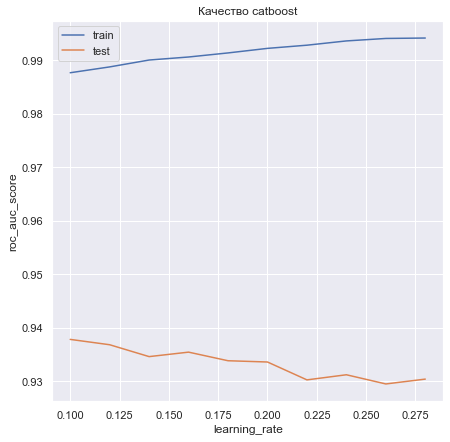

Наилучшее learning_rate=0.1


In [235]:
plot_catboost('learning_rate', np.arange(0.1, 0.3, 0.02))

Learning rate set to 0.5
0:	learn: 0.7246796	total: 2.71ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7246796	total: 1.9ms	remaining: 1.9ms
1:	learn: 0.6392696	total: 4.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7246796	total: 2.63ms	remaining: 5.26ms
1:	learn: 0.6392696	total: 4.66ms	remaining: 2.33ms
2:	learn: 0.5978990	total: 6.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7246796	total: 5.79ms	remaining: 17.4ms
1:	learn: 0.6392696	total: 10.7ms	remaining: 10.7ms
2:	learn: 0.5978990	total: 16.3ms	remaining: 5.42ms
3:	learn: 0.5771787	total: 19.7ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7246796	total: 4.12ms	remaining: 16.5ms
1:	learn: 0.6392696	total: 6.87ms	remaining: 10.3ms
2:	learn: 0.5978990	total: 8.99ms	remaining: 5.99ms
3:	learn: 0.5771787	total: 10.9ms	remaining: 2.73ms
4:	learn: 0.5657193	total: 13.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.7246796	total: 3.71ms	remaining: 18.5ms
1:	learn: 0.6392696	total: 7.17ms	rem

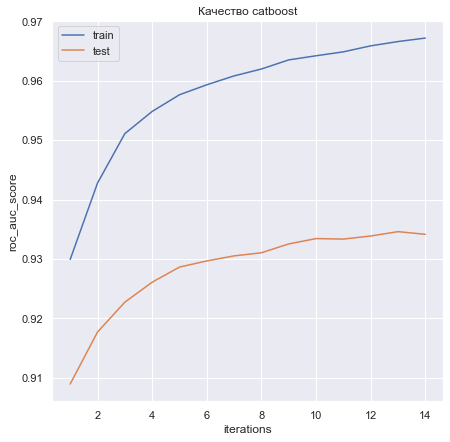

Наилучшее iterations=13


In [236]:
plot_catboost('iterations', np.arange(1, 15, 1))

Learning rate set to 0.065101
0:	learn: 0.9190763	total: 2.35ms	remaining: 2.35s
1:	learn: 0.8877830	total: 4.11ms	remaining: 2.05s
2:	learn: 0.8590518	total: 5.89ms	remaining: 1.96s
3:	learn: 0.8337638	total: 7.34ms	remaining: 1.83s
4:	learn: 0.8113487	total: 9.59ms	remaining: 1.91s
5:	learn: 0.7895573	total: 11.2ms	remaining: 1.85s
6:	learn: 0.7694543	total: 12.6ms	remaining: 1.79s
7:	learn: 0.7506726	total: 14ms	remaining: 1.74s
8:	learn: 0.7336699	total: 15.9ms	remaining: 1.75s
9:	learn: 0.7187829	total: 17.9ms	remaining: 1.77s
10:	learn: 0.7041432	total: 19.4ms	remaining: 1.75s
11:	learn: 0.6907460	total: 20.9ms	remaining: 1.72s
12:	learn: 0.6793101	total: 22.4ms	remaining: 1.7s
13:	learn: 0.6682318	total: 24.6ms	remaining: 1.73s
14:	learn: 0.6587133	total: 26.1ms	remaining: 1.71s
15:	learn: 0.6495297	total: 27.5ms	remaining: 1.69s
16:	learn: 0.6410691	total: 28.9ms	remaining: 1.67s
17:	learn: 0.6339994	total: 30.7ms	remaining: 1.68s
18:	learn: 0.6272729	total: 32.7ms	remaining: 1

172:	learn: 0.5187032	total: 312ms	remaining: 1.49s
173:	learn: 0.5185932	total: 315ms	remaining: 1.49s
174:	learn: 0.5184109	total: 317ms	remaining: 1.49s
175:	learn: 0.5181905	total: 319ms	remaining: 1.49s
176:	learn: 0.5180568	total: 321ms	remaining: 1.49s
177:	learn: 0.5179188	total: 323ms	remaining: 1.49s
178:	learn: 0.5176902	total: 326ms	remaining: 1.49s
179:	learn: 0.5174860	total: 329ms	remaining: 1.5s
180:	learn: 0.5173671	total: 331ms	remaining: 1.5s
181:	learn: 0.5172263	total: 334ms	remaining: 1.5s
182:	learn: 0.5171633	total: 336ms	remaining: 1.5s
183:	learn: 0.5170514	total: 338ms	remaining: 1.5s
184:	learn: 0.5169591	total: 340ms	remaining: 1.5s
185:	learn: 0.5167904	total: 346ms	remaining: 1.51s
186:	learn: 0.5166648	total: 349ms	remaining: 1.52s
187:	learn: 0.5165145	total: 352ms	remaining: 1.52s
188:	learn: 0.5164228	total: 355ms	remaining: 1.52s
189:	learn: 0.5162981	total: 356ms	remaining: 1.52s
190:	learn: 0.5160398	total: 358ms	remaining: 1.51s
191:	learn: 0.5159

370:	learn: 0.4988954	total: 679ms	remaining: 1.15s
371:	learn: 0.4988748	total: 681ms	remaining: 1.15s
372:	learn: 0.4987747	total: 683ms	remaining: 1.15s
373:	learn: 0.4987105	total: 686ms	remaining: 1.15s
374:	learn: 0.4986616	total: 688ms	remaining: 1.15s
375:	learn: 0.4985361	total: 690ms	remaining: 1.15s
376:	learn: 0.4985066	total: 692ms	remaining: 1.14s
377:	learn: 0.4984773	total: 695ms	remaining: 1.14s
378:	learn: 0.4984542	total: 697ms	remaining: 1.14s
379:	learn: 0.4983966	total: 699ms	remaining: 1.14s
380:	learn: 0.4983458	total: 701ms	remaining: 1.14s
381:	learn: 0.4982259	total: 702ms	remaining: 1.14s
382:	learn: 0.4981768	total: 704ms	remaining: 1.13s
383:	learn: 0.4980451	total: 706ms	remaining: 1.13s
384:	learn: 0.4980132	total: 707ms	remaining: 1.13s
385:	learn: 0.4979809	total: 709ms	remaining: 1.13s
386:	learn: 0.4979051	total: 710ms	remaining: 1.13s
387:	learn: 0.4977902	total: 712ms	remaining: 1.12s
388:	learn: 0.4977572	total: 715ms	remaining: 1.12s
389:	learn: 

544:	learn: 0.4892428	total: 1.09s	remaining: 915ms
545:	learn: 0.4892403	total: 1.1s	remaining: 915ms
546:	learn: 0.4891881	total: 1.1s	remaining: 914ms
547:	learn: 0.4891432	total: 1.11s	remaining: 912ms
548:	learn: 0.4890922	total: 1.11s	remaining: 913ms
549:	learn: 0.4890730	total: 1.11s	remaining: 911ms
550:	learn: 0.4889574	total: 1.12s	remaining: 910ms
551:	learn: 0.4888757	total: 1.12s	remaining: 908ms
552:	learn: 0.4888491	total: 1.12s	remaining: 906ms
553:	learn: 0.4888138	total: 1.13s	remaining: 906ms
554:	learn: 0.4887554	total: 1.13s	remaining: 905ms
555:	learn: 0.4887311	total: 1.13s	remaining: 902ms
556:	learn: 0.4887263	total: 1.13s	remaining: 901ms
557:	learn: 0.4886859	total: 1.13s	remaining: 899ms
558:	learn: 0.4886623	total: 1.14s	remaining: 897ms
559:	learn: 0.4886308	total: 1.14s	remaining: 895ms
560:	learn: 0.4886085	total: 1.14s	remaining: 894ms
561:	learn: 0.4885614	total: 1.14s	remaining: 892ms
562:	learn: 0.4885193	total: 1.15s	remaining: 890ms
563:	learn: 0.

702:	learn: 0.4828212	total: 1.46s	remaining: 617ms
703:	learn: 0.4828178	total: 1.46s	remaining: 615ms
704:	learn: 0.4827710	total: 1.47s	remaining: 613ms
705:	learn: 0.4827660	total: 1.47s	remaining: 611ms
706:	learn: 0.4827626	total: 1.47s	remaining: 609ms
707:	learn: 0.4827533	total: 1.47s	remaining: 607ms
708:	learn: 0.4827052	total: 1.47s	remaining: 605ms
709:	learn: 0.4827017	total: 1.48s	remaining: 603ms
710:	learn: 0.4826861	total: 1.48s	remaining: 601ms
711:	learn: 0.4826251	total: 1.48s	remaining: 599ms
712:	learn: 0.4826212	total: 1.48s	remaining: 596ms
713:	learn: 0.4826155	total: 1.48s	remaining: 594ms
714:	learn: 0.4825911	total: 1.49s	remaining: 592ms
715:	learn: 0.4825666	total: 1.49s	remaining: 590ms
716:	learn: 0.4825572	total: 1.49s	remaining: 588ms
717:	learn: 0.4824951	total: 1.49s	remaining: 585ms
718:	learn: 0.4824387	total: 1.49s	remaining: 583ms
719:	learn: 0.4824259	total: 1.49s	remaining: 581ms
720:	learn: 0.4824205	total: 1.49s	remaining: 578ms
721:	learn: 

893:	learn: 0.4764724	total: 1.77s	remaining: 210ms
894:	learn: 0.4764479	total: 1.78s	remaining: 209ms
895:	learn: 0.4764375	total: 1.78s	remaining: 207ms
896:	learn: 0.4763978	total: 1.78s	remaining: 205ms
897:	learn: 0.4763659	total: 1.78s	remaining: 203ms
898:	learn: 0.4763619	total: 1.79s	remaining: 201ms
899:	learn: 0.4763550	total: 1.79s	remaining: 199ms
900:	learn: 0.4763189	total: 1.79s	remaining: 197ms
901:	learn: 0.4762360	total: 1.79s	remaining: 195ms
902:	learn: 0.4762155	total: 1.79s	remaining: 193ms
903:	learn: 0.4761826	total: 1.8s	remaining: 191ms
904:	learn: 0.4761656	total: 1.8s	remaining: 189ms
905:	learn: 0.4761253	total: 1.8s	remaining: 187ms
906:	learn: 0.4761094	total: 1.8s	remaining: 185ms
907:	learn: 0.4760904	total: 1.8s	remaining: 183ms
908:	learn: 0.4760580	total: 1.8s	remaining: 181ms
909:	learn: 0.4760250	total: 1.81s	remaining: 179ms
910:	learn: 0.4759896	total: 1.81s	remaining: 177ms
911:	learn: 0.4759656	total: 1.81s	remaining: 175ms
912:	learn: 0.4759

99:	learn: 0.5311153	total: 179ms	remaining: 1.61s
100:	learn: 0.5308348	total: 181ms	remaining: 1.61s
101:	learn: 0.5306801	total: 185ms	remaining: 1.62s
102:	learn: 0.5305482	total: 189ms	remaining: 1.65s
103:	learn: 0.5303075	total: 193ms	remaining: 1.66s
104:	learn: 0.5300982	total: 195ms	remaining: 1.66s
105:	learn: 0.5294183	total: 197ms	remaining: 1.66s
106:	learn: 0.5292879	total: 200ms	remaining: 1.67s
107:	learn: 0.5291317	total: 202ms	remaining: 1.67s
108:	learn: 0.5286442	total: 205ms	remaining: 1.67s
109:	learn: 0.5283843	total: 208ms	remaining: 1.68s
110:	learn: 0.5281378	total: 210ms	remaining: 1.68s
111:	learn: 0.5277046	total: 211ms	remaining: 1.67s
112:	learn: 0.5276280	total: 213ms	remaining: 1.67s
113:	learn: 0.5274016	total: 215ms	remaining: 1.67s
114:	learn: 0.5271756	total: 218ms	remaining: 1.68s
115:	learn: 0.5268265	total: 222ms	remaining: 1.69s
116:	learn: 0.5266120	total: 224ms	remaining: 1.69s
117:	learn: 0.5263966	total: 226ms	remaining: 1.69s
118:	learn: 0

293:	learn: 0.5017680	total: 548ms	remaining: 1.31s
294:	learn: 0.5016120	total: 551ms	remaining: 1.31s
295:	learn: 0.5015712	total: 553ms	remaining: 1.31s
296:	learn: 0.5014678	total: 560ms	remaining: 1.32s
297:	learn: 0.5013623	total: 566ms	remaining: 1.33s
298:	learn: 0.5013440	total: 579ms	remaining: 1.36s
299:	learn: 0.5012318	total: 582ms	remaining: 1.36s
300:	learn: 0.5011764	total: 586ms	remaining: 1.36s
301:	learn: 0.5010048	total: 593ms	remaining: 1.37s
302:	learn: 0.5008800	total: 596ms	remaining: 1.37s
303:	learn: 0.5006925	total: 598ms	remaining: 1.37s
304:	learn: 0.5006290	total: 601ms	remaining: 1.37s
305:	learn: 0.5005718	total: 602ms	remaining: 1.37s
306:	learn: 0.5004811	total: 604ms	remaining: 1.36s
307:	learn: 0.5003754	total: 607ms	remaining: 1.36s
308:	learn: 0.5003302	total: 610ms	remaining: 1.36s
309:	learn: 0.5002377	total: 614ms	remaining: 1.36s
310:	learn: 0.5001480	total: 616ms	remaining: 1.36s
311:	learn: 0.5000772	total: 617ms	remaining: 1.36s
312:	learn: 

492:	learn: 0.4882115	total: 1.09s	remaining: 1.12s
493:	learn: 0.4881729	total: 1.1s	remaining: 1.12s
494:	learn: 0.4881534	total: 1.1s	remaining: 1.12s
495:	learn: 0.4880704	total: 1.1s	remaining: 1.12s
496:	learn: 0.4880216	total: 1.1s	remaining: 1.12s
497:	learn: 0.4879801	total: 1.1s	remaining: 1.11s
498:	learn: 0.4879138	total: 1.11s	remaining: 1.11s
499:	learn: 0.4878563	total: 1.11s	remaining: 1.11s
500:	learn: 0.4877917	total: 1.11s	remaining: 1.11s
501:	learn: 0.4877427	total: 1.11s	remaining: 1.1s
502:	learn: 0.4876418	total: 1.12s	remaining: 1.1s
503:	learn: 0.4876378	total: 1.12s	remaining: 1.1s
504:	learn: 0.4875023	total: 1.12s	remaining: 1.1s
505:	learn: 0.4874647	total: 1.12s	remaining: 1.1s
506:	learn: 0.4873704	total: 1.13s	remaining: 1.1s
507:	learn: 0.4873233	total: 1.13s	remaining: 1.09s
508:	learn: 0.4873094	total: 1.13s	remaining: 1.09s
509:	learn: 0.4872395	total: 1.13s	remaining: 1.09s
510:	learn: 0.4872137	total: 1.13s	remaining: 1.08s
511:	learn: 0.4871849	t

711:	learn: 0.4780327	total: 1.46s	remaining: 591ms
712:	learn: 0.4779671	total: 1.46s	remaining: 589ms
713:	learn: 0.4779414	total: 1.47s	remaining: 588ms
714:	learn: 0.4778556	total: 1.47s	remaining: 586ms
715:	learn: 0.4778142	total: 1.47s	remaining: 584ms
716:	learn: 0.4777504	total: 1.47s	remaining: 582ms
717:	learn: 0.4777353	total: 1.48s	remaining: 580ms
718:	learn: 0.4776779	total: 1.48s	remaining: 578ms
719:	learn: 0.4776644	total: 1.48s	remaining: 577ms
720:	learn: 0.4776483	total: 1.49s	remaining: 575ms
721:	learn: 0.4776005	total: 1.49s	remaining: 573ms
722:	learn: 0.4775845	total: 1.49s	remaining: 572ms
723:	learn: 0.4775089	total: 1.5s	remaining: 570ms
724:	learn: 0.4774735	total: 1.5s	remaining: 569ms
725:	learn: 0.4774393	total: 1.5s	remaining: 568ms
726:	learn: 0.4774204	total: 1.51s	remaining: 567ms
727:	learn: 0.4773615	total: 1.52s	remaining: 568ms
728:	learn: 0.4773359	total: 1.53s	remaining: 569ms
729:	learn: 0.4772994	total: 1.53s	remaining: 568ms
730:	learn: 0.4

937:	learn: 0.4707788	total: 2.02s	remaining: 133ms
938:	learn: 0.4707735	total: 2.02s	remaining: 131ms
939:	learn: 0.4707574	total: 2.02s	remaining: 129ms
940:	learn: 0.4707352	total: 2.03s	remaining: 127ms
941:	learn: 0.4707334	total: 2.03s	remaining: 125ms
942:	learn: 0.4706844	total: 2.03s	remaining: 123ms
943:	learn: 0.4706722	total: 2.04s	remaining: 121ms
944:	learn: 0.4706696	total: 2.04s	remaining: 119ms
945:	learn: 0.4705976	total: 2.04s	remaining: 117ms
946:	learn: 0.4705351	total: 2.05s	remaining: 115ms
947:	learn: 0.4705086	total: 2.05s	remaining: 112ms
948:	learn: 0.4704902	total: 2.05s	remaining: 110ms
949:	learn: 0.4704409	total: 2.06s	remaining: 108ms
950:	learn: 0.4703964	total: 2.06s	remaining: 106ms
951:	learn: 0.4703491	total: 2.06s	remaining: 104ms
952:	learn: 0.4703390	total: 2.06s	remaining: 102ms
953:	learn: 0.4702845	total: 2.06s	remaining: 99.6ms
954:	learn: 0.4702600	total: 2.07s	remaining: 97.4ms
955:	learn: 0.4702428	total: 2.07s	remaining: 95.3ms
956:	lear

168:	learn: 0.5156199	total: 358ms	remaining: 1.76s
169:	learn: 0.5155206	total: 362ms	remaining: 1.77s
170:	learn: 0.5153215	total: 366ms	remaining: 1.77s
171:	learn: 0.5151391	total: 371ms	remaining: 1.79s
172:	learn: 0.5149866	total: 375ms	remaining: 1.79s
173:	learn: 0.5149069	total: 378ms	remaining: 1.8s
174:	learn: 0.5147869	total: 383ms	remaining: 1.8s
175:	learn: 0.5146260	total: 385ms	remaining: 1.8s
176:	learn: 0.5144115	total: 387ms	remaining: 1.8s
177:	learn: 0.5141935	total: 389ms	remaining: 1.8s
178:	learn: 0.5139670	total: 391ms	remaining: 1.79s
179:	learn: 0.5138065	total: 393ms	remaining: 1.79s
180:	learn: 0.5136700	total: 395ms	remaining: 1.79s
181:	learn: 0.5134635	total: 397ms	remaining: 1.79s
182:	learn: 0.5133612	total: 400ms	remaining: 1.78s
183:	learn: 0.5132309	total: 402ms	remaining: 1.78s
184:	learn: 0.5130731	total: 404ms	remaining: 1.78s
185:	learn: 0.5128928	total: 406ms	remaining: 1.78s
186:	learn: 0.5127514	total: 408ms	remaining: 1.77s
187:	learn: 0.512

339:	learn: 0.4954295	total: 726ms	remaining: 1.41s
340:	learn: 0.4953432	total: 730ms	remaining: 1.41s
341:	learn: 0.4952174	total: 734ms	remaining: 1.41s
342:	learn: 0.4951511	total: 737ms	remaining: 1.41s
343:	learn: 0.4951259	total: 741ms	remaining: 1.41s
344:	learn: 0.4950853	total: 744ms	remaining: 1.41s
345:	learn: 0.4950026	total: 746ms	remaining: 1.41s
346:	learn: 0.4949403	total: 748ms	remaining: 1.41s
347:	learn: 0.4948218	total: 750ms	remaining: 1.4s
348:	learn: 0.4947860	total: 753ms	remaining: 1.4s
349:	learn: 0.4947538	total: 755ms	remaining: 1.4s
350:	learn: 0.4946960	total: 757ms	remaining: 1.4s
351:	learn: 0.4946670	total: 759ms	remaining: 1.4s
352:	learn: 0.4945633	total: 762ms	remaining: 1.4s
353:	learn: 0.4944895	total: 764ms	remaining: 1.39s
354:	learn: 0.4943801	total: 766ms	remaining: 1.39s
355:	learn: 0.4943501	total: 768ms	remaining: 1.39s
356:	learn: 0.4942984	total: 770ms	remaining: 1.39s
357:	learn: 0.4942412	total: 772ms	remaining: 1.38s
358:	learn: 0.4941

512:	learn: 0.4843106	total: 1.09s	remaining: 1.04s
513:	learn: 0.4842623	total: 1.09s	remaining: 1.03s
514:	learn: 0.4842122	total: 1.1s	remaining: 1.03s
515:	learn: 0.4842089	total: 1.1s	remaining: 1.03s
516:	learn: 0.4841847	total: 1.1s	remaining: 1.03s
517:	learn: 0.4841157	total: 1.1s	remaining: 1.03s
518:	learn: 0.4840519	total: 1.1s	remaining: 1.02s
519:	learn: 0.4839824	total: 1.11s	remaining: 1.02s
520:	learn: 0.4839570	total: 1.11s	remaining: 1.02s
521:	learn: 0.4839005	total: 1.11s	remaining: 1.02s
522:	learn: 0.4838685	total: 1.11s	remaining: 1.02s
523:	learn: 0.4838232	total: 1.11s	remaining: 1.01s
524:	learn: 0.4838078	total: 1.12s	remaining: 1.01s
525:	learn: 0.4837415	total: 1.12s	remaining: 1.01s
526:	learn: 0.4837341	total: 1.12s	remaining: 1s
527:	learn: 0.4837288	total: 1.12s	remaining: 1s
528:	learn: 0.4836756	total: 1.12s	remaining: 1s
529:	learn: 0.4836472	total: 1.13s	remaining: 999ms
530:	learn: 0.4835708	total: 1.13s	remaining: 996ms
531:	learn: 0.4835173	tota

742:	learn: 0.4738360	total: 1.46s	remaining: 505ms
743:	learn: 0.4738264	total: 1.46s	remaining: 503ms
744:	learn: 0.4738255	total: 1.46s	remaining: 501ms
745:	learn: 0.4738121	total: 1.47s	remaining: 499ms
746:	learn: 0.4737860	total: 1.47s	remaining: 497ms
747:	learn: 0.4737286	total: 1.47s	remaining: 496ms
748:	learn: 0.4736991	total: 1.47s	remaining: 494ms
749:	learn: 0.4736629	total: 1.48s	remaining: 492ms
750:	learn: 0.4736484	total: 1.48s	remaining: 490ms
751:	learn: 0.4736363	total: 1.48s	remaining: 488ms
752:	learn: 0.4736277	total: 1.48s	remaining: 486ms
753:	learn: 0.4735894	total: 1.48s	remaining: 484ms
754:	learn: 0.4735424	total: 1.48s	remaining: 482ms
755:	learn: 0.4735398	total: 1.49s	remaining: 480ms
756:	learn: 0.4734871	total: 1.49s	remaining: 478ms
757:	learn: 0.4734734	total: 1.49s	remaining: 475ms
758:	learn: 0.4733726	total: 1.49s	remaining: 473ms
759:	learn: 0.4733536	total: 1.49s	remaining: 471ms
760:	learn: 0.4732913	total: 1.49s	remaining: 469ms
761:	learn: 

963:	learn: 0.4670672	total: 1.83s	remaining: 68.2ms
964:	learn: 0.4670524	total: 1.83s	remaining: 66.3ms
965:	learn: 0.4670373	total: 1.83s	remaining: 64.5ms
966:	learn: 0.4670108	total: 1.83s	remaining: 62.6ms
967:	learn: 0.4669773	total: 1.84s	remaining: 60.7ms
968:	learn: 0.4669596	total: 1.84s	remaining: 58.9ms
969:	learn: 0.4669225	total: 1.84s	remaining: 57ms
970:	learn: 0.4668966	total: 1.84s	remaining: 55.1ms
971:	learn: 0.4668831	total: 1.85s	remaining: 53.3ms
972:	learn: 0.4668766	total: 1.85s	remaining: 51.4ms
973:	learn: 0.4668763	total: 1.85s	remaining: 49.5ms
974:	learn: 0.4668162	total: 1.85s	remaining: 47.6ms
975:	learn: 0.4667751	total: 1.86s	remaining: 45.7ms
976:	learn: 0.4667237	total: 1.86s	remaining: 43.8ms
977:	learn: 0.4666260	total: 1.86s	remaining: 41.9ms
978:	learn: 0.4666001	total: 1.86s	remaining: 40ms
979:	learn: 0.4665281	total: 1.87s	remaining: 38.1ms
980:	learn: 0.4664982	total: 1.87s	remaining: 36.2ms
981:	learn: 0.4664879	total: 1.87s	remaining: 34.3

123:	learn: 0.5232832	total: 221ms	remaining: 1.56s
124:	learn: 0.5230847	total: 223ms	remaining: 1.56s
125:	learn: 0.5228949	total: 226ms	remaining: 1.57s
126:	learn: 0.5226910	total: 228ms	remaining: 1.57s
127:	learn: 0.5224924	total: 231ms	remaining: 1.57s
128:	learn: 0.5223167	total: 233ms	remaining: 1.57s
129:	learn: 0.5221705	total: 235ms	remaining: 1.57s
130:	learn: 0.5220425	total: 238ms	remaining: 1.58s
131:	learn: 0.5218898	total: 240ms	remaining: 1.58s
132:	learn: 0.5217713	total: 241ms	remaining: 1.57s
133:	learn: 0.5216543	total: 243ms	remaining: 1.57s
134:	learn: 0.5215213	total: 244ms	remaining: 1.57s
135:	learn: 0.5214245	total: 246ms	remaining: 1.56s
136:	learn: 0.5211995	total: 248ms	remaining: 1.56s
137:	learn: 0.5209917	total: 249ms	remaining: 1.56s
138:	learn: 0.5207976	total: 251ms	remaining: 1.55s
139:	learn: 0.5204885	total: 252ms	remaining: 1.55s
140:	learn: 0.5202354	total: 254ms	remaining: 1.55s
141:	learn: 0.5200185	total: 256ms	remaining: 1.55s
142:	learn: 

342:	learn: 0.4945516	total: 590ms	remaining: 1.13s
343:	learn: 0.4944294	total: 593ms	remaining: 1.13s
344:	learn: 0.4943531	total: 596ms	remaining: 1.13s
345:	learn: 0.4942356	total: 599ms	remaining: 1.13s
346:	learn: 0.4941381	total: 605ms	remaining: 1.14s
347:	learn: 0.4940818	total: 610ms	remaining: 1.14s
348:	learn: 0.4940197	total: 612ms	remaining: 1.14s
349:	learn: 0.4939350	total: 616ms	remaining: 1.14s
350:	learn: 0.4938400	total: 623ms	remaining: 1.15s
351:	learn: 0.4937203	total: 626ms	remaining: 1.15s
352:	learn: 0.4936497	total: 629ms	remaining: 1.15s
353:	learn: 0.4935956	total: 632ms	remaining: 1.15s
354:	learn: 0.4935908	total: 634ms	remaining: 1.15s
355:	learn: 0.4935479	total: 644ms	remaining: 1.17s
356:	learn: 0.4934587	total: 653ms	remaining: 1.18s
357:	learn: 0.4934155	total: 660ms	remaining: 1.18s
358:	learn: 0.4933739	total: 664ms	remaining: 1.19s
359:	learn: 0.4931972	total: 667ms	remaining: 1.19s
360:	learn: 0.4931641	total: 674ms	remaining: 1.19s
361:	learn: 

502:	learn: 0.4840037	total: 958ms	remaining: 947ms
503:	learn: 0.4839621	total: 961ms	remaining: 946ms
504:	learn: 0.4839541	total: 964ms	remaining: 945ms
505:	learn: 0.4839450	total: 966ms	remaining: 944ms
506:	learn: 0.4839023	total: 969ms	remaining: 942ms
507:	learn: 0.4839004	total: 972ms	remaining: 941ms
508:	learn: 0.4837899	total: 975ms	remaining: 941ms
509:	learn: 0.4837391	total: 980ms	remaining: 941ms
510:	learn: 0.4836751	total: 981ms	remaining: 939ms
511:	learn: 0.4836136	total: 983ms	remaining: 937ms
512:	learn: 0.4834650	total: 985ms	remaining: 935ms
513:	learn: 0.4833567	total: 986ms	remaining: 932ms
514:	learn: 0.4832016	total: 988ms	remaining: 930ms
515:	learn: 0.4830321	total: 990ms	remaining: 928ms
516:	learn: 0.4830216	total: 991ms	remaining: 926ms
517:	learn: 0.4830181	total: 993ms	remaining: 924ms
518:	learn: 0.4829442	total: 994ms	remaining: 921ms
519:	learn: 0.4828112	total: 996ms	remaining: 920ms
520:	learn: 0.4827855	total: 999ms	remaining: 918ms
521:	learn: 

699:	learn: 0.4741750	total: 1.33s	remaining: 569ms
700:	learn: 0.4741699	total: 1.33s	remaining: 568ms
701:	learn: 0.4741605	total: 1.33s	remaining: 566ms
702:	learn: 0.4741519	total: 1.34s	remaining: 565ms
703:	learn: 0.4741116	total: 1.34s	remaining: 563ms
704:	learn: 0.4740223	total: 1.34s	remaining: 561ms
705:	learn: 0.4740204	total: 1.34s	remaining: 560ms
706:	learn: 0.4739258	total: 1.35s	remaining: 558ms
707:	learn: 0.4738082	total: 1.35s	remaining: 556ms
708:	learn: 0.4737974	total: 1.35s	remaining: 555ms
709:	learn: 0.4737310	total: 1.35s	remaining: 553ms
710:	learn: 0.4737152	total: 1.35s	remaining: 551ms
711:	learn: 0.4736284	total: 1.36s	remaining: 549ms
712:	learn: 0.4735041	total: 1.36s	remaining: 547ms
713:	learn: 0.4734672	total: 1.36s	remaining: 545ms
714:	learn: 0.4734279	total: 1.36s	remaining: 543ms
715:	learn: 0.4733850	total: 1.36s	remaining: 541ms
716:	learn: 0.4733337	total: 1.36s	remaining: 539ms
717:	learn: 0.4733268	total: 1.37s	remaining: 537ms
718:	learn: 

864:	learn: 0.4677837	total: 1.69s	remaining: 264ms
865:	learn: 0.4677455	total: 1.7s	remaining: 263ms
866:	learn: 0.4676337	total: 1.7s	remaining: 261ms
867:	learn: 0.4676301	total: 1.7s	remaining: 259ms
868:	learn: 0.4676097	total: 1.71s	remaining: 257ms
869:	learn: 0.4675849	total: 1.71s	remaining: 255ms
870:	learn: 0.4675410	total: 1.71s	remaining: 254ms
871:	learn: 0.4674840	total: 1.72s	remaining: 252ms
872:	learn: 0.4674042	total: 1.72s	remaining: 250ms
873:	learn: 0.4673881	total: 1.72s	remaining: 248ms
874:	learn: 0.4673370	total: 1.72s	remaining: 246ms
875:	learn: 0.4672905	total: 1.72s	remaining: 244ms
876:	learn: 0.4672836	total: 1.73s	remaining: 242ms
877:	learn: 0.4672773	total: 1.73s	remaining: 240ms
878:	learn: 0.4672415	total: 1.73s	remaining: 238ms
879:	learn: 0.4671636	total: 1.73s	remaining: 236ms
880:	learn: 0.4671348	total: 1.74s	remaining: 234ms
881:	learn: 0.4671017	total: 1.74s	remaining: 232ms
882:	learn: 0.4670664	total: 1.74s	remaining: 231ms
883:	learn: 0.4

82:	learn: 0.5347124	total: 193ms	remaining: 2.13s
83:	learn: 0.5344294	total: 196ms	remaining: 2.13s
84:	learn: 0.5340038	total: 198ms	remaining: 2.14s
85:	learn: 0.5336539	total: 203ms	remaining: 2.16s
86:	learn: 0.5333800	total: 206ms	remaining: 2.16s
87:	learn: 0.5330874	total: 208ms	remaining: 2.16s
88:	learn: 0.5328612	total: 211ms	remaining: 2.16s
89:	learn: 0.5326109	total: 214ms	remaining: 2.16s
90:	learn: 0.5322800	total: 219ms	remaining: 2.19s
91:	learn: 0.5320970	total: 222ms	remaining: 2.19s
92:	learn: 0.5318140	total: 225ms	remaining: 2.19s
93:	learn: 0.5315678	total: 227ms	remaining: 2.18s
94:	learn: 0.5309597	total: 228ms	remaining: 2.17s
95:	learn: 0.5306585	total: 231ms	remaining: 2.17s
96:	learn: 0.5304038	total: 236ms	remaining: 2.2s
97:	learn: 0.5301481	total: 238ms	remaining: 2.19s
98:	learn: 0.5299969	total: 240ms	remaining: 2.18s
99:	learn: 0.5298615	total: 242ms	remaining: 2.17s
100:	learn: 0.5296524	total: 244ms	remaining: 2.17s
101:	learn: 0.5294929	total: 24

261:	learn: 0.5000325	total: 566ms	remaining: 1.59s
262:	learn: 0.4998702	total: 568ms	remaining: 1.59s
263:	learn: 0.4997087	total: 572ms	remaining: 1.59s
264:	learn: 0.4996226	total: 575ms	remaining: 1.59s
265:	learn: 0.4994884	total: 580ms	remaining: 1.6s
266:	learn: 0.4994120	total: 582ms	remaining: 1.6s
267:	learn: 0.4992841	total: 585ms	remaining: 1.6s
268:	learn: 0.4991136	total: 587ms	remaining: 1.59s
269:	learn: 0.4990244	total: 592ms	remaining: 1.6s
270:	learn: 0.4988939	total: 595ms	remaining: 1.6s
271:	learn: 0.4987718	total: 598ms	remaining: 1.6s
272:	learn: 0.4986524	total: 600ms	remaining: 1.6s
273:	learn: 0.4985239	total: 602ms	remaining: 1.6s
274:	learn: 0.4983974	total: 604ms	remaining: 1.59s
275:	learn: 0.4982802	total: 609ms	remaining: 1.6s
276:	learn: 0.4981239	total: 612ms	remaining: 1.6s
277:	learn: 0.4979998	total: 615ms	remaining: 1.6s
278:	learn: 0.4979521	total: 617ms	remaining: 1.59s
279:	learn: 0.4978306	total: 619ms	remaining: 1.59s
280:	learn: 0.4977151	t

429:	learn: 0.4855589	total: 931ms	remaining: 1.23s
430:	learn: 0.4854838	total: 934ms	remaining: 1.23s
431:	learn: 0.4853580	total: 936ms	remaining: 1.23s
432:	learn: 0.4852684	total: 939ms	remaining: 1.23s
433:	learn: 0.4852158	total: 941ms	remaining: 1.23s
434:	learn: 0.4851238	total: 944ms	remaining: 1.23s
435:	learn: 0.4850547	total: 946ms	remaining: 1.22s
436:	learn: 0.4850076	total: 949ms	remaining: 1.22s
437:	learn: 0.4849837	total: 951ms	remaining: 1.22s
438:	learn: 0.4848814	total: 953ms	remaining: 1.22s
439:	learn: 0.4848288	total: 955ms	remaining: 1.22s
440:	learn: 0.4848266	total: 957ms	remaining: 1.21s
441:	learn: 0.4847741	total: 959ms	remaining: 1.21s
442:	learn: 0.4847187	total: 961ms	remaining: 1.21s
443:	learn: 0.4845994	total: 963ms	remaining: 1.21s
444:	learn: 0.4845338	total: 964ms	remaining: 1.2s
445:	learn: 0.4845084	total: 966ms	remaining: 1.2s
446:	learn: 0.4844894	total: 967ms	remaining: 1.2s
447:	learn: 0.4844851	total: 969ms	remaining: 1.19s
448:	learn: 0.4

637:	learn: 0.4747618	total: 1.3s	remaining: 738ms
638:	learn: 0.4746929	total: 1.3s	remaining: 737ms
639:	learn: 0.4746351	total: 1.31s	remaining: 736ms
640:	learn: 0.4746040	total: 1.31s	remaining: 734ms
641:	learn: 0.4745630	total: 1.31s	remaining: 732ms
642:	learn: 0.4745381	total: 1.32s	remaining: 731ms
643:	learn: 0.4744857	total: 1.32s	remaining: 729ms
644:	learn: 0.4744569	total: 1.32s	remaining: 729ms
645:	learn: 0.4743982	total: 1.33s	remaining: 727ms
646:	learn: 0.4743954	total: 1.33s	remaining: 725ms
647:	learn: 0.4743692	total: 1.33s	remaining: 723ms
648:	learn: 0.4742914	total: 1.33s	remaining: 721ms
649:	learn: 0.4742907	total: 1.33s	remaining: 719ms
650:	learn: 0.4742275	total: 1.34s	remaining: 717ms
651:	learn: 0.4742079	total: 1.34s	remaining: 714ms
652:	learn: 0.4741544	total: 1.34s	remaining: 712ms
653:	learn: 0.4741040	total: 1.34s	remaining: 710ms
654:	learn: 0.4740915	total: 1.34s	remaining: 708ms
655:	learn: 0.4740648	total: 1.34s	remaining: 705ms
656:	learn: 0.

835:	learn: 0.4664401	total: 1.67s	remaining: 328ms
836:	learn: 0.4663725	total: 1.67s	remaining: 326ms
837:	learn: 0.4662834	total: 1.68s	remaining: 324ms
838:	learn: 0.4662647	total: 1.68s	remaining: 322ms
839:	learn: 0.4662095	total: 1.68s	remaining: 320ms
840:	learn: 0.4661510	total: 1.68s	remaining: 318ms
841:	learn: 0.4661002	total: 1.69s	remaining: 316ms
842:	learn: 0.4660198	total: 1.69s	remaining: 314ms
843:	learn: 0.4660163	total: 1.69s	remaining: 312ms
844:	learn: 0.4659667	total: 1.69s	remaining: 311ms
845:	learn: 0.4659665	total: 1.69s	remaining: 308ms
846:	learn: 0.4659563	total: 1.7s	remaining: 306ms
847:	learn: 0.4659096	total: 1.7s	remaining: 304ms
848:	learn: 0.4658383	total: 1.7s	remaining: 302ms
849:	learn: 0.4657633	total: 1.7s	remaining: 300ms
850:	learn: 0.4656957	total: 1.7s	remaining: 298ms
851:	learn: 0.4656721	total: 1.71s	remaining: 296ms
852:	learn: 0.4655846	total: 1.71s	remaining: 294ms
853:	learn: 0.4655759	total: 1.71s	remaining: 292ms
854:	learn: 0.465

Learning rate set to 0.065101
0:	learn: 0.9192917	total: 6.57ms	remaining: 6.57s
1:	learn: 0.8876984	total: 10.8ms	remaining: 5.38s
2:	learn: 0.8590759	total: 15.8ms	remaining: 5.24s
3:	learn: 0.8340084	total: 19.5ms	remaining: 4.84s
4:	learn: 0.8102731	total: 22.6ms	remaining: 4.5s
5:	learn: 0.7892361	total: 25ms	remaining: 4.14s
6:	learn: 0.7694725	total: 27.4ms	remaining: 3.89s
7:	learn: 0.7499770	total: 31.3ms	remaining: 3.88s
8:	learn: 0.7331971	total: 38.5ms	remaining: 4.24s
9:	learn: 0.7181377	total: 41.3ms	remaining: 4.09s
10:	learn: 0.7038846	total: 43.4ms	remaining: 3.9s
11:	learn: 0.6904530	total: 45.3ms	remaining: 3.73s
12:	learn: 0.6793546	total: 49.3ms	remaining: 3.74s
13:	learn: 0.6685598	total: 52.1ms	remaining: 3.67s
14:	learn: 0.6588278	total: 53.9ms	remaining: 3.54s
15:	learn: 0.6494521	total: 55.8ms	remaining: 3.43s
16:	learn: 0.6412724	total: 58.4ms	remaining: 3.37s
17:	learn: 0.6333751	total: 60.4ms	remaining: 3.29s
18:	learn: 0.6265249	total: 62ms	remaining: 3.2s

182:	learn: 0.5115970	total: 359ms	remaining: 1.6s
183:	learn: 0.5112666	total: 362ms	remaining: 1.61s
184:	learn: 0.5110090	total: 364ms	remaining: 1.6s
185:	learn: 0.5107978	total: 367ms	remaining: 1.6s
186:	learn: 0.5106061	total: 370ms	remaining: 1.61s
187:	learn: 0.5104586	total: 373ms	remaining: 1.61s
188:	learn: 0.5102509	total: 376ms	remaining: 1.61s
189:	learn: 0.5100905	total: 381ms	remaining: 1.62s
190:	learn: 0.5098762	total: 384ms	remaining: 1.62s
191:	learn: 0.5097102	total: 387ms	remaining: 1.63s
192:	learn: 0.5095534	total: 389ms	remaining: 1.63s
193:	learn: 0.5093648	total: 390ms	remaining: 1.62s
194:	learn: 0.5090882	total: 393ms	remaining: 1.62s
195:	learn: 0.5089429	total: 395ms	remaining: 1.62s
196:	learn: 0.5088321	total: 397ms	remaining: 1.62s
197:	learn: 0.5087398	total: 399ms	remaining: 1.61s
198:	learn: 0.5084456	total: 403ms	remaining: 1.62s
199:	learn: 0.5082167	total: 405ms	remaining: 1.62s
200:	learn: 0.5078845	total: 408ms	remaining: 1.62s
201:	learn: 0.5

375:	learn: 0.4885560	total: 725ms	remaining: 1.2s
376:	learn: 0.4884770	total: 730ms	remaining: 1.21s
377:	learn: 0.4884298	total: 733ms	remaining: 1.21s
378:	learn: 0.4883507	total: 736ms	remaining: 1.21s
379:	learn: 0.4882642	total: 738ms	remaining: 1.2s
380:	learn: 0.4881441	total: 743ms	remaining: 1.21s
381:	learn: 0.4880361	total: 746ms	remaining: 1.21s
382:	learn: 0.4880297	total: 749ms	remaining: 1.21s
383:	learn: 0.4879380	total: 752ms	remaining: 1.21s
384:	learn: 0.4878295	total: 754ms	remaining: 1.2s
385:	learn: 0.4877299	total: 762ms	remaining: 1.21s
386:	learn: 0.4876157	total: 765ms	remaining: 1.21s
387:	learn: 0.4875517	total: 767ms	remaining: 1.21s
388:	learn: 0.4874738	total: 769ms	remaining: 1.21s
389:	learn: 0.4874318	total: 771ms	remaining: 1.21s
390:	learn: 0.4873678	total: 773ms	remaining: 1.2s
391:	learn: 0.4873365	total: 776ms	remaining: 1.2s
392:	learn: 0.4872477	total: 778ms	remaining: 1.2s
393:	learn: 0.4871831	total: 780ms	remaining: 1.2s
394:	learn: 0.48714

610:	learn: 0.4742210	total: 1.28s	remaining: 813ms
611:	learn: 0.4742019	total: 1.28s	remaining: 812ms
612:	learn: 0.4741876	total: 1.28s	remaining: 810ms
613:	learn: 0.4741658	total: 1.28s	remaining: 808ms
614:	learn: 0.4741017	total: 1.29s	remaining: 806ms
615:	learn: 0.4740497	total: 1.29s	remaining: 805ms
616:	learn: 0.4740420	total: 1.29s	remaining: 804ms
617:	learn: 0.4739925	total: 1.3s	remaining: 802ms
618:	learn: 0.4739301	total: 1.3s	remaining: 801ms
619:	learn: 0.4738406	total: 1.3s	remaining: 800ms
620:	learn: 0.4737997	total: 1.31s	remaining: 798ms
621:	learn: 0.4737072	total: 1.31s	remaining: 796ms
622:	learn: 0.4737041	total: 1.31s	remaining: 794ms
623:	learn: 0.4736931	total: 1.31s	remaining: 791ms
624:	learn: 0.4736620	total: 1.31s	remaining: 789ms
625:	learn: 0.4735793	total: 1.32s	remaining: 788ms
626:	learn: 0.4735057	total: 1.32s	remaining: 786ms
627:	learn: 0.4734488	total: 1.32s	remaining: 785ms
628:	learn: 0.4734087	total: 1.33s	remaining: 782ms
629:	learn: 0.4

782:	learn: 0.4656915	total: 1.64s	remaining: 455ms
783:	learn: 0.4656307	total: 1.65s	remaining: 454ms
784:	learn: 0.4656175	total: 1.65s	remaining: 452ms
785:	learn: 0.4655434	total: 1.65s	remaining: 450ms
786:	learn: 0.4655143	total: 1.66s	remaining: 448ms
787:	learn: 0.4654774	total: 1.66s	remaining: 446ms
788:	learn: 0.4653824	total: 1.66s	remaining: 444ms
789:	learn: 0.4653257	total: 1.66s	remaining: 442ms
790:	learn: 0.4652921	total: 1.67s	remaining: 440ms
791:	learn: 0.4652791	total: 1.67s	remaining: 438ms
792:	learn: 0.4652478	total: 1.67s	remaining: 437ms
793:	learn: 0.4652241	total: 1.68s	remaining: 435ms
794:	learn: 0.4651981	total: 1.68s	remaining: 433ms
795:	learn: 0.4651416	total: 1.68s	remaining: 430ms
796:	learn: 0.4650696	total: 1.68s	remaining: 428ms
797:	learn: 0.4650433	total: 1.68s	remaining: 426ms
798:	learn: 0.4649960	total: 1.69s	remaining: 424ms
799:	learn: 0.4648936	total: 1.69s	remaining: 422ms
800:	learn: 0.4648644	total: 1.69s	remaining: 420ms
801:	learn: 

951:	learn: 0.4584282	total: 2.01s	remaining: 102ms
952:	learn: 0.4583971	total: 2.02s	remaining: 99.7ms
953:	learn: 0.4583583	total: 2.02s	remaining: 97.6ms
954:	learn: 0.4583126	total: 2.03s	remaining: 95.5ms
955:	learn: 0.4582851	total: 2.03s	remaining: 93.6ms
956:	learn: 0.4582534	total: 2.04s	remaining: 91.5ms
957:	learn: 0.4582315	total: 2.04s	remaining: 89.4ms
958:	learn: 0.4581894	total: 2.04s	remaining: 87.4ms
959:	learn: 0.4581240	total: 2.05s	remaining: 85.3ms
960:	learn: 0.4580779	total: 2.05s	remaining: 83.3ms
961:	learn: 0.4580320	total: 2.05s	remaining: 81.1ms
962:	learn: 0.4579984	total: 2.06s	remaining: 79ms
963:	learn: 0.4579575	total: 2.07s	remaining: 77.2ms
964:	learn: 0.4579348	total: 2.07s	remaining: 75.1ms
965:	learn: 0.4579150	total: 2.07s	remaining: 73ms
966:	learn: 0.4578767	total: 2.07s	remaining: 70.8ms
967:	learn: 0.4578527	total: 2.08s	remaining: 68.8ms
968:	learn: 0.4577913	total: 2.08s	remaining: 66.6ms
969:	learn: 0.4577431	total: 2.09s	remaining: 64.6m

141:	learn: 0.5195834	total: 270ms	remaining: 1.63s
142:	learn: 0.5193626	total: 273ms	remaining: 1.64s
143:	learn: 0.5191225	total: 276ms	remaining: 1.64s
144:	learn: 0.5190260	total: 279ms	remaining: 1.64s
145:	learn: 0.5189199	total: 281ms	remaining: 1.65s
146:	learn: 0.5187185	total: 284ms	remaining: 1.65s
147:	learn: 0.5185048	total: 287ms	remaining: 1.65s
148:	learn: 0.5182192	total: 290ms	remaining: 1.65s
149:	learn: 0.5180571	total: 292ms	remaining: 1.65s
150:	learn: 0.5178559	total: 296ms	remaining: 1.66s
151:	learn: 0.5176676	total: 298ms	remaining: 1.66s
152:	learn: 0.5174863	total: 301ms	remaining: 1.67s
153:	learn: 0.5172780	total: 303ms	remaining: 1.67s
154:	learn: 0.5170144	total: 305ms	remaining: 1.66s
155:	learn: 0.5168567	total: 307ms	remaining: 1.66s
156:	learn: 0.5166331	total: 309ms	remaining: 1.66s
157:	learn: 0.5165253	total: 311ms	remaining: 1.66s
158:	learn: 0.5161658	total: 312ms	remaining: 1.65s
159:	learn: 0.5159376	total: 314ms	remaining: 1.65s
160:	learn: 

343:	learn: 0.4916658	total: 638ms	remaining: 1.22s
344:	learn: 0.4915666	total: 641ms	remaining: 1.22s
345:	learn: 0.4913879	total: 643ms	remaining: 1.22s
346:	learn: 0.4912684	total: 646ms	remaining: 1.21s
347:	learn: 0.4911521	total: 648ms	remaining: 1.21s
348:	learn: 0.4910495	total: 651ms	remaining: 1.21s
349:	learn: 0.4909415	total: 653ms	remaining: 1.21s
350:	learn: 0.4908702	total: 656ms	remaining: 1.21s
351:	learn: 0.4907783	total: 658ms	remaining: 1.21s
352:	learn: 0.4907281	total: 662ms	remaining: 1.21s
353:	learn: 0.4906379	total: 663ms	remaining: 1.21s
354:	learn: 0.4905934	total: 665ms	remaining: 1.21s
355:	learn: 0.4905077	total: 667ms	remaining: 1.21s
356:	learn: 0.4905045	total: 668ms	remaining: 1.2s
357:	learn: 0.4904586	total: 670ms	remaining: 1.2s
358:	learn: 0.4902675	total: 672ms	remaining: 1.2s
359:	learn: 0.4901669	total: 673ms	remaining: 1.2s
360:	learn: 0.4901605	total: 675ms	remaining: 1.2s
361:	learn: 0.4900791	total: 677ms	remaining: 1.19s
362:	learn: 0.490

509:	learn: 0.4784234	total: 1.01s	remaining: 972ms
510:	learn: 0.4783957	total: 1.01s	remaining: 972ms
511:	learn: 0.4783572	total: 1.02s	remaining: 972ms
512:	learn: 0.4783077	total: 1.02s	remaining: 972ms
513:	learn: 0.4782520	total: 1.03s	remaining: 972ms
514:	learn: 0.4782438	total: 1.03s	remaining: 972ms
515:	learn: 0.4781374	total: 1.03s	remaining: 970ms
516:	learn: 0.4780831	total: 1.04s	remaining: 970ms
517:	learn: 0.4780813	total: 1.04s	remaining: 968ms
518:	learn: 0.4780509	total: 1.04s	remaining: 966ms
519:	learn: 0.4779757	total: 1.05s	remaining: 968ms
520:	learn: 0.4778798	total: 1.05s	remaining: 966ms
521:	learn: 0.4778427	total: 1.05s	remaining: 964ms
522:	learn: 0.4778198	total: 1.06s	remaining: 964ms
523:	learn: 0.4777645	total: 1.06s	remaining: 962ms
524:	learn: 0.4777148	total: 1.06s	remaining: 960ms
525:	learn: 0.4776598	total: 1.06s	remaining: 959ms
526:	learn: 0.4775892	total: 1.07s	remaining: 958ms
527:	learn: 0.4775293	total: 1.07s	remaining: 956ms
528:	learn: 

724:	learn: 0.4657682	total: 1.56s	remaining: 592ms
725:	learn: 0.4657317	total: 1.56s	remaining: 591ms
726:	learn: 0.4656711	total: 1.57s	remaining: 590ms
727:	learn: 0.4655795	total: 1.57s	remaining: 588ms
728:	learn: 0.4655227	total: 1.58s	remaining: 587ms
729:	learn: 0.4654868	total: 1.58s	remaining: 586ms
730:	learn: 0.4654379	total: 1.59s	remaining: 584ms
731:	learn: 0.4654090	total: 1.59s	remaining: 582ms
732:	learn: 0.4653400	total: 1.59s	remaining: 580ms
733:	learn: 0.4652735	total: 1.59s	remaining: 578ms
734:	learn: 0.4651799	total: 1.6s	remaining: 577ms
735:	learn: 0.4651051	total: 1.6s	remaining: 574ms
736:	learn: 0.4650833	total: 1.6s	remaining: 572ms
737:	learn: 0.4649835	total: 1.6s	remaining: 570ms
738:	learn: 0.4649396	total: 1.61s	remaining: 568ms
739:	learn: 0.4649011	total: 1.61s	remaining: 566ms
740:	learn: 0.4648960	total: 1.61s	remaining: 564ms
741:	learn: 0.4648605	total: 1.61s	remaining: 562ms
742:	learn: 0.4648348	total: 1.62s	remaining: 560ms
743:	learn: 0.46

962:	learn: 0.4543191	total: 2.11s	remaining: 81.2ms
963:	learn: 0.4542755	total: 2.12s	remaining: 79.1ms
964:	learn: 0.4542370	total: 2.12s	remaining: 76.9ms
965:	learn: 0.4541293	total: 2.12s	remaining: 74.8ms
966:	learn: 0.4540491	total: 2.13s	remaining: 72.6ms
967:	learn: 0.4539669	total: 2.13s	remaining: 70.5ms
968:	learn: 0.4539243	total: 2.13s	remaining: 68.3ms
969:	learn: 0.4538637	total: 2.14s	remaining: 66.2ms
970:	learn: 0.4538584	total: 2.14s	remaining: 64ms
971:	learn: 0.4538387	total: 2.14s	remaining: 61.7ms
972:	learn: 0.4537899	total: 2.15s	remaining: 59.5ms
973:	learn: 0.4537601	total: 2.15s	remaining: 57.3ms
974:	learn: 0.4536966	total: 2.15s	remaining: 55.1ms
975:	learn: 0.4536884	total: 2.15s	remaining: 52.9ms
976:	learn: 0.4536329	total: 2.15s	remaining: 50.7ms
977:	learn: 0.4536069	total: 2.16s	remaining: 48.5ms
978:	learn: 0.4535868	total: 2.16s	remaining: 46.3ms
979:	learn: 0.4535030	total: 2.16s	remaining: 44.1ms
980:	learn: 0.4534526	total: 2.16s	remaining: 41

128:	learn: 0.5210145	total: 603ms	remaining: 4.07s
129:	learn: 0.5208946	total: 607ms	remaining: 4.06s
130:	learn: 0.5206025	total: 610ms	remaining: 4.04s
131:	learn: 0.5205158	total: 612ms	remaining: 4.02s
132:	learn: 0.5202209	total: 615ms	remaining: 4.01s
133:	learn: 0.5198617	total: 618ms	remaining: 3.99s
134:	learn: 0.5196490	total: 621ms	remaining: 3.98s
135:	learn: 0.5195046	total: 624ms	remaining: 3.96s
136:	learn: 0.5193186	total: 629ms	remaining: 3.96s
137:	learn: 0.5191531	total: 632ms	remaining: 3.94s
138:	learn: 0.5189540	total: 633ms	remaining: 3.92s
139:	learn: 0.5187338	total: 636ms	remaining: 3.9s
140:	learn: 0.5185580	total: 638ms	remaining: 3.89s
141:	learn: 0.5184238	total: 640ms	remaining: 3.87s
142:	learn: 0.5182670	total: 644ms	remaining: 3.86s
143:	learn: 0.5181643	total: 646ms	remaining: 3.84s
144:	learn: 0.5179284	total: 648ms	remaining: 3.82s
145:	learn: 0.5177981	total: 649ms	remaining: 3.8s
146:	learn: 0.5174587	total: 652ms	remaining: 3.78s
147:	learn: 0.

303:	learn: 0.4932380	total: 969ms	remaining: 2.22s
304:	learn: 0.4931601	total: 972ms	remaining: 2.21s
305:	learn: 0.4931007	total: 975ms	remaining: 2.21s
306:	learn: 0.4930330	total: 977ms	remaining: 2.21s
307:	learn: 0.4929625	total: 980ms	remaining: 2.2s
308:	learn: 0.4928337	total: 983ms	remaining: 2.2s
309:	learn: 0.4927811	total: 986ms	remaining: 2.19s
310:	learn: 0.4926662	total: 989ms	remaining: 2.19s
311:	learn: 0.4925328	total: 992ms	remaining: 2.19s
312:	learn: 0.4924000	total: 996ms	remaining: 2.19s
313:	learn: 0.4922597	total: 999ms	remaining: 2.18s
314:	learn: 0.4921392	total: 1.01s	remaining: 2.19s
315:	learn: 0.4920532	total: 1.01s	remaining: 2.19s
316:	learn: 0.4919597	total: 1.01s	remaining: 2.18s
317:	learn: 0.4918210	total: 1.01s	remaining: 2.18s
318:	learn: 0.4917092	total: 1.02s	remaining: 2.17s
319:	learn: 0.4916431	total: 1.02s	remaining: 2.17s
320:	learn: 0.4915556	total: 1.02s	remaining: 2.16s
321:	learn: 0.4914127	total: 1.02s	remaining: 2.16s
322:	learn: 0.

485:	learn: 0.4771096	total: 1.34s	remaining: 1.41s
486:	learn: 0.4770665	total: 1.34s	remaining: 1.41s
487:	learn: 0.4770275	total: 1.34s	remaining: 1.41s
488:	learn: 0.4769914	total: 1.35s	remaining: 1.41s
489:	learn: 0.4768350	total: 1.35s	remaining: 1.4s
490:	learn: 0.4768130	total: 1.35s	remaining: 1.4s
491:	learn: 0.4767764	total: 1.35s	remaining: 1.4s
492:	learn: 0.4767178	total: 1.36s	remaining: 1.4s
493:	learn: 0.4766714	total: 1.36s	remaining: 1.39s
494:	learn: 0.4766540	total: 1.36s	remaining: 1.39s
495:	learn: 0.4766222	total: 1.36s	remaining: 1.39s
496:	learn: 0.4765564	total: 1.37s	remaining: 1.39s
497:	learn: 0.4765158	total: 1.37s	remaining: 1.38s
498:	learn: 0.4764083	total: 1.37s	remaining: 1.38s
499:	learn: 0.4762794	total: 1.38s	remaining: 1.38s
500:	learn: 0.4761619	total: 1.38s	remaining: 1.37s
501:	learn: 0.4760807	total: 1.38s	remaining: 1.37s
502:	learn: 0.4760270	total: 1.38s	remaining: 1.36s
503:	learn: 0.4759241	total: 1.38s	remaining: 1.36s
504:	learn: 0.47

671:	learn: 0.4649260	total: 1.7s	remaining: 832ms
672:	learn: 0.4648345	total: 1.71s	remaining: 830ms
673:	learn: 0.4647735	total: 1.71s	remaining: 827ms
674:	learn: 0.4647216	total: 1.71s	remaining: 824ms
675:	learn: 0.4646112	total: 1.72s	remaining: 822ms
676:	learn: 0.4645854	total: 1.72s	remaining: 820ms
677:	learn: 0.4645173	total: 1.72s	remaining: 817ms
678:	learn: 0.4644623	total: 1.72s	remaining: 815ms
679:	learn: 0.4644175	total: 1.73s	remaining: 813ms
680:	learn: 0.4643697	total: 1.73s	remaining: 810ms
681:	learn: 0.4643301	total: 1.73s	remaining: 807ms
682:	learn: 0.4642616	total: 1.73s	remaining: 805ms
683:	learn: 0.4642069	total: 1.74s	remaining: 802ms
684:	learn: 0.4641083	total: 1.74s	remaining: 799ms
685:	learn: 0.4640843	total: 1.74s	remaining: 796ms
686:	learn: 0.4640669	total: 1.74s	remaining: 794ms
687:	learn: 0.4640430	total: 1.74s	remaining: 791ms
688:	learn: 0.4639809	total: 1.75s	remaining: 788ms
689:	learn: 0.4639637	total: 1.75s	remaining: 785ms
690:	learn: 0

842:	learn: 0.4561358	total: 2.07s	remaining: 386ms
843:	learn: 0.4560631	total: 2.08s	remaining: 384ms
844:	learn: 0.4560167	total: 2.08s	remaining: 382ms
845:	learn: 0.4559757	total: 2.08s	remaining: 379ms
846:	learn: 0.4559595	total: 2.08s	remaining: 377ms
847:	learn: 0.4559484	total: 2.09s	remaining: 374ms
848:	learn: 0.4559083	total: 2.09s	remaining: 372ms
849:	learn: 0.4558853	total: 2.09s	remaining: 369ms
850:	learn: 0.4557960	total: 2.1s	remaining: 367ms
851:	learn: 0.4557404	total: 2.1s	remaining: 365ms
852:	learn: 0.4557322	total: 2.1s	remaining: 362ms
853:	learn: 0.4557261	total: 2.1s	remaining: 360ms
854:	learn: 0.4557025	total: 2.1s	remaining: 357ms
855:	learn: 0.4556827	total: 2.11s	remaining: 355ms
856:	learn: 0.4556715	total: 2.11s	remaining: 352ms
857:	learn: 0.4556374	total: 2.11s	remaining: 350ms
858:	learn: 0.4555998	total: 2.12s	remaining: 347ms
859:	learn: 0.4555338	total: 2.12s	remaining: 345ms
860:	learn: 0.4554979	total: 2.12s	remaining: 342ms
861:	learn: 0.455

9:	learn: 0.7163420	total: 17.4ms	remaining: 1.72s
10:	learn: 0.7022215	total: 20.4ms	remaining: 1.83s
11:	learn: 0.6888508	total: 22.7ms	remaining: 1.86s
12:	learn: 0.6767437	total: 25.1ms	remaining: 1.9s
13:	learn: 0.6662081	total: 27.8ms	remaining: 1.96s
14:	learn: 0.6564473	total: 30.3ms	remaining: 1.99s
15:	learn: 0.6476094	total: 33.4ms	remaining: 2.05s
16:	learn: 0.6394132	total: 36.4ms	remaining: 2.1s
17:	learn: 0.6316131	total: 40.8ms	remaining: 2.23s
18:	learn: 0.6247202	total: 42.9ms	remaining: 2.21s
19:	learn: 0.6193066	total: 44.8ms	remaining: 2.19s
20:	learn: 0.6136799	total: 47.1ms	remaining: 2.2s
21:	learn: 0.6082308	total: 51.3ms	remaining: 2.28s
22:	learn: 0.6036270	total: 53.2ms	remaining: 2.26s
23:	learn: 0.5993838	total: 54.8ms	remaining: 2.23s
24:	learn: 0.5953886	total: 56.6ms	remaining: 2.21s
25:	learn: 0.5919728	total: 58.4ms	remaining: 2.19s
26:	learn: 0.5883030	total: 60.3ms	remaining: 2.17s
27:	learn: 0.5854116	total: 62.4ms	remaining: 2.17s
28:	learn: 0.581

192:	learn: 0.5087148	total: 391ms	remaining: 1.64s
193:	learn: 0.5085647	total: 394ms	remaining: 1.64s
194:	learn: 0.5085197	total: 397ms	remaining: 1.64s
195:	learn: 0.5083496	total: 399ms	remaining: 1.64s
196:	learn: 0.5082244	total: 403ms	remaining: 1.64s
197:	learn: 0.5080058	total: 406ms	remaining: 1.65s
198:	learn: 0.5077835	total: 410ms	remaining: 1.65s
199:	learn: 0.5074676	total: 413ms	remaining: 1.65s
200:	learn: 0.5073400	total: 415ms	remaining: 1.65s
201:	learn: 0.5071184	total: 417ms	remaining: 1.65s
202:	learn: 0.5070581	total: 419ms	remaining: 1.65s
203:	learn: 0.5067619	total: 424ms	remaining: 1.65s
204:	learn: 0.5066343	total: 428ms	remaining: 1.66s
205:	learn: 0.5064769	total: 430ms	remaining: 1.66s
206:	learn: 0.5063249	total: 433ms	remaining: 1.66s
207:	learn: 0.5062751	total: 436ms	remaining: 1.66s
208:	learn: 0.5061127	total: 438ms	remaining: 1.66s
209:	learn: 0.5059315	total: 440ms	remaining: 1.66s
210:	learn: 0.5058364	total: 443ms	remaining: 1.66s
211:	learn: 

431:	learn: 0.4805326	total: 946ms	remaining: 1.24s
432:	learn: 0.4804567	total: 950ms	remaining: 1.24s
433:	learn: 0.4803931	total: 953ms	remaining: 1.24s
434:	learn: 0.4802575	total: 956ms	remaining: 1.24s
435:	learn: 0.4800806	total: 960ms	remaining: 1.24s
436:	learn: 0.4799908	total: 963ms	remaining: 1.24s
437:	learn: 0.4798515	total: 966ms	remaining: 1.24s
438:	learn: 0.4797629	total: 970ms	remaining: 1.24s
439:	learn: 0.4797260	total: 973ms	remaining: 1.24s
440:	learn: 0.4796615	total: 975ms	remaining: 1.24s
441:	learn: 0.4795425	total: 976ms	remaining: 1.23s
442:	learn: 0.4794288	total: 978ms	remaining: 1.23s
443:	learn: 0.4793292	total: 980ms	remaining: 1.23s
444:	learn: 0.4792291	total: 982ms	remaining: 1.22s
445:	learn: 0.4791118	total: 984ms	remaining: 1.22s
446:	learn: 0.4790255	total: 985ms	remaining: 1.22s
447:	learn: 0.4789280	total: 987ms	remaining: 1.22s
448:	learn: 0.4788546	total: 990ms	remaining: 1.22s
449:	learn: 0.4787826	total: 993ms	remaining: 1.21s
450:	learn: 

607:	learn: 0.4678363	total: 1.31s	remaining: 848ms
608:	learn: 0.4677827	total: 1.32s	remaining: 846ms
609:	learn: 0.4676611	total: 1.32s	remaining: 845ms
610:	learn: 0.4675392	total: 1.32s	remaining: 844ms
611:	learn: 0.4674694	total: 1.33s	remaining: 842ms
612:	learn: 0.4674216	total: 1.33s	remaining: 840ms
613:	learn: 0.4673293	total: 1.33s	remaining: 839ms
614:	learn: 0.4672484	total: 1.34s	remaining: 837ms
615:	learn: 0.4672119	total: 1.34s	remaining: 835ms
616:	learn: 0.4671419	total: 1.34s	remaining: 833ms
617:	learn: 0.4670687	total: 1.34s	remaining: 830ms
618:	learn: 0.4670495	total: 1.34s	remaining: 828ms
619:	learn: 0.4670192	total: 1.35s	remaining: 826ms
620:	learn: 0.4669260	total: 1.35s	remaining: 824ms
621:	learn: 0.4668636	total: 1.35s	remaining: 823ms
622:	learn: 0.4668060	total: 1.36s	remaining: 821ms
623:	learn: 0.4667538	total: 1.36s	remaining: 819ms
624:	learn: 0.4667318	total: 1.36s	remaining: 817ms
625:	learn: 0.4666358	total: 1.36s	remaining: 816ms
626:	learn: 

824:	learn: 0.4556422	total: 1.87s	remaining: 397ms
825:	learn: 0.4556233	total: 1.87s	remaining: 395ms
826:	learn: 0.4555884	total: 1.88s	remaining: 393ms
827:	learn: 0.4555565	total: 1.88s	remaining: 391ms
828:	learn: 0.4555130	total: 1.88s	remaining: 389ms
829:	learn: 0.4554272	total: 1.89s	remaining: 386ms
830:	learn: 0.4553987	total: 1.89s	remaining: 385ms
831:	learn: 0.4553814	total: 1.9s	remaining: 383ms
832:	learn: 0.4553612	total: 1.9s	remaining: 381ms
833:	learn: 0.4553260	total: 1.9s	remaining: 379ms
834:	learn: 0.4552742	total: 1.91s	remaining: 377ms
835:	learn: 0.4552576	total: 1.91s	remaining: 374ms
836:	learn: 0.4552097	total: 1.91s	remaining: 372ms
837:	learn: 0.4551635	total: 1.91s	remaining: 370ms
838:	learn: 0.4551439	total: 1.92s	remaining: 368ms
839:	learn: 0.4550996	total: 1.92s	remaining: 366ms
840:	learn: 0.4550457	total: 1.92s	remaining: 363ms
841:	learn: 0.4550088	total: 1.92s	remaining: 361ms
842:	learn: 0.4549561	total: 1.92s	remaining: 358ms
843:	learn: 0.4

986:	learn: 0.4481485	total: 2.24s	remaining: 29.5ms
987:	learn: 0.4481299	total: 2.25s	remaining: 27.3ms
988:	learn: 0.4480427	total: 2.25s	remaining: 25ms
989:	learn: 0.4480211	total: 2.25s	remaining: 22.8ms
990:	learn: 0.4479923	total: 2.25s	remaining: 20.5ms
991:	learn: 0.4479508	total: 2.26s	remaining: 18.2ms
992:	learn: 0.4478631	total: 2.26s	remaining: 15.9ms
993:	learn: 0.4478186	total: 2.27s	remaining: 13.7ms
994:	learn: 0.4477684	total: 2.27s	remaining: 11.4ms
995:	learn: 0.4477400	total: 2.27s	remaining: 9.12ms
996:	learn: 0.4476624	total: 2.27s	remaining: 6.83ms
997:	learn: 0.4476515	total: 2.27s	remaining: 4.55ms
998:	learn: 0.4476136	total: 2.27s	remaining: 2.28ms
999:	learn: 0.4475759	total: 2.28s	remaining: 0us
Learning rate set to 0.065101
0:	learn: 0.9189488	total: 2.17ms	remaining: 2.17s
1:	learn: 0.8874469	total: 4.25ms	remaining: 2.12s
2:	learn: 0.8582529	total: 6.03ms	remaining: 2s
3:	learn: 0.8329017	total: 8.03ms	remaining: 2s
4:	learn: 0.8083904	total: 9.93ms	r

176:	learn: 0.5109374	total: 458ms	remaining: 2.13s
177:	learn: 0.5106654	total: 462ms	remaining: 2.13s
178:	learn: 0.5104077	total: 464ms	remaining: 2.13s
179:	learn: 0.5101307	total: 468ms	remaining: 2.13s
180:	learn: 0.5098969	total: 470ms	remaining: 2.13s
181:	learn: 0.5095994	total: 474ms	remaining: 2.13s
182:	learn: 0.5093910	total: 477ms	remaining: 2.13s
183:	learn: 0.5093445	total: 479ms	remaining: 2.12s
184:	learn: 0.5091657	total: 483ms	remaining: 2.13s
185:	learn: 0.5089567	total: 487ms	remaining: 2.13s
186:	learn: 0.5088715	total: 490ms	remaining: 2.13s
187:	learn: 0.5085474	total: 493ms	remaining: 2.13s
188:	learn: 0.5082439	total: 495ms	remaining: 2.12s
189:	learn: 0.5079868	total: 498ms	remaining: 2.12s
190:	learn: 0.5078063	total: 500ms	remaining: 2.12s
191:	learn: 0.5075240	total: 504ms	remaining: 2.12s
192:	learn: 0.5073698	total: 507ms	remaining: 2.12s
193:	learn: 0.5071613	total: 508ms	remaining: 2.11s
194:	learn: 0.5071466	total: 510ms	remaining: 2.11s
195:	learn: 

352:	learn: 0.4861298	total: 828ms	remaining: 1.52s
353:	learn: 0.4860009	total: 831ms	remaining: 1.52s
354:	learn: 0.4859613	total: 834ms	remaining: 1.51s
355:	learn: 0.4858477	total: 836ms	remaining: 1.51s
356:	learn: 0.4857269	total: 839ms	remaining: 1.51s
357:	learn: 0.4856144	total: 842ms	remaining: 1.51s
358:	learn: 0.4855015	total: 845ms	remaining: 1.51s
359:	learn: 0.4853922	total: 847ms	remaining: 1.51s
360:	learn: 0.4852400	total: 851ms	remaining: 1.51s
361:	learn: 0.4851060	total: 855ms	remaining: 1.51s
362:	learn: 0.4849059	total: 857ms	remaining: 1.5s
363:	learn: 0.4848303	total: 862ms	remaining: 1.51s
364:	learn: 0.4847697	total: 865ms	remaining: 1.5s
365:	learn: 0.4847154	total: 867ms	remaining: 1.5s
366:	learn: 0.4846097	total: 870ms	remaining: 1.5s
367:	learn: 0.4845301	total: 871ms	remaining: 1.5s
368:	learn: 0.4844393	total: 873ms	remaining: 1.49s
369:	learn: 0.4843022	total: 876ms	remaining: 1.49s
370:	learn: 0.4841870	total: 878ms	remaining: 1.49s
371:	learn: 0.484

517:	learn: 0.4725241	total: 1.2s	remaining: 1.11s
518:	learn: 0.4724325	total: 1.2s	remaining: 1.11s
519:	learn: 0.4723798	total: 1.2s	remaining: 1.11s
520:	learn: 0.4723188	total: 1.21s	remaining: 1.11s
521:	learn: 0.4722485	total: 1.21s	remaining: 1.11s
522:	learn: 0.4721545	total: 1.21s	remaining: 1.1s
523:	learn: 0.4720188	total: 1.21s	remaining: 1.1s
524:	learn: 0.4719998	total: 1.22s	remaining: 1.1s
525:	learn: 0.4718914	total: 1.22s	remaining: 1.1s
526:	learn: 0.4718427	total: 1.22s	remaining: 1.1s
527:	learn: 0.4718187	total: 1.23s	remaining: 1.09s
528:	learn: 0.4716999	total: 1.23s	remaining: 1.09s
529:	learn: 0.4715842	total: 1.23s	remaining: 1.09s
530:	learn: 0.4714806	total: 1.23s	remaining: 1.09s
531:	learn: 0.4714476	total: 1.23s	remaining: 1.09s
532:	learn: 0.4713935	total: 1.24s	remaining: 1.08s
533:	learn: 0.4712842	total: 1.24s	remaining: 1.08s
534:	learn: 0.4711946	total: 1.24s	remaining: 1.08s
535:	learn: 0.4711057	total: 1.24s	remaining: 1.07s
536:	learn: 0.471041

720:	learn: 0.4592335	total: 1.75s	remaining: 677ms
721:	learn: 0.4591745	total: 1.75s	remaining: 676ms
722:	learn: 0.4591534	total: 1.76s	remaining: 674ms
723:	learn: 0.4590859	total: 1.76s	remaining: 671ms
724:	learn: 0.4590566	total: 1.76s	remaining: 670ms
725:	learn: 0.4589904	total: 1.77s	remaining: 668ms
726:	learn: 0.4589497	total: 1.78s	remaining: 667ms
727:	learn: 0.4588481	total: 1.78s	remaining: 665ms
728:	learn: 0.4587157	total: 1.78s	remaining: 663ms
729:	learn: 0.4586931	total: 1.78s	remaining: 660ms
730:	learn: 0.4585895	total: 1.79s	remaining: 658ms
731:	learn: 0.4585201	total: 1.79s	remaining: 655ms
732:	learn: 0.4584248	total: 1.79s	remaining: 652ms
733:	learn: 0.4584037	total: 1.79s	remaining: 650ms
734:	learn: 0.4583650	total: 1.79s	remaining: 647ms
735:	learn: 0.4582704	total: 1.8s	remaining: 644ms
736:	learn: 0.4582249	total: 1.8s	remaining: 642ms
737:	learn: 0.4581548	total: 1.8s	remaining: 639ms
738:	learn: 0.4581356	total: 1.8s	remaining: 636ms
739:	learn: 0.45

929:	learn: 0.4490310	total: 2.3s	remaining: 173ms
930:	learn: 0.4489877	total: 2.31s	remaining: 171ms
931:	learn: 0.4488909	total: 2.31s	remaining: 169ms
932:	learn: 0.4488404	total: 2.31s	remaining: 166ms
933:	learn: 0.4487993	total: 2.32s	remaining: 164ms
934:	learn: 0.4487669	total: 2.32s	remaining: 161ms
935:	learn: 0.4487235	total: 2.33s	remaining: 159ms
936:	learn: 0.4486471	total: 2.33s	remaining: 157ms
937:	learn: 0.4486017	total: 2.33s	remaining: 154ms
938:	learn: 0.4485165	total: 2.34s	remaining: 152ms
939:	learn: 0.4484930	total: 2.34s	remaining: 149ms
940:	learn: 0.4484637	total: 2.34s	remaining: 147ms
941:	learn: 0.4484095	total: 2.35s	remaining: 145ms
942:	learn: 0.4483972	total: 2.35s	remaining: 142ms
943:	learn: 0.4483683	total: 2.35s	remaining: 140ms
944:	learn: 0.4483247	total: 2.36s	remaining: 137ms
945:	learn: 0.4482799	total: 2.36s	remaining: 135ms
946:	learn: 0.4482360	total: 2.36s	remaining: 132ms
947:	learn: 0.4481940	total: 2.36s	remaining: 130ms
948:	learn: 0

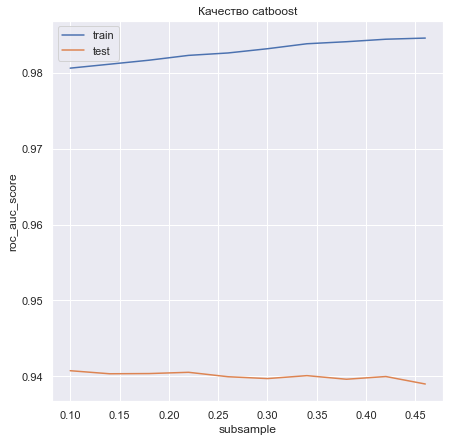

Наилучшее subsample=0.1


In [237]:
plot_catboost('subsample', np.arange(0.1, 0.5, 0.04))

Learning rate set to 0.065101
0:	learn: 0.9292868	total: 1.38ms	remaining: 1.38s
1:	learn: 0.9070539	total: 2.57ms	remaining: 1.28s
2:	learn: 0.8868808	total: 3.41ms	remaining: 1.13s
3:	learn: 0.8689061	total: 4.47ms	remaining: 1.11s
4:	learn: 0.8528859	total: 5.88ms	remaining: 1.17s
5:	learn: 0.8384442	total: 7.72ms	remaining: 1.28s
6:	learn: 0.8256661	total: 9.05ms	remaining: 1.28s
7:	learn: 0.8137872	total: 10ms	remaining: 1.25s
8:	learn: 0.8034732	total: 12.1ms	remaining: 1.33s
9:	learn: 0.7938385	total: 14.2ms	remaining: 1.41s
10:	learn: 0.7854063	total: 16.2ms	remaining: 1.46s
11:	learn: 0.7771485	total: 17.8ms	remaining: 1.46s
12:	learn: 0.7699093	total: 19.9ms	remaining: 1.51s
13:	learn: 0.7634957	total: 22.6ms	remaining: 1.59s
14:	learn: 0.7575813	total: 24.5ms	remaining: 1.6s
15:	learn: 0.7511369	total: 25.4ms	remaining: 1.56s
16:	learn: 0.7453926	total: 26.7ms	remaining: 1.54s
17:	learn: 0.7402267	total: 28.5ms	remaining: 1.55s
18:	learn: 0.7348766	total: 29.4ms	remaining: 1

176:	learn: 0.6156482	total: 341ms	remaining: 1.58s
177:	learn: 0.6155225	total: 344ms	remaining: 1.59s
178:	learn: 0.6154113	total: 346ms	remaining: 1.59s
179:	learn: 0.6153031	total: 349ms	remaining: 1.59s
180:	learn: 0.6151858	total: 351ms	remaining: 1.59s
181:	learn: 0.6150802	total: 353ms	remaining: 1.58s
182:	learn: 0.6149788	total: 356ms	remaining: 1.59s
183:	learn: 0.6148844	total: 358ms	remaining: 1.59s
184:	learn: 0.6147729	total: 360ms	remaining: 1.59s
185:	learn: 0.6146640	total: 365ms	remaining: 1.6s
186:	learn: 0.6145522	total: 369ms	remaining: 1.6s
187:	learn: 0.6144564	total: 371ms	remaining: 1.6s
188:	learn: 0.6143562	total: 373ms	remaining: 1.6s
189:	learn: 0.6142664	total: 375ms	remaining: 1.6s
190:	learn: 0.6141610	total: 376ms	remaining: 1.59s
191:	learn: 0.6140547	total: 378ms	remaining: 1.59s
192:	learn: 0.6139521	total: 379ms	remaining: 1.58s
193:	learn: 0.6138428	total: 381ms	remaining: 1.58s
194:	learn: 0.6137526	total: 384ms	remaining: 1.58s
195:	learn: 0.613

339:	learn: 0.6048867	total: 691ms	remaining: 1.34s
340:	learn: 0.6048443	total: 694ms	remaining: 1.34s
341:	learn: 0.6048051	total: 696ms	remaining: 1.34s
342:	learn: 0.6047626	total: 698ms	remaining: 1.34s
343:	learn: 0.6047240	total: 701ms	remaining: 1.34s
344:	learn: 0.6046808	total: 703ms	remaining: 1.33s
345:	learn: 0.6046415	total: 705ms	remaining: 1.33s
346:	learn: 0.6045997	total: 709ms	remaining: 1.33s
347:	learn: 0.6045603	total: 712ms	remaining: 1.33s
348:	learn: 0.6045226	total: 713ms	remaining: 1.33s
349:	learn: 0.6044811	total: 715ms	remaining: 1.33s
350:	learn: 0.6044411	total: 717ms	remaining: 1.32s
351:	learn: 0.6043997	total: 718ms	remaining: 1.32s
352:	learn: 0.6043610	total: 720ms	remaining: 1.32s
353:	learn: 0.6043236	total: 722ms	remaining: 1.32s
354:	learn: 0.6042898	total: 735ms	remaining: 1.33s
355:	learn: 0.6042514	total: 737ms	remaining: 1.33s
356:	learn: 0.6042121	total: 741ms	remaining: 1.33s
357:	learn: 0.6041747	total: 752ms	remaining: 1.35s
358:	learn: 

508:	learn: 0.5997125	total: 1.31s	remaining: 1.26s
509:	learn: 0.5996893	total: 1.31s	remaining: 1.26s
510:	learn: 0.5996682	total: 1.32s	remaining: 1.26s
511:	learn: 0.5996461	total: 1.32s	remaining: 1.26s
512:	learn: 0.5996232	total: 1.32s	remaining: 1.25s
513:	learn: 0.5996012	total: 1.32s	remaining: 1.25s
514:	learn: 0.5995781	total: 1.33s	remaining: 1.25s
515:	learn: 0.5995559	total: 1.33s	remaining: 1.25s
516:	learn: 0.5995375	total: 1.33s	remaining: 1.25s
517:	learn: 0.5995160	total: 1.33s	remaining: 1.24s
518:	learn: 0.5994928	total: 1.34s	remaining: 1.24s
519:	learn: 0.5994687	total: 1.34s	remaining: 1.24s
520:	learn: 0.5994446	total: 1.34s	remaining: 1.23s
521:	learn: 0.5994218	total: 1.35s	remaining: 1.23s
522:	learn: 0.5994003	total: 1.35s	remaining: 1.23s
523:	learn: 0.5993781	total: 1.35s	remaining: 1.23s
524:	learn: 0.5993561	total: 1.35s	remaining: 1.22s
525:	learn: 0.5993330	total: 1.36s	remaining: 1.22s
526:	learn: 0.5993116	total: 1.36s	remaining: 1.22s
527:	learn: 

675:	learn: 0.5966616	total: 1.73s	remaining: 829ms
676:	learn: 0.5966456	total: 1.73s	remaining: 828ms
677:	learn: 0.5966290	total: 1.74s	remaining: 825ms
678:	learn: 0.5966202	total: 1.74s	remaining: 822ms
679:	learn: 0.5966059	total: 1.74s	remaining: 820ms
680:	learn: 0.5965925	total: 1.74s	remaining: 817ms
681:	learn: 0.5965791	total: 1.75s	remaining: 818ms
682:	learn: 0.5965626	total: 1.76s	remaining: 815ms
683:	learn: 0.5965481	total: 1.76s	remaining: 816ms
684:	learn: 0.5965336	total: 1.77s	remaining: 813ms
685:	learn: 0.5965170	total: 1.77s	remaining: 810ms
686:	learn: 0.5965004	total: 1.77s	remaining: 807ms
687:	learn: 0.5964862	total: 1.77s	remaining: 804ms
688:	learn: 0.5964715	total: 1.78s	remaining: 803ms
689:	learn: 0.5964557	total: 1.78s	remaining: 800ms
690:	learn: 0.5964392	total: 1.78s	remaining: 797ms
691:	learn: 0.5964228	total: 1.78s	remaining: 794ms
692:	learn: 0.5964070	total: 1.78s	remaining: 791ms
693:	learn: 0.5963929	total: 1.79s	remaining: 788ms
694:	learn: 

888:	learn: 0.5939358	total: 2.19s	remaining: 274ms
889:	learn: 0.5939250	total: 2.19s	remaining: 271ms
890:	learn: 0.5939159	total: 2.2s	remaining: 269ms
891:	learn: 0.5939048	total: 2.2s	remaining: 267ms
892:	learn: 0.5938952	total: 2.21s	remaining: 265ms
893:	learn: 0.5938834	total: 2.21s	remaining: 262ms
894:	learn: 0.5938721	total: 2.21s	remaining: 260ms
895:	learn: 0.5938613	total: 2.21s	remaining: 257ms
896:	learn: 0.5938529	total: 2.22s	remaining: 255ms
897:	learn: 0.5938424	total: 2.22s	remaining: 253ms
898:	learn: 0.5938338	total: 2.23s	remaining: 250ms
899:	learn: 0.5938233	total: 2.23s	remaining: 248ms
900:	learn: 0.5938126	total: 2.24s	remaining: 246ms
901:	learn: 0.5938015	total: 2.24s	remaining: 244ms
902:	learn: 0.5937912	total: 2.24s	remaining: 241ms
903:	learn: 0.5937814	total: 2.25s	remaining: 239ms
904:	learn: 0.5937700	total: 2.25s	remaining: 236ms
905:	learn: 0.5937602	total: 2.25s	remaining: 234ms
906:	learn: 0.5937487	total: 2.25s	remaining: 231ms
907:	learn: 0.

76:	learn: 0.5948072	total: 203ms	remaining: 2.44s
77:	learn: 0.5944157	total: 207ms	remaining: 2.44s
78:	learn: 0.5938587	total: 208ms	remaining: 2.43s
79:	learn: 0.5933737	total: 211ms	remaining: 2.42s
80:	learn: 0.5930075	total: 213ms	remaining: 2.42s
81:	learn: 0.5927682	total: 215ms	remaining: 2.41s
82:	learn: 0.5924819	total: 218ms	remaining: 2.41s
83:	learn: 0.5920452	total: 221ms	remaining: 2.41s
84:	learn: 0.5917756	total: 226ms	remaining: 2.44s
85:	learn: 0.5913612	total: 237ms	remaining: 2.52s
86:	learn: 0.5911227	total: 239ms	remaining: 2.5s
87:	learn: 0.5908313	total: 240ms	remaining: 2.49s
88:	learn: 0.5904591	total: 242ms	remaining: 2.47s
89:	learn: 0.5901742	total: 243ms	remaining: 2.46s
90:	learn: 0.5897769	total: 245ms	remaining: 2.45s
91:	learn: 0.5894732	total: 247ms	remaining: 2.43s
92:	learn: 0.5892599	total: 248ms	remaining: 2.42s
93:	learn: 0.5886863	total: 250ms	remaining: 2.41s
94:	learn: 0.5884051	total: 257ms	remaining: 2.45s
95:	learn: 0.5880474	total: 260m

248:	learn: 0.5645652	total: 605ms	remaining: 1.82s
249:	learn: 0.5644912	total: 606ms	remaining: 1.82s
250:	learn: 0.5644123	total: 609ms	remaining: 1.82s
251:	learn: 0.5643577	total: 612ms	remaining: 1.82s
252:	learn: 0.5642872	total: 615ms	remaining: 1.81s
253:	learn: 0.5642126	total: 616ms	remaining: 1.81s
254:	learn: 0.5641054	total: 618ms	remaining: 1.8s
255:	learn: 0.5640401	total: 621ms	remaining: 1.8s
256:	learn: 0.5639721	total: 627ms	remaining: 1.81s
257:	learn: 0.5638953	total: 630ms	remaining: 1.81s
258:	learn: 0.5638310	total: 632ms	remaining: 1.81s
259:	learn: 0.5637652	total: 634ms	remaining: 1.8s
260:	learn: 0.5637089	total: 637ms	remaining: 1.8s
261:	learn: 0.5636002	total: 639ms	remaining: 1.8s
262:	learn: 0.5635417	total: 641ms	remaining: 1.79s
263:	learn: 0.5634547	total: 642ms	remaining: 1.79s
264:	learn: 0.5633855	total: 643ms	remaining: 1.78s
265:	learn: 0.5633293	total: 645ms	remaining: 1.78s
266:	learn: 0.5632586	total: 647ms	remaining: 1.78s
267:	learn: 0.563

430:	learn: 0.5518800	total: 953ms	remaining: 1.26s
431:	learn: 0.5518522	total: 955ms	remaining: 1.25s
432:	learn: 0.5518090	total: 957ms	remaining: 1.25s
433:	learn: 0.5517261	total: 958ms	remaining: 1.25s
434:	learn: 0.5516958	total: 962ms	remaining: 1.25s
435:	learn: 0.5516577	total: 963ms	remaining: 1.25s
436:	learn: 0.5516223	total: 966ms	remaining: 1.24s
437:	learn: 0.5514332	total: 968ms	remaining: 1.24s
438:	learn: 0.5513963	total: 971ms	remaining: 1.24s
439:	learn: 0.5513542	total: 973ms	remaining: 1.24s
440:	learn: 0.5512760	total: 976ms	remaining: 1.24s
441:	learn: 0.5512419	total: 979ms	remaining: 1.24s
442:	learn: 0.5512067	total: 981ms	remaining: 1.23s
443:	learn: 0.5511738	total: 982ms	remaining: 1.23s
444:	learn: 0.5511418	total: 983ms	remaining: 1.23s
445:	learn: 0.5511104	total: 985ms	remaining: 1.22s
446:	learn: 0.5510753	total: 986ms	remaining: 1.22s
447:	learn: 0.5508749	total: 987ms	remaining: 1.22s
448:	learn: 0.5508299	total: 988ms	remaining: 1.21s
449:	learn: 

608:	learn: 0.5431502	total: 1.3s	remaining: 836ms
609:	learn: 0.5431178	total: 1.3s	remaining: 834ms
610:	learn: 0.5430960	total: 1.3s	remaining: 831ms
611:	learn: 0.5430555	total: 1.31s	remaining: 830ms
612:	learn: 0.5430364	total: 1.31s	remaining: 828ms
613:	learn: 0.5430009	total: 1.31s	remaining: 826ms
614:	learn: 0.5429816	total: 1.32s	remaining: 824ms
615:	learn: 0.5429277	total: 1.32s	remaining: 823ms
616:	learn: 0.5429083	total: 1.32s	remaining: 821ms
617:	learn: 0.5428392	total: 1.32s	remaining: 819ms
618:	learn: 0.5428184	total: 1.33s	remaining: 817ms
619:	learn: 0.5427816	total: 1.33s	remaining: 814ms
620:	learn: 0.5426973	total: 1.33s	remaining: 811ms
621:	learn: 0.5426770	total: 1.33s	remaining: 809ms
622:	learn: 0.5426475	total: 1.33s	remaining: 806ms
623:	learn: 0.5426011	total: 1.33s	remaining: 803ms
624:	learn: 0.5425810	total: 1.33s	remaining: 800ms
625:	learn: 0.5425512	total: 1.33s	remaining: 798ms
626:	learn: 0.5425280	total: 1.34s	remaining: 796ms
627:	learn: 0.5

796:	learn: 0.5372234	total: 1.6s	remaining: 409ms
797:	learn: 0.5370771	total: 1.61s	remaining: 407ms
798:	learn: 0.5370626	total: 1.61s	remaining: 405ms
799:	learn: 0.5370430	total: 1.61s	remaining: 403ms
800:	learn: 0.5370113	total: 1.61s	remaining: 400ms
801:	learn: 0.5369724	total: 1.61s	remaining: 399ms
802:	learn: 0.5369605	total: 1.62s	remaining: 397ms
803:	learn: 0.5369449	total: 1.62s	remaining: 395ms
804:	learn: 0.5369308	total: 1.62s	remaining: 393ms
805:	learn: 0.5369227	total: 1.62s	remaining: 391ms
806:	learn: 0.5368860	total: 1.63s	remaining: 389ms
807:	learn: 0.5368663	total: 1.63s	remaining: 387ms
808:	learn: 0.5367983	total: 1.63s	remaining: 385ms
809:	learn: 0.5367821	total: 1.63s	remaining: 382ms
810:	learn: 0.5367683	total: 1.63s	remaining: 380ms
811:	learn: 0.5367489	total: 1.63s	remaining: 378ms
812:	learn: 0.5367298	total: 1.63s	remaining: 376ms
813:	learn: 0.5366917	total: 1.64s	remaining: 374ms
814:	learn: 0.5366762	total: 1.64s	remaining: 371ms
815:	learn: 0

989:	learn: 0.5322120	total: 1.96s	remaining: 19.8ms
990:	learn: 0.5322033	total: 1.96s	remaining: 17.8ms
991:	learn: 0.5321422	total: 1.96s	remaining: 15.8ms
992:	learn: 0.5321104	total: 1.97s	remaining: 13.9ms
993:	learn: 0.5320974	total: 1.98s	remaining: 11.9ms
994:	learn: 0.5320880	total: 1.98s	remaining: 9.97ms
995:	learn: 0.5320772	total: 1.99s	remaining: 7.98ms
996:	learn: 0.5320668	total: 1.99s	remaining: 5.98ms
997:	learn: 0.5320567	total: 1.99s	remaining: 3.99ms
998:	learn: 0.5320439	total: 1.99s	remaining: 1.99ms
999:	learn: 0.5320276	total: 1.99s	remaining: 0us
Learning rate set to 0.065101
0:	learn: 0.9229029	total: 1.84ms	remaining: 1.84s
1:	learn: 0.8945264	total: 4.25ms	remaining: 2.12s
2:	learn: 0.8689594	total: 10.5ms	remaining: 3.49s
3:	learn: 0.8456148	total: 12.8ms	remaining: 3.19s
4:	learn: 0.8248075	total: 15ms	remaining: 2.99s
5:	learn: 0.8061716	total: 17.2ms	remaining: 2.85s
6:	learn: 0.7886453	total: 20.9ms	remaining: 2.96s
7:	learn: 0.7725329	total: 23.9ms	r

152:	learn: 0.5530624	total: 343ms	remaining: 1.9s
153:	learn: 0.5528111	total: 345ms	remaining: 1.89s
154:	learn: 0.5525286	total: 347ms	remaining: 1.89s
155:	learn: 0.5523422	total: 349ms	remaining: 1.89s
156:	learn: 0.5521932	total: 351ms	remaining: 1.88s
157:	learn: 0.5519372	total: 353ms	remaining: 1.88s
158:	learn: 0.5517796	total: 356ms	remaining: 1.88s
159:	learn: 0.5516539	total: 358ms	remaining: 1.88s
160:	learn: 0.5514596	total: 360ms	remaining: 1.87s
161:	learn: 0.5513340	total: 362ms	remaining: 1.87s
162:	learn: 0.5512189	total: 363ms	remaining: 1.86s
163:	learn: 0.5509835	total: 365ms	remaining: 1.86s
164:	learn: 0.5507547	total: 366ms	remaining: 1.85s
165:	learn: 0.5506616	total: 367ms	remaining: 1.84s
166:	learn: 0.5504831	total: 370ms	remaining: 1.84s
167:	learn: 0.5503916	total: 373ms	remaining: 1.85s
168:	learn: 0.5501668	total: 376ms	remaining: 1.85s
169:	learn: 0.5499408	total: 378ms	remaining: 1.84s
170:	learn: 0.5497531	total: 380ms	remaining: 1.84s
171:	learn: 0

312:	learn: 0.5310956	total: 592ms	remaining: 1.3s
313:	learn: 0.5310327	total: 594ms	remaining: 1.3s
314:	learn: 0.5309627	total: 597ms	remaining: 1.3s
315:	learn: 0.5308571	total: 599ms	remaining: 1.3s
316:	learn: 0.5307741	total: 602ms	remaining: 1.3s
317:	learn: 0.5307029	total: 605ms	remaining: 1.3s
318:	learn: 0.5306543	total: 607ms	remaining: 1.29s
319:	learn: 0.5305733	total: 609ms	remaining: 1.29s
320:	learn: 0.5304342	total: 611ms	remaining: 1.29s
321:	learn: 0.5303530	total: 613ms	remaining: 1.29s
322:	learn: 0.5302774	total: 614ms	remaining: 1.29s
323:	learn: 0.5301996	total: 619ms	remaining: 1.29s
324:	learn: 0.5301132	total: 620ms	remaining: 1.29s
325:	learn: 0.5300538	total: 622ms	remaining: 1.28s
326:	learn: 0.5299635	total: 623ms	remaining: 1.28s
327:	learn: 0.5298275	total: 624ms	remaining: 1.28s
328:	learn: 0.5297313	total: 625ms	remaining: 1.27s
329:	learn: 0.5296464	total: 627ms	remaining: 1.27s
330:	learn: 0.5295266	total: 628ms	remaining: 1.27s
331:	learn: 0.5294

480:	learn: 0.5185997	total: 879ms	remaining: 948ms
481:	learn: 0.5185388	total: 880ms	remaining: 946ms
482:	learn: 0.5184453	total: 883ms	remaining: 945ms
483:	learn: 0.5183931	total: 885ms	remaining: 943ms
484:	learn: 0.5183404	total: 886ms	remaining: 941ms
485:	learn: 0.5183087	total: 888ms	remaining: 939ms
486:	learn: 0.5182619	total: 890ms	remaining: 938ms
487:	learn: 0.5182040	total: 893ms	remaining: 937ms
488:	learn: 0.5181587	total: 895ms	remaining: 935ms
489:	learn: 0.5181320	total: 896ms	remaining: 933ms
490:	learn: 0.5181080	total: 900ms	remaining: 933ms
491:	learn: 0.5180369	total: 902ms	remaining: 931ms
492:	learn: 0.5179717	total: 904ms	remaining: 930ms
493:	learn: 0.5179063	total: 907ms	remaining: 929ms
494:	learn: 0.5178442	total: 910ms	remaining: 929ms
495:	learn: 0.5177961	total: 912ms	remaining: 927ms
496:	learn: 0.5177423	total: 914ms	remaining: 925ms
497:	learn: 0.5176870	total: 916ms	remaining: 923ms
498:	learn: 0.5176355	total: 917ms	remaining: 921ms
499:	learn: 

687:	learn: 0.5095931	total: 1.24s	remaining: 562ms
688:	learn: 0.5095721	total: 1.24s	remaining: 560ms
689:	learn: 0.5095157	total: 1.24s	remaining: 558ms
690:	learn: 0.5094840	total: 1.24s	remaining: 557ms
691:	learn: 0.5094492	total: 1.25s	remaining: 555ms
692:	learn: 0.5094430	total: 1.25s	remaining: 553ms
693:	learn: 0.5094178	total: 1.25s	remaining: 551ms
694:	learn: 0.5093882	total: 1.25s	remaining: 549ms
695:	learn: 0.5093625	total: 1.25s	remaining: 547ms
696:	learn: 0.5093463	total: 1.25s	remaining: 546ms
697:	learn: 0.5093140	total: 1.26s	remaining: 544ms
698:	learn: 0.5092554	total: 1.26s	remaining: 542ms
699:	learn: 0.5092180	total: 1.26s	remaining: 541ms
700:	learn: 0.5091877	total: 1.26s	remaining: 539ms
701:	learn: 0.5091464	total: 1.27s	remaining: 537ms
702:	learn: 0.5091156	total: 1.27s	remaining: 536ms
703:	learn: 0.5090427	total: 1.27s	remaining: 534ms
704:	learn: 0.5089988	total: 1.27s	remaining: 532ms
705:	learn: 0.5089649	total: 1.27s	remaining: 531ms
706:	learn: 

849:	learn: 0.5043788	total: 1.49s	remaining: 263ms
850:	learn: 0.5043418	total: 1.49s	remaining: 262ms
851:	learn: 0.5043107	total: 1.5s	remaining: 260ms
852:	learn: 0.5042823	total: 1.5s	remaining: 258ms
853:	learn: 0.5042603	total: 1.5s	remaining: 256ms
854:	learn: 0.5042265	total: 1.5s	remaining: 254ms
855:	learn: 0.5041924	total: 1.5s	remaining: 253ms
856:	learn: 0.5041632	total: 1.5s	remaining: 251ms
857:	learn: 0.5041351	total: 1.51s	remaining: 249ms
858:	learn: 0.5041000	total: 1.51s	remaining: 248ms
859:	learn: 0.5040718	total: 1.51s	remaining: 246ms
860:	learn: 0.5040256	total: 1.51s	remaining: 244ms
861:	learn: 0.5040016	total: 1.51s	remaining: 242ms
862:	learn: 0.5039792	total: 1.51s	remaining: 240ms
863:	learn: 0.5039507	total: 1.51s	remaining: 239ms
864:	learn: 0.5039312	total: 1.52s	remaining: 237ms
865:	learn: 0.5039049	total: 1.52s	remaining: 235ms
866:	learn: 0.5038969	total: 1.52s	remaining: 233ms
867:	learn: 0.5038634	total: 1.52s	remaining: 231ms
868:	learn: 0.5038

45:	learn: 0.5764438	total: 83.7ms	remaining: 1.74s
46:	learn: 0.5754299	total: 86ms	remaining: 1.74s
47:	learn: 0.5743461	total: 87.9ms	remaining: 1.74s
48:	learn: 0.5734023	total: 89.7ms	remaining: 1.74s
49:	learn: 0.5724859	total: 91.8ms	remaining: 1.74s
50:	learn: 0.5714278	total: 93.6ms	remaining: 1.74s
51:	learn: 0.5708239	total: 95.6ms	remaining: 1.74s
52:	learn: 0.5701283	total: 97.5ms	remaining: 1.74s
53:	learn: 0.5694652	total: 99.7ms	remaining: 1.75s
54:	learn: 0.5687600	total: 103ms	remaining: 1.76s
55:	learn: 0.5680645	total: 104ms	remaining: 1.76s
56:	learn: 0.5674983	total: 107ms	remaining: 1.77s
57:	learn: 0.5669878	total: 108ms	remaining: 1.76s
58:	learn: 0.5665166	total: 110ms	remaining: 1.75s
59:	learn: 0.5660068	total: 111ms	remaining: 1.74s
60:	learn: 0.5654641	total: 113ms	remaining: 1.73s
61:	learn: 0.5649140	total: 115ms	remaining: 1.74s
62:	learn: 0.5645181	total: 118ms	remaining: 1.76s
63:	learn: 0.5640498	total: 120ms	remaining: 1.75s
64:	learn: 0.5633390	tot

213:	learn: 0.5263047	total: 368ms	remaining: 1.35s
214:	learn: 0.5261960	total: 370ms	remaining: 1.35s
215:	learn: 0.5260553	total: 372ms	remaining: 1.35s
216:	learn: 0.5258802	total: 374ms	remaining: 1.35s
217:	learn: 0.5257225	total: 376ms	remaining: 1.35s
218:	learn: 0.5255624	total: 378ms	remaining: 1.35s
219:	learn: 0.5254678	total: 380ms	remaining: 1.35s
220:	learn: 0.5253030	total: 383ms	remaining: 1.35s
221:	learn: 0.5250849	total: 386ms	remaining: 1.35s
222:	learn: 0.5249141	total: 389ms	remaining: 1.36s
223:	learn: 0.5247579	total: 391ms	remaining: 1.35s
224:	learn: 0.5246154	total: 393ms	remaining: 1.35s
225:	learn: 0.5245435	total: 395ms	remaining: 1.35s
226:	learn: 0.5244425	total: 396ms	remaining: 1.35s
227:	learn: 0.5243373	total: 398ms	remaining: 1.35s
228:	learn: 0.5242131	total: 401ms	remaining: 1.35s
229:	learn: 0.5240020	total: 403ms	remaining: 1.35s
230:	learn: 0.5237253	total: 405ms	remaining: 1.35s
231:	learn: 0.5235846	total: 407ms	remaining: 1.34s
232:	learn: 

425:	learn: 0.5036951	total: 731ms	remaining: 985ms
426:	learn: 0.5035953	total: 733ms	remaining: 984ms
427:	learn: 0.5035226	total: 735ms	remaining: 983ms
428:	learn: 0.5034716	total: 737ms	remaining: 981ms
429:	learn: 0.5033999	total: 739ms	remaining: 980ms
430:	learn: 0.5033391	total: 742ms	remaining: 979ms
431:	learn: 0.5032961	total: 744ms	remaining: 979ms
432:	learn: 0.5032529	total: 747ms	remaining: 978ms
433:	learn: 0.5031777	total: 750ms	remaining: 978ms
434:	learn: 0.5031215	total: 753ms	remaining: 977ms
435:	learn: 0.5030229	total: 755ms	remaining: 977ms
436:	learn: 0.5029586	total: 757ms	remaining: 975ms
437:	learn: 0.5028398	total: 758ms	remaining: 973ms
438:	learn: 0.5027911	total: 760ms	remaining: 971ms
439:	learn: 0.5026785	total: 761ms	remaining: 969ms
440:	learn: 0.5026221	total: 764ms	remaining: 969ms
441:	learn: 0.5025626	total: 766ms	remaining: 967ms
442:	learn: 0.5024690	total: 767ms	remaining: 965ms
443:	learn: 0.5024391	total: 769ms	remaining: 963ms
444:	learn: 

635:	learn: 0.4918231	total: 1.09s	remaining: 624ms
636:	learn: 0.4917636	total: 1.09s	remaining: 623ms
637:	learn: 0.4917453	total: 1.09s	remaining: 621ms
638:	learn: 0.4917171	total: 1.1s	remaining: 620ms
639:	learn: 0.4916542	total: 1.1s	remaining: 619ms
640:	learn: 0.4916370	total: 1.1s	remaining: 617ms
641:	learn: 0.4916017	total: 1.1s	remaining: 616ms
642:	learn: 0.4915710	total: 1.1s	remaining: 614ms
643:	learn: 0.4915155	total: 1.11s	remaining: 613ms
644:	learn: 0.4914761	total: 1.11s	remaining: 611ms
645:	learn: 0.4914276	total: 1.11s	remaining: 610ms
646:	learn: 0.4913605	total: 1.11s	remaining: 608ms
647:	learn: 0.4913358	total: 1.12s	remaining: 606ms
648:	learn: 0.4912912	total: 1.12s	remaining: 605ms
649:	learn: 0.4912612	total: 1.12s	remaining: 603ms
650:	learn: 0.4911854	total: 1.12s	remaining: 601ms
651:	learn: 0.4911492	total: 1.12s	remaining: 599ms
652:	learn: 0.4911145	total: 1.12s	remaining: 598ms
653:	learn: 0.4910945	total: 1.13s	remaining: 596ms
654:	learn: 0.491

799:	learn: 0.4852136	total: 1.35s	remaining: 337ms
800:	learn: 0.4851589	total: 1.35s	remaining: 336ms
801:	learn: 0.4851440	total: 1.35s	remaining: 334ms
802:	learn: 0.4851365	total: 1.35s	remaining: 332ms
803:	learn: 0.4851036	total: 1.36s	remaining: 331ms
804:	learn: 0.4850587	total: 1.36s	remaining: 329ms
805:	learn: 0.4850328	total: 1.36s	remaining: 328ms
806:	learn: 0.4849616	total: 1.36s	remaining: 326ms
807:	learn: 0.4849240	total: 1.36s	remaining: 324ms
808:	learn: 0.4848973	total: 1.37s	remaining: 323ms
809:	learn: 0.4848366	total: 1.37s	remaining: 321ms
810:	learn: 0.4848187	total: 1.37s	remaining: 319ms
811:	learn: 0.4847704	total: 1.37s	remaining: 318ms
812:	learn: 0.4847454	total: 1.37s	remaining: 316ms
813:	learn: 0.4847090	total: 1.38s	remaining: 314ms
814:	learn: 0.4846387	total: 1.38s	remaining: 312ms
815:	learn: 0.4845897	total: 1.38s	remaining: 311ms
816:	learn: 0.4845782	total: 1.38s	remaining: 309ms
817:	learn: 0.4845587	total: 1.38s	remaining: 307ms
818:	learn: 

983:	learn: 0.4788239	total: 1.63s	remaining: 26.6ms
984:	learn: 0.4788097	total: 1.64s	remaining: 24.9ms
985:	learn: 0.4787895	total: 1.64s	remaining: 23.3ms
986:	learn: 0.4787624	total: 1.64s	remaining: 21.6ms
987:	learn: 0.4786903	total: 1.64s	remaining: 19.9ms
988:	learn: 0.4786688	total: 1.64s	remaining: 18.3ms
989:	learn: 0.4786452	total: 1.65s	remaining: 16.6ms
990:	learn: 0.4785882	total: 1.65s	remaining: 15ms
991:	learn: 0.4785612	total: 1.65s	remaining: 13.3ms
992:	learn: 0.4785204	total: 1.65s	remaining: 11.6ms
993:	learn: 0.4785069	total: 1.65s	remaining: 9.98ms
994:	learn: 0.4784878	total: 1.66s	remaining: 8.32ms
995:	learn: 0.4784752	total: 1.66s	remaining: 6.65ms
996:	learn: 0.4784332	total: 1.66s	remaining: 4.99ms
997:	learn: 0.4784086	total: 1.66s	remaining: 3.33ms
998:	learn: 0.4783679	total: 1.66s	remaining: 1.66ms
999:	learn: 0.4783449	total: 1.66s	remaining: 0us
Learning rate set to 0.065101
0:	learn: 0.9202495	total: 2.73ms	remaining: 2.73s
1:	learn: 0.8900407	tot

156:	learn: 0.5239175	total: 286ms	remaining: 1.53s
157:	learn: 0.5236577	total: 288ms	remaining: 1.54s
158:	learn: 0.5233932	total: 291ms	remaining: 1.54s
159:	learn: 0.5230751	total: 293ms	remaining: 1.54s
160:	learn: 0.5227942	total: 296ms	remaining: 1.54s
161:	learn: 0.5225390	total: 298ms	remaining: 1.54s
162:	learn: 0.5223267	total: 300ms	remaining: 1.54s
163:	learn: 0.5221114	total: 302ms	remaining: 1.54s
164:	learn: 0.5218649	total: 305ms	remaining: 1.54s
165:	learn: 0.5216842	total: 307ms	remaining: 1.54s
166:	learn: 0.5214939	total: 309ms	remaining: 1.54s
167:	learn: 0.5213031	total: 311ms	remaining: 1.54s
168:	learn: 0.5211215	total: 312ms	remaining: 1.53s
169:	learn: 0.5209512	total: 314ms	remaining: 1.53s
170:	learn: 0.5207650	total: 315ms	remaining: 1.53s
171:	learn: 0.5205503	total: 317ms	remaining: 1.53s
172:	learn: 0.5204199	total: 319ms	remaining: 1.52s
173:	learn: 0.5202314	total: 320ms	remaining: 1.52s
174:	learn: 0.5200982	total: 322ms	remaining: 1.52s
175:	learn: 

360:	learn: 0.4938155	total: 653ms	remaining: 1.16s
361:	learn: 0.4937458	total: 656ms	remaining: 1.16s
362:	learn: 0.4936120	total: 658ms	remaining: 1.15s
363:	learn: 0.4935570	total: 660ms	remaining: 1.15s
364:	learn: 0.4934316	total: 662ms	remaining: 1.15s
365:	learn: 0.4933540	total: 665ms	remaining: 1.15s
366:	learn: 0.4932765	total: 667ms	remaining: 1.15s
367:	learn: 0.4931628	total: 670ms	remaining: 1.15s
368:	learn: 0.4930496	total: 672ms	remaining: 1.15s
369:	learn: 0.4929793	total: 676ms	remaining: 1.15s
370:	learn: 0.4928604	total: 678ms	remaining: 1.15s
371:	learn: 0.4927992	total: 679ms	remaining: 1.15s
372:	learn: 0.4927091	total: 681ms	remaining: 1.14s
373:	learn: 0.4926629	total: 682ms	remaining: 1.14s
374:	learn: 0.4925537	total: 684ms	remaining: 1.14s
375:	learn: 0.4924966	total: 686ms	remaining: 1.14s
376:	learn: 0.4924296	total: 687ms	remaining: 1.14s
377:	learn: 0.4923371	total: 689ms	remaining: 1.13s
378:	learn: 0.4922646	total: 691ms	remaining: 1.13s
379:	learn: 

560:	learn: 0.4795949	total: 1.02s	remaining: 799ms
561:	learn: 0.4795554	total: 1.02s	remaining: 798ms
562:	learn: 0.4795055	total: 1.03s	remaining: 798ms
563:	learn: 0.4794176	total: 1.03s	remaining: 797ms
564:	learn: 0.4793379	total: 1.03s	remaining: 797ms
565:	learn: 0.4793238	total: 1.04s	remaining: 797ms
566:	learn: 0.4792525	total: 1.04s	remaining: 796ms
567:	learn: 0.4792050	total: 1.04s	remaining: 795ms
568:	learn: 0.4791587	total: 1.05s	remaining: 793ms
569:	learn: 0.4791111	total: 1.05s	remaining: 791ms
570:	learn: 0.4790489	total: 1.05s	remaining: 790ms
571:	learn: 0.4789646	total: 1.05s	remaining: 788ms
572:	learn: 0.4789176	total: 1.05s	remaining: 786ms
573:	learn: 0.4788492	total: 1.06s	remaining: 786ms
574:	learn: 0.4788150	total: 1.06s	remaining: 784ms
575:	learn: 0.4787395	total: 1.06s	remaining: 783ms
576:	learn: 0.4787065	total: 1.06s	remaining: 781ms
577:	learn: 0.4786141	total: 1.07s	remaining: 779ms
578:	learn: 0.4785398	total: 1.07s	remaining: 778ms
579:	learn: 

749:	learn: 0.4700406	total: 1.46s	remaining: 488ms
750:	learn: 0.4700086	total: 1.47s	remaining: 487ms
751:	learn: 0.4699630	total: 1.47s	remaining: 486ms
752:	learn: 0.4698658	total: 1.48s	remaining: 487ms
753:	learn: 0.4698481	total: 1.49s	remaining: 486ms
754:	learn: 0.4697926	total: 1.49s	remaining: 484ms
755:	learn: 0.4697195	total: 1.49s	remaining: 482ms
756:	learn: 0.4696399	total: 1.5s	remaining: 480ms
757:	learn: 0.4695621	total: 1.5s	remaining: 479ms
758:	learn: 0.4694969	total: 1.5s	remaining: 477ms
759:	learn: 0.4694669	total: 1.5s	remaining: 475ms
760:	learn: 0.4694256	total: 1.51s	remaining: 474ms
761:	learn: 0.4693807	total: 1.51s	remaining: 471ms
762:	learn: 0.4692953	total: 1.51s	remaining: 469ms
763:	learn: 0.4692448	total: 1.51s	remaining: 467ms
764:	learn: 0.4692193	total: 1.51s	remaining: 465ms
765:	learn: 0.4691994	total: 1.52s	remaining: 463ms
766:	learn: 0.4691685	total: 1.52s	remaining: 462ms
767:	learn: 0.4691492	total: 1.52s	remaining: 460ms
768:	learn: 0.46

936:	learn: 0.4619131	total: 1.94s	remaining: 130ms
937:	learn: 0.4618814	total: 1.94s	remaining: 128ms
938:	learn: 0.4618669	total: 1.94s	remaining: 126ms
939:	learn: 0.4618172	total: 1.95s	remaining: 124ms
940:	learn: 0.4617579	total: 1.95s	remaining: 122ms
941:	learn: 0.4617310	total: 1.95s	remaining: 120ms
942:	learn: 0.4616824	total: 1.96s	remaining: 118ms
943:	learn: 0.4616443	total: 1.96s	remaining: 116ms
944:	learn: 0.4616182	total: 1.96s	remaining: 114ms
945:	learn: 0.4615478	total: 1.96s	remaining: 112ms
946:	learn: 0.4614892	total: 1.97s	remaining: 110ms
947:	learn: 0.4614506	total: 1.97s	remaining: 108ms
948:	learn: 0.4613577	total: 1.97s	remaining: 106ms
949:	learn: 0.4613153	total: 1.97s	remaining: 104ms
950:	learn: 0.4612738	total: 1.98s	remaining: 102ms
951:	learn: 0.4612462	total: 1.98s	remaining: 99.7ms
952:	learn: 0.4611900	total: 1.98s	remaining: 97.6ms
953:	learn: 0.4611523	total: 1.98s	remaining: 95.5ms
954:	learn: 0.4611007	total: 1.98s	remaining: 93.5ms
955:	lea

123:	learn: 0.5200799	total: 364ms	remaining: 2.57s
124:	learn: 0.5198276	total: 369ms	remaining: 2.58s
125:	learn: 0.5195527	total: 375ms	remaining: 2.6s
126:	learn: 0.5193966	total: 380ms	remaining: 2.61s
127:	learn: 0.5191578	total: 384ms	remaining: 2.62s
128:	learn: 0.5189696	total: 391ms	remaining: 2.64s
129:	learn: 0.5188085	total: 394ms	remaining: 2.63s
130:	learn: 0.5185893	total: 396ms	remaining: 2.63s
131:	learn: 0.5184181	total: 399ms	remaining: 2.62s
132:	learn: 0.5181082	total: 404ms	remaining: 2.63s
133:	learn: 0.5178946	total: 406ms	remaining: 2.63s
134:	learn: 0.5177811	total: 409ms	remaining: 2.62s
135:	learn: 0.5176421	total: 412ms	remaining: 2.62s
136:	learn: 0.5173669	total: 415ms	remaining: 2.61s
137:	learn: 0.5171328	total: 418ms	remaining: 2.61s
138:	learn: 0.5169157	total: 420ms	remaining: 2.6s
139:	learn: 0.5167163	total: 423ms	remaining: 2.6s
140:	learn: 0.5165827	total: 425ms	remaining: 2.59s
141:	learn: 0.5164244	total: 428ms	remaining: 2.58s
142:	learn: 0.5

315:	learn: 0.4866414	total: 916ms	remaining: 1.98s
316:	learn: 0.4865184	total: 919ms	remaining: 1.98s
317:	learn: 0.4863609	total: 922ms	remaining: 1.98s
318:	learn: 0.4862038	total: 925ms	remaining: 1.97s
319:	learn: 0.4860735	total: 928ms	remaining: 1.97s
320:	learn: 0.4859208	total: 931ms	remaining: 1.97s
321:	learn: 0.4858030	total: 934ms	remaining: 1.97s
322:	learn: 0.4856682	total: 937ms	remaining: 1.96s
323:	learn: 0.4855898	total: 940ms	remaining: 1.96s
324:	learn: 0.4855269	total: 941ms	remaining: 1.96s
325:	learn: 0.4854729	total: 943ms	remaining: 1.95s
326:	learn: 0.4852743	total: 946ms	remaining: 1.95s
327:	learn: 0.4851879	total: 947ms	remaining: 1.94s
328:	learn: 0.4851375	total: 949ms	remaining: 1.94s
329:	learn: 0.4850317	total: 952ms	remaining: 1.93s
330:	learn: 0.4848977	total: 955ms	remaining: 1.93s
331:	learn: 0.4848263	total: 957ms	remaining: 1.93s
332:	learn: 0.4846311	total: 959ms	remaining: 1.92s
333:	learn: 0.4845583	total: 961ms	remaining: 1.92s
334:	learn: 

488:	learn: 0.4710802	total: 1.29s	remaining: 1.34s
489:	learn: 0.4710334	total: 1.29s	remaining: 1.34s
490:	learn: 0.4709598	total: 1.29s	remaining: 1.34s
491:	learn: 0.4708426	total: 1.29s	remaining: 1.34s
492:	learn: 0.4707837	total: 1.3s	remaining: 1.33s
493:	learn: 0.4707314	total: 1.3s	remaining: 1.33s
494:	learn: 0.4706517	total: 1.3s	remaining: 1.33s
495:	learn: 0.4706053	total: 1.31s	remaining: 1.33s
496:	learn: 0.4705222	total: 1.31s	remaining: 1.33s
497:	learn: 0.4704573	total: 1.31s	remaining: 1.32s
498:	learn: 0.4704143	total: 1.31s	remaining: 1.32s
499:	learn: 0.4703257	total: 1.31s	remaining: 1.31s
500:	learn: 0.4702523	total: 1.32s	remaining: 1.31s
501:	learn: 0.4701557	total: 1.32s	remaining: 1.31s
502:	learn: 0.4700719	total: 1.32s	remaining: 1.31s
503:	learn: 0.4700185	total: 1.32s	remaining: 1.3s
504:	learn: 0.4699882	total: 1.33s	remaining: 1.3s
505:	learn: 0.4699332	total: 1.33s	remaining: 1.3s
506:	learn: 0.4698238	total: 1.33s	remaining: 1.29s
507:	learn: 0.4697

657:	learn: 0.4597496	total: 1.66s	remaining: 862ms
658:	learn: 0.4597206	total: 1.66s	remaining: 861ms
659:	learn: 0.4596770	total: 1.67s	remaining: 859ms
660:	learn: 0.4596043	total: 1.67s	remaining: 857ms
661:	learn: 0.4595642	total: 1.68s	remaining: 855ms
662:	learn: 0.4595318	total: 1.68s	remaining: 854ms
663:	learn: 0.4594911	total: 1.68s	remaining: 851ms
664:	learn: 0.4594310	total: 1.68s	remaining: 849ms
665:	learn: 0.4593473	total: 1.69s	remaining: 846ms
666:	learn: 0.4592892	total: 1.69s	remaining: 843ms
667:	learn: 0.4592654	total: 1.69s	remaining: 841ms
668:	learn: 0.4592090	total: 1.7s	remaining: 840ms
669:	learn: 0.4591737	total: 1.7s	remaining: 838ms
670:	learn: 0.4591066	total: 1.7s	remaining: 835ms
671:	learn: 0.4590693	total: 1.71s	remaining: 833ms
672:	learn: 0.4590311	total: 1.71s	remaining: 830ms
673:	learn: 0.4589053	total: 1.71s	remaining: 828ms
674:	learn: 0.4588769	total: 1.71s	remaining: 825ms
675:	learn: 0.4588370	total: 1.72s	remaining: 822ms
676:	learn: 0.4

818:	learn: 0.4509040	total: 2.03s	remaining: 449ms
819:	learn: 0.4508395	total: 2.03s	remaining: 447ms
820:	learn: 0.4507947	total: 2.04s	remaining: 444ms
821:	learn: 0.4507462	total: 2.04s	remaining: 442ms
822:	learn: 0.4506575	total: 2.04s	remaining: 439ms
823:	learn: 0.4505989	total: 2.04s	remaining: 437ms
824:	learn: 0.4505336	total: 2.05s	remaining: 435ms
825:	learn: 0.4504811	total: 2.05s	remaining: 432ms
826:	learn: 0.4504281	total: 2.05s	remaining: 430ms
827:	learn: 0.4503535	total: 2.06s	remaining: 427ms
828:	learn: 0.4502782	total: 2.06s	remaining: 424ms
829:	learn: 0.4502300	total: 2.06s	remaining: 422ms
830:	learn: 0.4501883	total: 2.06s	remaining: 419ms
831:	learn: 0.4501316	total: 2.06s	remaining: 417ms
832:	learn: 0.4501169	total: 2.07s	remaining: 414ms
833:	learn: 0.4500802	total: 2.07s	remaining: 412ms
834:	learn: 0.4500134	total: 2.07s	remaining: 409ms
835:	learn: 0.4499956	total: 2.07s	remaining: 407ms
836:	learn: 0.4499159	total: 2.08s	remaining: 404ms
837:	learn: 

991:	learn: 0.4427457	total: 2.4s	remaining: 19.4ms
992:	learn: 0.4426748	total: 2.41s	remaining: 17ms
993:	learn: 0.4426100	total: 2.41s	remaining: 14.5ms
994:	learn: 0.4425910	total: 2.41s	remaining: 12.1ms
995:	learn: 0.4425649	total: 2.41s	remaining: 9.7ms
996:	learn: 0.4424901	total: 2.42s	remaining: 7.27ms
997:	learn: 0.4424683	total: 2.42s	remaining: 4.85ms
998:	learn: 0.4424334	total: 2.42s	remaining: 2.42ms
999:	learn: 0.4423936	total: 2.42s	remaining: 0us
Learning rate set to 0.065101
0:	learn: 0.9192964	total: 4.21ms	remaining: 4.21s
1:	learn: 0.8881182	total: 7.38ms	remaining: 3.68s
2:	learn: 0.8594368	total: 10.6ms	remaining: 3.51s
3:	learn: 0.8322280	total: 15.6ms	remaining: 3.89s
4:	learn: 0.8076957	total: 18.4ms	remaining: 3.66s
5:	learn: 0.7860523	total: 20.8ms	remaining: 3.44s
6:	learn: 0.7649592	total: 23.2ms	remaining: 3.3s
7:	learn: 0.7455350	total: 25.9ms	remaining: 3.21s
8:	learn: 0.7287195	total: 28.5ms	remaining: 3.14s
9:	learn: 0.7130591	total: 31.6ms	remainin

182:	learn: 0.4979483	total: 489ms	remaining: 2.18s
183:	learn: 0.4976898	total: 493ms	remaining: 2.19s
184:	learn: 0.4973408	total: 496ms	remaining: 2.19s
185:	learn: 0.4972170	total: 499ms	remaining: 2.19s
186:	learn: 0.4969500	total: 503ms	remaining: 2.19s
187:	learn: 0.4966893	total: 507ms	remaining: 2.19s
188:	learn: 0.4965560	total: 510ms	remaining: 2.19s
189:	learn: 0.4962908	total: 514ms	remaining: 2.19s
190:	learn: 0.4960748	total: 516ms	remaining: 2.19s
191:	learn: 0.4958579	total: 518ms	remaining: 2.18s
192:	learn: 0.4956858	total: 522ms	remaining: 2.18s
193:	learn: 0.4954108	total: 526ms	remaining: 2.18s
194:	learn: 0.4951731	total: 528ms	remaining: 2.18s
195:	learn: 0.4948639	total: 531ms	remaining: 2.18s
196:	learn: 0.4945361	total: 533ms	remaining: 2.17s
197:	learn: 0.4942937	total: 535ms	remaining: 2.17s
198:	learn: 0.4940929	total: 538ms	remaining: 2.16s
199:	learn: 0.4938902	total: 540ms	remaining: 2.16s
200:	learn: 0.4936223	total: 543ms	remaining: 2.16s
201:	learn: 

352:	learn: 0.4712822	total: 945ms	remaining: 1.73s
353:	learn: 0.4711242	total: 949ms	remaining: 1.73s
354:	learn: 0.4709326	total: 952ms	remaining: 1.73s
355:	learn: 0.4707769	total: 956ms	remaining: 1.73s
356:	learn: 0.4706525	total: 959ms	remaining: 1.73s
357:	learn: 0.4705750	total: 962ms	remaining: 1.73s
358:	learn: 0.4703835	total: 966ms	remaining: 1.73s
359:	learn: 0.4702081	total: 969ms	remaining: 1.72s
360:	learn: 0.4701518	total: 972ms	remaining: 1.72s
361:	learn: 0.4700840	total: 976ms	remaining: 1.72s
362:	learn: 0.4699359	total: 983ms	remaining: 1.72s
363:	learn: 0.4698092	total: 989ms	remaining: 1.73s
364:	learn: 0.4697200	total: 992ms	remaining: 1.73s
365:	learn: 0.4696190	total: 995ms	remaining: 1.72s
366:	learn: 0.4694705	total: 997ms	remaining: 1.72s
367:	learn: 0.4693073	total: 1000ms	remaining: 1.72s
368:	learn: 0.4692434	total: 1s	remaining: 1.71s
369:	learn: 0.4691865	total: 1s	remaining: 1.71s
370:	learn: 0.4690810	total: 1.01s	remaining: 1.71s
371:	learn: 0.468

514:	learn: 0.4562289	total: 1.43s	remaining: 1.35s
515:	learn: 0.4561493	total: 1.44s	remaining: 1.35s
516:	learn: 0.4560410	total: 1.44s	remaining: 1.34s
517:	learn: 0.4559304	total: 1.44s	remaining: 1.34s
518:	learn: 0.4558482	total: 1.45s	remaining: 1.34s
519:	learn: 0.4557824	total: 1.45s	remaining: 1.34s
520:	learn: 0.4557185	total: 1.45s	remaining: 1.34s
521:	learn: 0.4555493	total: 1.46s	remaining: 1.33s
522:	learn: 0.4554464	total: 1.46s	remaining: 1.33s
523:	learn: 0.4554132	total: 1.46s	remaining: 1.33s
524:	learn: 0.4553152	total: 1.46s	remaining: 1.32s
525:	learn: 0.4552613	total: 1.47s	remaining: 1.32s
526:	learn: 0.4551823	total: 1.47s	remaining: 1.32s
527:	learn: 0.4551255	total: 1.47s	remaining: 1.32s
528:	learn: 0.4550974	total: 1.48s	remaining: 1.31s
529:	learn: 0.4550340	total: 1.48s	remaining: 1.31s
530:	learn: 0.4549657	total: 1.48s	remaining: 1.31s
531:	learn: 0.4548775	total: 1.48s	remaining: 1.3s
532:	learn: 0.4548479	total: 1.49s	remaining: 1.3s
533:	learn: 0.

676:	learn: 0.4440561	total: 1.89s	remaining: 901ms
677:	learn: 0.4439924	total: 1.89s	remaining: 899ms
678:	learn: 0.4438864	total: 1.9s	remaining: 897ms
679:	learn: 0.4438309	total: 1.9s	remaining: 894ms
680:	learn: 0.4437778	total: 1.9s	remaining: 892ms
681:	learn: 0.4437242	total: 1.91s	remaining: 890ms
682:	learn: 0.4436506	total: 1.91s	remaining: 887ms
683:	learn: 0.4436176	total: 1.91s	remaining: 884ms
684:	learn: 0.4435724	total: 1.92s	remaining: 881ms
685:	learn: 0.4435278	total: 1.92s	remaining: 878ms
686:	learn: 0.4434534	total: 1.92s	remaining: 875ms
687:	learn: 0.4433942	total: 1.92s	remaining: 872ms
688:	learn: 0.4433557	total: 1.93s	remaining: 871ms
689:	learn: 0.4433250	total: 1.93s	remaining: 868ms
690:	learn: 0.4432704	total: 1.93s	remaining: 865ms
691:	learn: 0.4432367	total: 1.94s	remaining: 862ms
692:	learn: 0.4431724	total: 1.94s	remaining: 859ms
693:	learn: 0.4431463	total: 1.94s	remaining: 856ms
694:	learn: 0.4430838	total: 1.94s	remaining: 853ms
695:	learn: 0.4

858:	learn: 0.4331169	total: 2.38s	remaining: 391ms
859:	learn: 0.4330637	total: 2.38s	remaining: 388ms
860:	learn: 0.4330361	total: 2.39s	remaining: 385ms
861:	learn: 0.4329510	total: 2.39s	remaining: 383ms
862:	learn: 0.4329186	total: 2.39s	remaining: 380ms
863:	learn: 0.4328716	total: 2.4s	remaining: 377ms
864:	learn: 0.4328106	total: 2.4s	remaining: 375ms
865:	learn: 0.4327497	total: 2.4s	remaining: 372ms
866:	learn: 0.4326731	total: 2.41s	remaining: 369ms
867:	learn: 0.4326191	total: 2.41s	remaining: 366ms
868:	learn: 0.4325815	total: 2.41s	remaining: 364ms
869:	learn: 0.4325197	total: 2.42s	remaining: 361ms
870:	learn: 0.4324907	total: 2.42s	remaining: 358ms
871:	learn: 0.4324367	total: 2.42s	remaining: 355ms
872:	learn: 0.4323798	total: 2.42s	remaining: 353ms
873:	learn: 0.4322751	total: 2.43s	remaining: 350ms
874:	learn: 0.4321883	total: 2.43s	remaining: 347ms
875:	learn: 0.4321086	total: 2.43s	remaining: 344ms
876:	learn: 0.4320771	total: 2.43s	remaining: 341ms
877:	learn: 0.4

28:	learn: 0.5691817	total: 109ms	remaining: 3.65s
29:	learn: 0.5661409	total: 114ms	remaining: 3.69s
30:	learn: 0.5634207	total: 119ms	remaining: 3.73s
31:	learn: 0.5601079	total: 124ms	remaining: 3.76s
32:	learn: 0.5582193	total: 128ms	remaining: 3.76s
33:	learn: 0.5554717	total: 134ms	remaining: 3.8s
34:	learn: 0.5533021	total: 138ms	remaining: 3.8s
35:	learn: 0.5516013	total: 141ms	remaining: 3.77s
36:	learn: 0.5494603	total: 144ms	remaining: 3.75s
37:	learn: 0.5478017	total: 148ms	remaining: 3.74s
38:	learn: 0.5463484	total: 151ms	remaining: 3.73s
39:	learn: 0.5450733	total: 156ms	remaining: 3.75s
40:	learn: 0.5439047	total: 159ms	remaining: 3.73s
41:	learn: 0.5425329	total: 163ms	remaining: 3.71s
42:	learn: 0.5412768	total: 166ms	remaining: 3.69s
43:	learn: 0.5402552	total: 169ms	remaining: 3.67s
44:	learn: 0.5392136	total: 172ms	remaining: 3.65s
45:	learn: 0.5379223	total: 175ms	remaining: 3.64s
46:	learn: 0.5369213	total: 179ms	remaining: 3.62s
47:	learn: 0.5359971	total: 182ms

197:	learn: 0.4844678	total: 745ms	remaining: 3.02s
198:	learn: 0.4842362	total: 750ms	remaining: 3.02s
199:	learn: 0.4840768	total: 754ms	remaining: 3.02s
200:	learn: 0.4838525	total: 759ms	remaining: 3.02s
201:	learn: 0.4836810	total: 764ms	remaining: 3.02s
202:	learn: 0.4834778	total: 769ms	remaining: 3.02s
203:	learn: 0.4831904	total: 772ms	remaining: 3.01s
204:	learn: 0.4829693	total: 776ms	remaining: 3.01s
205:	learn: 0.4827366	total: 779ms	remaining: 3s
206:	learn: 0.4825414	total: 784ms	remaining: 3s
207:	learn: 0.4822348	total: 787ms	remaining: 3s
208:	learn: 0.4820054	total: 791ms	remaining: 2.99s
209:	learn: 0.4818883	total: 794ms	remaining: 2.99s
210:	learn: 0.4817156	total: 797ms	remaining: 2.98s
211:	learn: 0.4815172	total: 800ms	remaining: 2.97s
212:	learn: 0.4813591	total: 803ms	remaining: 2.97s
213:	learn: 0.4811995	total: 806ms	remaining: 2.96s
214:	learn: 0.4809862	total: 810ms	remaining: 2.96s
215:	learn: 0.4808455	total: 813ms	remaining: 2.95s
216:	learn: 0.4806032

362:	learn: 0.4590126	total: 1.32s	remaining: 2.31s
363:	learn: 0.4588775	total: 1.32s	remaining: 2.31s
364:	learn: 0.4587472	total: 1.33s	remaining: 2.31s
365:	learn: 0.4586459	total: 1.33s	remaining: 2.31s
366:	learn: 0.4585591	total: 1.34s	remaining: 2.3s
367:	learn: 0.4584507	total: 1.34s	remaining: 2.3s
368:	learn: 0.4582897	total: 1.34s	remaining: 2.3s
369:	learn: 0.4581666	total: 1.35s	remaining: 2.29s
370:	learn: 0.4581197	total: 1.35s	remaining: 2.29s
371:	learn: 0.4580856	total: 1.35s	remaining: 2.28s
372:	learn: 0.4579469	total: 1.36s	remaining: 2.28s
373:	learn: 0.4578546	total: 1.36s	remaining: 2.28s
374:	learn: 0.4577709	total: 1.36s	remaining: 2.27s
375:	learn: 0.4576065	total: 1.37s	remaining: 2.27s
376:	learn: 0.4574931	total: 1.37s	remaining: 2.26s
377:	learn: 0.4574195	total: 1.37s	remaining: 2.26s
378:	learn: 0.4572631	total: 1.38s	remaining: 2.26s
379:	learn: 0.4571976	total: 1.38s	remaining: 2.25s
380:	learn: 0.4570477	total: 1.38s	remaining: 2.25s
381:	learn: 0.4

548:	learn: 0.4395654	total: 2s	remaining: 1.64s
549:	learn: 0.4394607	total: 2s	remaining: 1.64s
550:	learn: 0.4393573	total: 2.01s	remaining: 1.64s
551:	learn: 0.4392564	total: 2.01s	remaining: 1.63s
552:	learn: 0.4391754	total: 2.02s	remaining: 1.63s
553:	learn: 0.4391388	total: 2.02s	remaining: 1.63s
554:	learn: 0.4390547	total: 2.03s	remaining: 1.63s
555:	learn: 0.4389681	total: 2.03s	remaining: 1.62s
556:	learn: 0.4388281	total: 2.03s	remaining: 1.62s
557:	learn: 0.4387015	total: 2.04s	remaining: 1.61s
558:	learn: 0.4386190	total: 2.04s	remaining: 1.61s
559:	learn: 0.4385117	total: 2.04s	remaining: 1.61s
560:	learn: 0.4384211	total: 2.05s	remaining: 1.6s
561:	learn: 0.4383231	total: 2.05s	remaining: 1.6s
562:	learn: 0.4382444	total: 2.05s	remaining: 1.59s
563:	learn: 0.4381811	total: 2.06s	remaining: 1.59s
564:	learn: 0.4381118	total: 2.06s	remaining: 1.58s
565:	learn: 0.4380744	total: 2.06s	remaining: 1.58s
566:	learn: 0.4379557	total: 2.06s	remaining: 1.58s
567:	learn: 0.437850

707:	learn: 0.4272325	total: 2.58s	remaining: 1.06s
708:	learn: 0.4271750	total: 2.58s	remaining: 1.06s
709:	learn: 0.4271409	total: 2.59s	remaining: 1.06s
710:	learn: 0.4270766	total: 2.59s	remaining: 1.05s
711:	learn: 0.4270111	total: 2.6s	remaining: 1.05s
712:	learn: 0.4269044	total: 2.6s	remaining: 1.05s
713:	learn: 0.4268036	total: 2.6s	remaining: 1.04s
714:	learn: 0.4266622	total: 2.61s	remaining: 1.04s
715:	learn: 0.4265682	total: 2.61s	remaining: 1.04s
716:	learn: 0.4265237	total: 2.62s	remaining: 1.03s
717:	learn: 0.4264670	total: 2.62s	remaining: 1.03s
718:	learn: 0.4263817	total: 2.62s	remaining: 1.02s
719:	learn: 0.4263315	total: 2.63s	remaining: 1.02s
720:	learn: 0.4262378	total: 2.63s	remaining: 1.02s
721:	learn: 0.4260784	total: 2.63s	remaining: 1.01s
722:	learn: 0.4260117	total: 2.64s	remaining: 1.01s
723:	learn: 0.4258962	total: 2.64s	remaining: 1.01s
724:	learn: 0.4258503	total: 2.64s	remaining: 1s
725:	learn: 0.4257759	total: 2.65s	remaining: 998ms
726:	learn: 0.4256

879:	learn: 0.4150491	total: 3.23s	remaining: 441ms
880:	learn: 0.4149880	total: 3.24s	remaining: 437ms
881:	learn: 0.4149626	total: 3.25s	remaining: 434ms
882:	learn: 0.4149207	total: 3.25s	remaining: 431ms
883:	learn: 0.4148947	total: 3.26s	remaining: 427ms
884:	learn: 0.4148264	total: 3.26s	remaining: 424ms
885:	learn: 0.4147308	total: 3.27s	remaining: 420ms
886:	learn: 0.4146659	total: 3.27s	remaining: 417ms
887:	learn: 0.4146502	total: 3.27s	remaining: 413ms
888:	learn: 0.4145336	total: 3.28s	remaining: 410ms
889:	learn: 0.4145036	total: 3.28s	remaining: 406ms
890:	learn: 0.4144876	total: 3.29s	remaining: 402ms
891:	learn: 0.4144480	total: 3.29s	remaining: 399ms
892:	learn: 0.4143789	total: 3.29s	remaining: 395ms
893:	learn: 0.4143294	total: 3.3s	remaining: 391ms
894:	learn: 0.4142905	total: 3.31s	remaining: 388ms
895:	learn: 0.4142182	total: 3.31s	remaining: 384ms
896:	learn: 0.4141832	total: 3.31s	remaining: 380ms
897:	learn: 0.4141125	total: 3.32s	remaining: 377ms
898:	learn: 0

41:	learn: 0.5354672	total: 290ms	remaining: 6.61s
42:	learn: 0.5343342	total: 300ms	remaining: 6.69s
43:	learn: 0.5331691	total: 307ms	remaining: 6.67s
44:	learn: 0.5321749	total: 316ms	remaining: 6.71s
45:	learn: 0.5305947	total: 322ms	remaining: 6.69s
46:	learn: 0.5297241	total: 328ms	remaining: 6.64s
47:	learn: 0.5288829	total: 335ms	remaining: 6.65s
48:	learn: 0.5282382	total: 341ms	remaining: 6.63s
49:	learn: 0.5270970	total: 348ms	remaining: 6.62s
50:	learn: 0.5261036	total: 354ms	remaining: 6.59s
51:	learn: 0.5253478	total: 360ms	remaining: 6.55s
52:	learn: 0.5245012	total: 365ms	remaining: 6.52s
53:	learn: 0.5235204	total: 370ms	remaining: 6.49s
54:	learn: 0.5228052	total: 377ms	remaining: 6.48s
55:	learn: 0.5221431	total: 384ms	remaining: 6.47s
56:	learn: 0.5214282	total: 390ms	remaining: 6.44s
57:	learn: 0.5208366	total: 396ms	remaining: 6.44s
58:	learn: 0.5203769	total: 402ms	remaining: 6.42s
59:	learn: 0.5195497	total: 409ms	remaining: 6.4s
60:	learn: 0.5187946	total: 415m

208:	learn: 0.4725140	total: 1.27s	remaining: 4.8s
209:	learn: 0.4722157	total: 1.28s	remaining: 4.8s
210:	learn: 0.4719903	total: 1.28s	remaining: 4.8s
211:	learn: 0.4718898	total: 1.29s	remaining: 4.8s
212:	learn: 0.4717327	total: 1.29s	remaining: 4.79s
213:	learn: 0.4715170	total: 1.3s	remaining: 4.78s
214:	learn: 0.4713794	total: 1.31s	remaining: 4.77s
215:	learn: 0.4711709	total: 1.31s	remaining: 4.76s
216:	learn: 0.4709084	total: 1.31s	remaining: 4.75s
217:	learn: 0.4707985	total: 1.32s	remaining: 4.73s
218:	learn: 0.4705774	total: 1.32s	remaining: 4.72s
219:	learn: 0.4704376	total: 1.33s	remaining: 4.71s
220:	learn: 0.4703255	total: 1.33s	remaining: 4.7s
221:	learn: 0.4701271	total: 1.34s	remaining: 4.69s
222:	learn: 0.4698442	total: 1.34s	remaining: 4.67s
223:	learn: 0.4696068	total: 1.35s	remaining: 4.66s
224:	learn: 0.4692501	total: 1.35s	remaining: 4.65s
225:	learn: 0.4689209	total: 1.35s	remaining: 4.64s
226:	learn: 0.4686060	total: 1.36s	remaining: 4.63s
227:	learn: 0.4685

384:	learn: 0.4435901	total: 2.18s	remaining: 3.48s
385:	learn: 0.4434971	total: 2.18s	remaining: 3.47s
386:	learn: 0.4433939	total: 2.19s	remaining: 3.47s
387:	learn: 0.4433272	total: 2.2s	remaining: 3.46s
388:	learn: 0.4432044	total: 2.2s	remaining: 3.46s
389:	learn: 0.4430793	total: 2.21s	remaining: 3.45s
390:	learn: 0.4429199	total: 2.21s	remaining: 3.44s
391:	learn: 0.4428010	total: 2.22s	remaining: 3.44s
392:	learn: 0.4425845	total: 2.22s	remaining: 3.43s
393:	learn: 0.4424658	total: 2.23s	remaining: 3.42s
394:	learn: 0.4423715	total: 2.23s	remaining: 3.42s
395:	learn: 0.4422311	total: 2.23s	remaining: 3.41s
396:	learn: 0.4421006	total: 2.24s	remaining: 3.4s
397:	learn: 0.4419180	total: 2.24s	remaining: 3.39s
398:	learn: 0.4418371	total: 2.25s	remaining: 3.39s
399:	learn: 0.4416242	total: 2.25s	remaining: 3.38s
400:	learn: 0.4414613	total: 2.26s	remaining: 3.38s
401:	learn: 0.4413768	total: 2.26s	remaining: 3.37s
402:	learn: 0.4412334	total: 2.27s	remaining: 3.36s
403:	learn: 0.4

555:	learn: 0.4256947	total: 3.03s	remaining: 2.42s
556:	learn: 0.4255340	total: 3.04s	remaining: 2.42s
557:	learn: 0.4254581	total: 3.04s	remaining: 2.41s
558:	learn: 0.4254211	total: 3.05s	remaining: 2.41s
559:	learn: 0.4253323	total: 3.06s	remaining: 2.4s
560:	learn: 0.4252258	total: 3.06s	remaining: 2.4s
561:	learn: 0.4250214	total: 3.07s	remaining: 2.39s
562:	learn: 0.4249847	total: 3.07s	remaining: 2.38s
563:	learn: 0.4249188	total: 3.08s	remaining: 2.38s
564:	learn: 0.4247495	total: 3.08s	remaining: 2.37s
565:	learn: 0.4246062	total: 3.08s	remaining: 2.37s
566:	learn: 0.4245445	total: 3.09s	remaining: 2.36s
567:	learn: 0.4244814	total: 3.09s	remaining: 2.35s
568:	learn: 0.4244175	total: 3.1s	remaining: 2.35s
569:	learn: 0.4243406	total: 3.1s	remaining: 2.34s
570:	learn: 0.4242632	total: 3.11s	remaining: 2.33s
571:	learn: 0.4241746	total: 3.11s	remaining: 2.33s
572:	learn: 0.4241161	total: 3.12s	remaining: 2.32s
573:	learn: 0.4240004	total: 3.12s	remaining: 2.32s
574:	learn: 0.42

727:	learn: 0.4105327	total: 3.93s	remaining: 1.47s
728:	learn: 0.4104164	total: 3.94s	remaining: 1.46s
729:	learn: 0.4103611	total: 3.95s	remaining: 1.46s
730:	learn: 0.4103046	total: 3.96s	remaining: 1.46s
731:	learn: 0.4102425	total: 3.96s	remaining: 1.45s
732:	learn: 0.4101995	total: 3.97s	remaining: 1.45s
733:	learn: 0.4101456	total: 3.97s	remaining: 1.44s
734:	learn: 0.4101134	total: 3.98s	remaining: 1.44s
735:	learn: 0.4099308	total: 3.99s	remaining: 1.43s
736:	learn: 0.4098473	total: 3.99s	remaining: 1.43s
737:	learn: 0.4097905	total: 4s	remaining: 1.42s
738:	learn: 0.4097385	total: 4.01s	remaining: 1.42s
739:	learn: 0.4096712	total: 4.01s	remaining: 1.41s
740:	learn: 0.4095458	total: 4.02s	remaining: 1.41s
741:	learn: 0.4093983	total: 4.03s	remaining: 1.4s
742:	learn: 0.4093407	total: 4.03s	remaining: 1.39s
743:	learn: 0.4092673	total: 4.04s	remaining: 1.39s
744:	learn: 0.4092077	total: 4.04s	remaining: 1.38s
745:	learn: 0.4091371	total: 4.05s	remaining: 1.38s
746:	learn: 0.40

907:	learn: 0.3980621	total: 5.09s	remaining: 515ms
908:	learn: 0.3979634	total: 5.09s	remaining: 510ms
909:	learn: 0.3978794	total: 5.1s	remaining: 505ms
910:	learn: 0.3978573	total: 5.11s	remaining: 499ms
911:	learn: 0.3977792	total: 5.12s	remaining: 494ms
912:	learn: 0.3977296	total: 5.12s	remaining: 488ms
913:	learn: 0.3976517	total: 5.13s	remaining: 483ms
914:	learn: 0.3975969	total: 5.13s	remaining: 477ms
915:	learn: 0.3974990	total: 5.14s	remaining: 471ms
916:	learn: 0.3973928	total: 5.14s	remaining: 465ms
917:	learn: 0.3973391	total: 5.15s	remaining: 460ms
918:	learn: 0.3973220	total: 5.15s	remaining: 454ms
919:	learn: 0.3972434	total: 5.16s	remaining: 449ms
920:	learn: 0.3971720	total: 5.16s	remaining: 443ms
921:	learn: 0.3971431	total: 5.17s	remaining: 438ms
922:	learn: 0.3971215	total: 5.18s	remaining: 432ms
923:	learn: 0.3970373	total: 5.18s	remaining: 426ms
924:	learn: 0.3969375	total: 5.19s	remaining: 421ms
925:	learn: 0.3968562	total: 5.19s	remaining: 415ms
926:	learn: 0

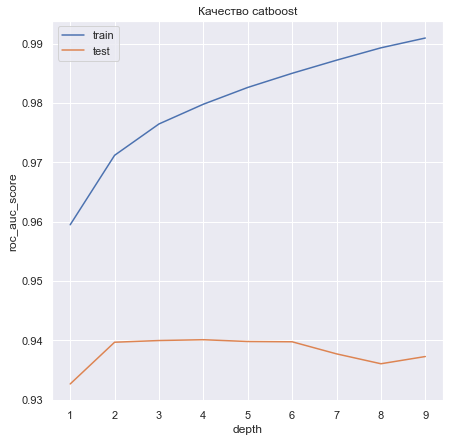

Наилучшее depth=4


In [238]:
plot_catboost('depth', np.arange(1, 10, 1))

In [ ]:
Как видно общие параметры почти совпадают или где-то даже немного лучше, возможно,
подбор параметров не оптимальный, нужно брать другие интервалы,шаги

### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [ ]:
# YOUR CODE:

## Задание 6. Интерпретация бустингового (1 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга (из тех, что используют вашу реализацию).
Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регресии, сравните их между собой. Проанализируйте полученные результаты.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [243]:
# YOUR CODE:

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?

<img src="https://www.pwmania.com/wp-content/gallery/wwe-xmas/000.jpg" style="width: 400px">

In [ ]:
Корона-корона уходи! 
Крутой курс, надеюсь напрямую поможет на стажировке
Жду возможность попасть на стажировку